### Linear Model Selection and Regularization

In the regression setting, the standard linear model
Y = 0+ 1X1+···+ pXp+
(6.1)
is commonly used to describe the relationship between a response Y and
a set of variables X1,X2,...,Xp. We have seen in Chapter 3 that one
typically fits this model using least squares.
In the chapters that follow, we consider some approaches for extending
the linear model framework. In Chapter 7 we generalize (6.1) in order to
accommodate non-linear, but still additive, relationships, while in Chap
ters 8 and 10 we consider even more general non-linear models. However,
the linear model has distinct advantages in terms of inference and, on real
world problems, is often surprisingly competitive in relation to non-linear
methods. Hence, before moving to the non-linear world, we discuss in this
chapter some ways in which the simple linear model can be improved, by re
placing plain least squares fitting with some alternative fitting procedures.
Why might we want to use another fitting procedure instead of least
squares? As we will see, alternative fitting procedures can yield better pre
diction accuracy and model interpretability.

• Prediction Accuracy: Provided that the true relationship between the
response and the predictors is approximately linear, the least squares
estimates will have low bias. If n 
p—that is, if n, the number of
observations, is much larger than p, the number of variables—then the
least squares estimates tend to also have low variance, and hence will
perform well on test observations. However, if n is not much larger
than p, then there can be a lot of variability in the least squares fit,
resulting in overfitting and consequently poor predictions on future
observations not used in model training. And if p>n, then there is no
longer a unique least squares coefficient estimate: there are infinitely many solutions. Each of these least squares solutions gives zero error
on the training data, but typically very poor test set performance
due to extremely high variance.1 By constraining or shrinking the
estimated coefficients, we can often substantially reduce the variance
at the cost of a negligible increase in bias. This can lead to substantial
improvements in the accuracy with which we can predict the response
for observations not used in model training.

• Model Interpretability: It is often the case that some or many of the
variables used in a multiple regression model are in fact not associ
ated with the response. Including such irrelevant variables leads to
unnecessary complexity in the resulting model. By removing these
variables—that is, by setting the corresponding coefficient estimates
to zero—we can obtain a model that is more easily interpreted. Now
least squares is extremely unlikely to yield any coefficient estimates
that are exactly zero. In this chapter, we see some approaches for au
tomatically performing feature selection or variable selection—that is, feature
for excluding irrelevant variables from a multiple regression model.

There are many alternatives, both classical and modern, to using least
squares to fit (6.1). In this chapter, we discuss three important classes of
methods.

• Subset Selection. This approach involves identifying a subset of the p
predictors that we believe to be related to the response. We then fit
a model using least squares on the reduced set of variables.

• Shrinkage. This approach involves fitting a model involving all p pre
dictors. However, the estimated coefficients are shrunken towards zero
relative to the least squares estimates. This shrinkage (also known as
regularization) has the effect of reducing variance. Depending on what
type of shrinkage is performed, some of the coefficients may be esti
mated to be exactly zero. Hence, shrinkage methods can also perform
variable selection.

• Dimension Reduction. This approach involves projecting the p predic
tors into an M-dimensional subspace, where M<p.This is achieved
by computing M different linear combinations, or projections, of the
variables. Then these M projections are used as predictors to fit a
linear regression model by least squares.

#### Subset Selection

##### Best Subset Selection

To perform *best subset selection*, we fit a separate least squares regression for each of the models of the p predictors. That is, we fit all p models that contain exactly one predictor, all $ \binom{p}{2} $ models that contain exactly two predictors, and so on. We look at all of the resulting models, with the goal of identifying the one that is the best.

The problem of selecting the best model from among the $ 2^p $ possibilities considered by best subset selection is then usually broken up into two stages, as described in Algorithm 6.1.

##### **Algorithm 6.1** *Best subset selection*

1. Let $ M_0 $ denote the null model, which contains no predictors. This model simply predicts the sample mean for each observation.

2. For $ k = 1, 2, \ldots, p $:

   (a) Fit all $ \binom{p}{k} $ models that contain exactly k predictors.
   
   (b) Pick the best among these models, and call it $ M_k $. Here “best” is defined as having the smallest RSS, or equivalently $ R^2 $.

3. Select a single best model from among $ M_0, \ldots, M_p $ using the prediction error on a validation set, $ C_p $ (AIC), BIC, or adjusted $ R^2 $.

In Algorithm 6.1, Step 2 identifies the best model (on the training data)
for each subset size, in order to reduce the problem from one of 2p possible
models to one of p +1possible models. In Figure 6.1, these models form
the lower frontier depicted in red.
Now in order to select a single best model, we must simply choose among
these p +1options. This task must be performed with care, because the
RSS of these p +1models decreases monotonically, and the R2 increases
monotonically, as the number of features included in the models increases.
Therefore, if we use these statistics to select the best model, then we will
always end up with a model involving all of the variables. The problem is
that a low RSS or a high R2 indicates a model with a low training error,
whereas we wish to choose a model that has a low test error. (As shown in
Chapter 2 in Figures 2.9–2.11, training error tends to be quite a bit smaller
than test error, and a low training error by no means guarantees a low test
error.) Therefore, in Step 3, we use the error on a validation set, Cp, BIC, or
adjusted R2 in order to select among M0,M1,...,Mp. If cross-validation
is used to select the best model, then Step 2 is repeated on each training
fold, and the validation errors are averaged to select the best value of k.

Then the model Mk fit on the full training set is delivered for the chosen
k. These approaches are discussed in Section 6.1.3.
An application of best subset selection is shown in Figure 6.1. Each
plotted point corresponds to a least squares regression model fit using a
different subset of the 10 predictors in the Credit data set, discussed in
Chapter 3. Here the variable region is a three-level qualitative variable,
and so is represented by two dummy variables, which are selected sepa
rately in this case. Hence, there are a total of 11 possible variables which
can be included in the model. We have plotted the RSS and R2 statistics
for each model, as a function of the number of variables. The red curves
connect the best models for each model size, according to RSS or R2. The
f
igure shows that, as expected, these quantities improve as the number of
variables increases; however, from the three-variable model on, there is little
improvement in RSS and R2 as a result of including additional predictors.
Although we have presented best subset selection here for least squares
regression, the same ideas apply to other types of models, such as logistic
regression. In the case of logistic regression, instead of ordering models by
RSS in Step 2 of Algorithm 6.1, we instead use the deviance, a measure deviance
that plays the role of RSS for a broader class of models. The deviance is
negative two times the maximized log-likelihood; the smaller the deviance,
the better the fit.
While best subset selection is a simple and conceptually appealing ap
proach, it suffers from computational limitations. The number of possible
models that must be considered grows rapidly as p increases. In general,
there are 2p models that involve subsets of p predictors. So if p = 10,
then there are approximately 1,000 possible models to be considered, and if
p =20,then there are over one million possibilities! Consequently, best sub
set selection becomes computationally infeasible for values of p greater than around 40, even with extremely fast modern computers. There are compu
tational shortcuts—so called branch-and-bound techniques—for eliminat
ing some choices, but these have their limitations as p gets large. They also
only work for least squares linear regression. We present computationally
efficient alternatives to best subset selection next


##### **Algorithm 6.2** *Forward stepwise selection*

1. Let $ M_0 $ denote the null model, which contains no predictors.

2. For $ k = 0, \ldots, p - 1 $:

   - (a) Consider all $ p - k $ models that augment the predictors in $ M_k $ with one additional predictor.
   
   - (b) Choose the best among these $ p - k $ models, and call it $ M_{k+1} $. Here best is defined as having the smallest RSS or highest $ R^2 $.

3. Select a single best model from among $ M_0, \ldots, M_p $ using the prediction error on a validation set, $ C_p $ (AIC), BIC, or adjusted $ R^2 $. Or use the cross-validation method.

##### Stepwise Selection

For computational reasons, best subset selection cannot be applied with
very large p. Best subset selection may also suffer from statistical problems
when p is large. The larger the search space, the higher the chance of finding
models that look good on the training data, even though they might not
have any predictive power on future data. Thus an enormous search space
can lead to overfitting and high variance of the coefficient estimates.
For both of these reasons, stepwise methods, which explore a far more
restricted set of models, are attractive alternatives to best subset selection.

Forward Stepwise Selection

*Forward stepwise selection* is a computationally efficient alternative to best subset selection. While the best subset selection procedure considers all
2p possible models containing subsets of the p predictors, forward step
wise considers a much smaller set of models. Forward stepwise selection
begins with a model containing no predictors, and then adds predictors
to the model, one-at-a-time, until all of the predictors are in the model.
In particular, at each step the variable that gives the greatest additional
improvement to the fit is added to the model. More formally, the forward
stepwise selection procedure is given in Algorithm 6.2.


## 6. Linear Model Selection and Regularization

Unlike best subset selection, which involved fitting $ 2^p $ models, forward stepwise selection involves fitting one null model, along with $ p - k $ models in the $ k $-th iteration, for $ k = 0, \ldots, p - 1 $. This amounts to a total of $ 1 + \sum_{i=0}^{p-1} (p - i) = 1 + p(p + 1)/2 $ models. This is a substantial difference: when $p$ = 20, best subset selection requires fitting $ 1,048,576 $ models, whereas forward stepwise selection requires fitting only $ 21 $ models. 

In step 2(b) of Algorithm 6.2, we identify the best model from those available, which augment $ M_k $ with one additional predictor. We do this by simply choosing the model with the lowest RSS or the highest $ R^2 $. In this case, we must identify the best model from a set of models with different numbers of variables. This is more challenging, and is discussed in Section 6.1.3.

Forward stepwise selection's computational advantage over best subset selection is clear. Though forward stepwise seems to work well in practice, it is important to keep in mind that it is fundamentally a greedy algorithm. In a data set with $ p $ predictors, the best possible model will include predictors $ X_2 $ and $ X_1 $. However, forward stepwise selection is still unable to find the best possible model among $ M_1, M_2, $ and those available with $ X_1 $ together with an additional variable.

As shown in Section 6.1.3, the forward stepwise selection on the Credit data set illustrates this phenomenon. Both forward stepwise selection and best subset selection favored models that included the predictors rating and income, whereas the best subset selection also included the variable student.

In high-dimensional settings where $ p $ is greater than $ n $, forward stepwise selection can still be applied even when subset selection cannot. If $ p $ is greater than $ n $, each time an additional variable is included, only the subset of $ M_0, \ldots, M_k $ can be constructed, which avoids overfitting, as each submodel is fit using least squares, which does not yield a unique solution if $ p > n $.



| # Variables | Best subset                      | Forward stepwise                  |
|-------------|----------------------------------|-----------------------------------|
| One         | `rating`                           | `rating`                            |
| Two         | `rating`, `income`                   | `rating`, `income`                    |
| Three       | `rating`, `income`, `student`              | `rating`, `income`, `student`               |
| Four        | `cards`, `income`, `student`, `limit` | `rating`, `income`, `student`, `limit` |

The first four selected models for best subset selection and forward stepwise selection on the Credit data set. The first three models are identical but the fourth models differ.

Backward Stepwise Selection

Like forward stepwise selection, backward stepwise selection provides an efficient alternative to best subset selection. However, unlike forward step
wise selection, it begins with the full least squares model containing all p
predictors, and then iteratively removes the least useful predictor, one-at
a-time. Details are given in Algorithm 6.3.


Like forward stepwise selection, the backward selection approach searches
through only 1+p(p+1)/2 models, and so can be applied in settings where
p is too large to apply best subset selection.3 Also like forward stepwise
selection, backward stepwise selection is not guaranteed to yield the best
model containing a subset of the p predictors.
Backward selection requires that the number of samples n is larger than
the number of variables p (so that the full model can be fit). In contrast,
forward stepwise can be used even when n<p, and so is the only viable
subset method when p is very large.

Hybrid Approaches

The best subset, forward stepwise, and backward stepwise selection ap
proaches generally give similar but not identical models. As another al
ternative, hybrid versions of forward and backward stepwise selection are
available, in which variables are added to the model sequentially, in analogy
to forward selection. However, after adding each new variable, the method
may also remove any variables that no longer provide an improvement in
the model fit. Such an approach attempts to more closely mimic best sub
set selection while retaining the computational advantages of forward and
backward stepwise selection.

##### Choosing the Optimal Model

Best subset selection, forward selection, and backward selection result in
the creation of a set of models, each of which contains a subset of the p predictors. To apply these methods, we need a way to determine which of
these models is best. As we discussed in Section 6.1.1, the model containing
all of the predictors will always have the smallest RSS and the largest R2,
since these quantities are related to the training error. Instead, we wish to
choose a model with a low test error. As is evident here, and as we show
in Chapter 2, the training error can be a poor estimate of the test error.
Therefore, RSS and R2 are not suitable for selecting the best model among
a collection of models with different numbers of predictors.
In order to select the best model with respect to test error, we need to
estimate this test error. There are two common approaches:

1. We can indirectly estimate test error by making an adjustment to the
training error to account for the bias due to overfitting.


2. We can directly estimate the test error, using either a validation set
approach or a cross-validation approach, as discussed in Chapter 5.

We consider both of these approaches below.

We show in Chapter 2 that the training set $ R^2 $ is generally an under-estimate of the test MSE. (Recall that MSE = RSS/n.) In training RSS, but when we fit a model to the training data using least squares, we (not the test RSS) is as small as possible, this can sometimes misestimate the regression coefficients in a model. Thus, we need to choose from among a set of models with different variables.

However, a number of techniques for adjusting the training error can lead to a set of models with different variables. We introduce the following metrics for model selection criteria: 

- **Akaike information criterion (AIC)**, 
- **Bayesian information criterion (BIC)**, and 
- **Adjusted $ R^2 $**. 

Figure 6.2 gives a comparison of the best model selection criteria and selects the best subset on the Credit data set.

For a fitted least squares model containing $ p $ predictors, the $ C_p $ estimate of test MSE is computed using the equation:

$$
C_p = \frac{(RSS + 2d\hat{\sigma}^2)}{n}
$$

where $ \hat{\sigma}^2 $ is an estimate of the variance of the error $ \epsilon $ associated with the regression model in (6.1). Typically $ d $ is chosen to be $ p $ or the number of parameters in the model. The $ C_p $ statistic adds a penalty term involving $ d $ in order to adjust for the number of predictors  in the model increases; this is intended to adjust for the corresponding decrease in training RSS. Based on the scope of this book, one can show that if $ \hat{\sigma}^2 $ in (6.2), then $ C_p $ is an unbiased estimate of test MSE. As a consequence, the $ C_p $ statistic tends to take a larger value in the model selected with the lowest $ C_p $ value. In Figure 6.2, C_p selects the six-variable model containing the predictors income, lint, age, and risk.

The AIC criterion is defined as follows:
$$
AIC = \frac{1}{n} (RSS + 2d\hat{\sigma}^2)
$$
where, for simplicity, we have omitted irrelevant constants. Here for least squares models, AIC and $ C_p $ are proportional to each other, as shown in Figure 6.2.

BIC is derived from a Bayesian point of view; it ends up looking similar to $ C_p $ and $ AIC $ for the least squares model but with a different penalty term:
$$
BIC = \frac{1}{n} (RSS + \log(n)d\hat{\sigma}^2)
$$
Like $ C_p $, the BIC also penalizes a more complex model for a loss in precision, and generally we select the model with the lowest BIC. Notice that the BIC penalty includes the $ 2d\ \log(n) $ term, where $ n $ is the number of observations. Since $ \log n > 2 $ for any $ n > 7 $, the BIC statistic generally places a heavier penalty on models with many variables, and hence reveals in the selection of smaller models than $ C_p $. In Figure 6.2, we see that the direct task decider is a single model that contains only the four predictors income, lint, age, and assertion. In this case the chosen model does not appear to make much difference in accuracy between the four-variable and six-variable models.

The adjusted $ R^2 $ statistic is another popular approach for selecting among a set of models that contain different numbers of variables. Recall from Chapter 3 that the adjusted $ R^2 $ is defined as follows, where $ RSS = \sum(y_i - \hat{y})^2 $ is the total sum of squared response. Since $ RSS $ increases as more variables are added to the model, the $ R^2 $ measure becomes biased toward a larger selected model of variables, the adjusted $ R^2 $ is calculated as

$$
\text{Adjusted } R^2 = 1 - \frac{RSS/(n - d - 1)}{TSS/(n - 1)}
$$

Unlike $ C_p $ and BIC, for which a small value indicates a model with a low extent error, a large value of adjusted $ R^2 $ indicates a model with a small test error. Additionally, the adjusted $ R^2 $ is equivalent to how much variability is explained by the model. Consequently, the adjusted $ R^2 $ may increase or decrease depending on the fits of new variables added, and one must be cautious of the laws of diminishing returns when adding additional predictors. 

Nonetheless, the adjusted $ R^2 $ provides a more robust measure than $ C_p $ and BIC in model selection, owing to the fact that the adjusted $ R^2 $ accounts for degrees of freedom in models where fewer predictor variables yield higher estimates; hence, $ AIC $ and BIC can be less robust than the adjusted $ R^2 $.

Validation and Cross-Validation


As an alternative to the approaches just discussed, we can directly esti
mate the test error using the validation set and cross-validation methods
discussed in Chapter 5. We can compute the validation set error or the
cross-validation error for each model under consideration, and then select the model for which the resulting estimated test error is smallest. This pro
cedure has an advantage relative to AIC, BIC, Cp, and adjusted R2, in that
it provides a direct estimate of the test error, and makes fewer assumptions
about the true underlying model. It can also be used in a wider range of
model selection tasks, even in cases where it is hard to pinpoint the model
degrees of freedom (e.g. the number of predictors in the model) or hard
to estimate the error variance 2. Note that when cross-validation is used,
the sequence of models Mk in Algorithms 6.1–6.3 is determined separately
for each training fold, and the validation errors are averaged over all folds
for each model size k. This means, for example with best-subset regression,
that Mk, the best subset of size k, can differ across the folds. Once the
best size k is chosen, we find the best model of that size on the full data
set.
In the past, performing cross-validation was computationally prohibitive
for many problems with large p and/or large n, and so AIC, BIC, Cp,
and adjusted R2 were more attractive approaches for choosing among a
set of models. However, nowadays with fast computers, the computations
required to perform cross-validation are hardly ever an issue. Thus, cross
validation is a very attractive approach for selecting from among a number
of models under consideration.
Figure 6.3 displays, as a function of d, the BIC, validation set errors, and
cross-validation errors on the Credit data, for the best d-variable model.
The validation errors were calculated by randomly selecting three-quarters
of the observations as the training set, and the remainder as the valida
tion set. The cross-validation errors were computed using k = 10 folds.
In this case, the validation and cross-validation methods both result in a
six-variable model. However, all three approaches suggest that the four-,
f
ive-, and six-variable models are roughly equivalent in terms of their test
errors.
In fact, the estimated test error curves displayed in the center and right
hand panels of Figure 6.3 are quite flat. While a three-variable model clearly
has lower estimated test error than a two-variable model, the estimated test
errors of the 3- to 11-variable models are quite similar. Furthermore, if we repeated the validation set approach using a different split of the data into
a training set and a validation set, or if we repeated cross-validation using
a different set of cross-validation folds, thentheprecisemodelwiththe
lowest estimatedtest errorwouldsurelychange. Inthis setting,we can
select amodel using theone-standard-error rule.Wefirst calculate the 
standarderrorof theestimatedtestMSEfor eachmodel size, andthen
selectthesmallestmodel forwhichtheestimatedtesterror iswithinone
standarderrorofthelowestpointonthecurve.Therationalehereisthat
ifasetofmodelsappeartobemoreor lessequallygood, thenwemight
aswell choose the simplestmodel—that is, themodelwiththe smallest
number of predictors. Inthis case, applying theone-standard-error rule
tothevalidationsetorcross-validationapproachleadstoselectionof the
three-variablemodel.


#### Shrinkage Methods

The subset selection methods described in Section 6.1 involve using least squares to fit a linear model that contains as many predictors. As an alternative, we can find a model containing all predictors and then calibrate or regularize the coefficient estimates, or equivalently, shrink the estimates toward zero. It may not be immediately obvious why such a constraint should improve the fit, but it turns out that shrinking the coefficients can significantly reduce their variance. The two best-known techniques for shrinking the coefficient estimates towards zero are ridge regression and the lasso.

##### Ridge Regression

Recall from Chapter 3 that the least squares fitting procedure for $ \beta_0, \beta_1, \ldots, \beta_p $ using the values that minimize

$$
RSS = \sum (y_i - \beta_0 - \beta_1 x_{1i} - \ldots - \beta_p x_{pi})^2
$$

Ridge regression is simply a variation of this, where the estimator is determined by minimizing a slightly different quantity. In particular, the ridge regression coefficient estimates $ \hat{\beta}_P $ are those that minimize

$$
RSS + \lambda \sum_{j=1}^p \beta_j^2
$$

where $ \lambda > 0 $ is a tuning parameter, to be determined separately. Expressing $ \lambda $ trades off too much variance in estimates; ridge regression seeks coefficient estimates that fit the data well, by making them smaller. The second term, $ \lambda \sum_{j=1}^p \beta_j^2 $, penalizes large values of the coefficients, thus shrinking the estimates of $ \beta_j $ towards zero. The tuning parameter $ \lambda $ serves to control the relative impact of these two terms on the regression coefficient esti
mates. When =0, the penalty term has no effect, and ridge regression
will produce the least squares estimates. However, as 
, the impact of
the shrinkage penalty grows, and the ridge regression coefficient estimates
will approach zero. Unlike least squares, which generates only one set of co
efficient estimates, ridge regression will produce a different set of coefficient
estimates, ˆR, for each value of . Selecting a good value for is critical;
we defer this discussion to Section 6.2.3, where we use cross-validation.
Note that in (6.5), the shrinkage penalty is applied to 1,..., p, but
not to the intercept 0. We want to shrink the estimated association of
each variable with the response; however, we do not want to shrink the
intercept, which is simply a measure of the mean value of the response
when xi1 = xi2 = ...= xip =0. If we assume that the variables—that is,
the columns of the data matrix X—have been centered to have mean zero
before ridge regression is performed, then the estimated intercept will take
the form ˆ0 =¯y= n
i=1yi/n.




An Application to the Credit Data

In Figure 6.4, the ridge regression coefficient estimates for the Credit data
set are displayed. In the left-hand panel, each curve corresponds to the
ridge regression coefficient estimate for one of the ten variables, plotted
as a function of . For example, the black solid line represents the ridge
regression estimate for the income coefficient, as is varied. At the extreme
left-hand side of the plot, is essentially zero, and so the corresponding
ridge coefficient estimates are the same as the usual least squares esti
mates. But as increases, the ridge coefficient estimates shrink towards
zero. When is extremely large, then all of the ridge coefficient estimates
are basically zero; this corresponds to the null model that contains no predictors. In this plot, the income, limit, rating, and student variables are
displayed in distinct colors, since these variables tend to have by far the
largest coefficient estimates. While the ridge coefficient estimates tend to
decrease in aggregate as increases, individual coefficients, such as rating
and income, may occasionally increase as increases.

The right-hand panel of Figure 6.4 displays the same ridge coefficient estimates as the left-hand panel, but instead of displaying on the x-axis, we now display $\hat{R}^2/\hat{2}$, where $\hat{}$ denotes the vector of least squares coefficient estimates. The notation $\|\cdot\|_2$ denotes the 2 norm (pronounced “ell 2”) of a vector, and is defined as $\|\beta\|_2 = \sqrt{\sum_{j=1}^{p} \beta_j^2}$. It measures the distance of $\beta$ from zero. As $\lambda$ increases, the 2 norm of $\hat{R}$ will always decrease, and so will $\hat{R}^2/\hat{2}$. The latter quantity ranges from 1 (when $\lambda=0$, in which case the ridge regression coefficient estimate is the same as the least squares estimate, and so their 2 norms are the same) to 0 (when $\lambda = \infty$, in which case the ridge regression coefficient estimate is a vector of zeros, with 2 norm equal to zero). Therefore, we can think of the x-axis in the right-hand panel of Figure 6.4 as the amount that the ridge regression coefficient estimates have been shrunken towards zero; a small value indicates that they have been shrunken very close to zero.

The standard least squares coefficient estimates discussed in Chapter 3 are scale equivariant: multiplying $X_j$ by a constant $c$ simply leads to a scaling of the least squares coefficient estimates by a factor of $1/c$. In other words, regardless of how the jth predictor is scaled, $X_j \hat{\beta}_j$ will remain the same. In contrast, the ridge regression coefficient estimates can change substantially when multiplying a given predictor by a constant. For instance, consider the income variable, which is measured in dollars. One could reasonably have measured income in thousands of dollars, which would result in a reduction in the observed values of income by a factor of 1,000. Now due to the sum of squared coefficients term in the ridge regression formulation (6.5), such a change in scale will not simply cause the ridge regression coefficient estimate for income to change by a factor of 1,000. In other words, $X_j \hat{R}_j$ will depend not only on the value of $\lambda$, but also on the scaling of the jth predictor. In fact, the value of $X_j \hat{R}_j$ may even depend on the scaling of the other predictors! Therefore, it is best to apply ridge regression after standardizing the predictors, using the formula

$$
\tilde{x}_{ij} = \frac{x_{ij}}{1 / n \sum_{i=1}^n (x_{ij} - \bar{x}_j)^2}
$$

so that they are all on the same scale. In (6.6), the denominator is the estimated standard deviation of the jth predictor. Consequently, all of the standardized predictors will have a standard deviation of one. As a result, the final fit will not depend on the scale on which the predictors are measured. In Figure 6.4, the y-axis displays the standardized ridge regression coefficient estimates—that is, the coefficient estimates that result from performing ridge regression using standardized predictors.

Why Does Ridge Regression Improve Over Least Squares?

Ridge regression’s advantage over least squares is rooted in the bias-variance trade-off. As $\lambda$ increases, the flexibility of the ridge regression fit decreases, leading to decreased variance but increased bias. This is illustrated in the left-hand panel of Figure 6.5, using a simulated data set containing $p = 45$ predictors and $n = 50$ observations. The green curve in the left-hand panel of Figure 6.5 displays the variance of the ridge regression predictions as a function of $\lambda$. At the least squares coefficient estimates, which correspond to ridge regression with $\lambda = 0$, the variance is high but there is no bias. But as $\lambda$ increases, the shrinkage of the ridge coefficient estimates leads to a substantial reduction in the variance of the predictions, at the expense of a slight increase in bias. Recall that the least mean squared error (MSE), plotted in bias-variance bias, is closely related to the variance plus the squared bias. For values of $\lambda$ that are not too small, the variance generally remains very low, as shown in the figure, plotted in black. However, as $\lambda$ increases from 0 to 10. Beyond this point, the decrease in variance is no longer sufficient to offset the increased bias, and the MSE can begin to be significantly underestimated, resulting in a large increase in the bias. 

The minimum MSE is achieved at and around the value of $\lambda$ that results in the smallest MSE associated with the least squares fit, when using the same hyperparameter that will yield the best fit for any model designed for use with $\lambda$. However, for an inflexible estimator, the MSE is considerably higher.

In general, as the number of observations increases, the ridge regression estimates become more stable against the errors in the left-hand curve; however, the fitted values may still have high variance. This means that while ridge regression can improve the fitted values' stability by controlling their variance, the coefficients of the variables in the model may be increasingly biased.

In Figure 6.5, the least squares estimates continue to outperform ridge regression predictions, even when $\lambda > 0$, because the least squares estimation can still perform well by trading off a small increase in bias for a large decrease in variance. Hence, ridge regression works best in situations
where the least squares estimates have high variance.
Ridge regression also has substantial computational advantages over best
subset selection, which requires searching through $2^p$ models. As we dis
cussed previously, even for moderate values of $p$, such a search can be
computationally infeasible. In contrast, for any fixed value of $\lambda$, ridge re
gression only fits a single model, and the model-fitting procedure can be
performed quite quickly. In fact, one can show that the computations re
quired to solve (6.5), simultaneously for all values of $\lambda$, are almost identical
to those for fitting a model using least squares.

#### The Lasso

Ridge regression does have one obvious disadvantage. Unlike best subset,
forward stepwise, and backward stepwise selection, which will generally
select models that involve just a subset of the variables, ridge regression
will include all $p$ predictors in the final model. The penalty 
$$
\sum_{j=1}^{p} \beta_j^2
$$ 
in (6.5) will shrink all of the coefficients towards zero, but it will not set any of them
exactly to zero (unless $\lambda = \infty$). This may not be a problem for prediction
accuracy, but it can create a challenge in model interpretation in settings in
which the number of variables $p$ is quite large. For example, in the Credit
data set, it appears that the most important variables are income, limit,
rating, and student. So we might wish to build a model including just
these predictors. However, ridge regression will always generate a model
involving all ten predictors. Increasing the value of $\lambda$ will tend to reduce
the magnitudes of the coefficients, but will not result in exclusion of any of
the variables.

The lasso is a relatively recent alternative to ridge regression that over-
comes this disadvantage. The lasso coefficients, $\hat{\beta}_L$, minimize the quantity
$$
\sum_{i=1}^{n} \left( y_i - \sum_{j=1}^{p} \beta_j x_{ij} \right)^2 + \lambda \sum_{j=1}^{p} | \beta_j | = \text{RSS} + \lambda \sum_{j=1}^{p} | \beta_j |.
$$
Comparing (6.7) to (6.5), we see that the lasso and ridge regression have
similar formulations. The only difference is that the $\beta_j^2$ term in the ridge
regression penalty (6.5) has been replaced by $|\beta_j|$ in the lasso penalty (6.7).
In statistical parlance, the lasso uses an $L_1$ (pronounced “ell 1”) penalty
instead of an $L_2$ penalty. The $L_1$ norm of a coefficient vector is given by
$$
||\beta||_1 = \sum_{j=1}^{p} | \beta_j |.
$$

As with ridge regression, the lasso shrinks the coefficient estimates to
wards zero. However, in the case of the lasso, the $L_1$ penalty has the effect
of forcing some of the coefficient estimates to be exactly equal to zero when
the tuning parameter is sufficiently large. Hence, much like best subset se
lection, the lasso performs variable selection. As a result, models generated
from the lasso are generally much easier to interpret than those produced
by ridge regression. We say that the lasso yields sparse models—that is,
models that involve only a subset of the variables. As in ridge regression,
selecting a good value of $\lambda$ for the lasso is critical; we defer this discussion
to Section 6.2.3, where we use cross-validation.

As an example, consider the coefficient plots in Figure 6.6, which are gen
erated from applying the lasso to the Credit dataset. When $\lambda = 0$, then
the lasso simply gives the least squares fit, and when $\lambda$ becomes sufficiently
large, the lasso gives the null model in which all coefficient estimates equal
zero. However, in between these two extremes, the ridge regression and
lasso models are quite different from each other. Moving from left to right
in the right-hand panel of Figure 6.6, we observe that at first the lasso re
sults in a model that contains only the rating predictor. Then student and
limit enter the model almost simultaneously, shortly followed by income.
Eventually, the remaining variables enter the model. Hence, depending on
the value of $\lambda$, the lasso can produce a model involving any number of vari
ables. In contrast, ridge regression will always include all of the variables in
the model, although the magnitude of the coefficient estimates will depend
on $\lambda$.




Another Formulation for Ridge Regression and the Lasso

One can show that the lasso and ridge regression coefficient estimates solve
the problems:

$$
\begin{align*}
\text{minimize} & \quad \sum_{i=1}^{n} \left( y_i - \beta_0 - \sum_{j=1}^{p} \beta_j x_{ij} \right)^2
\text{subject to} & \quad \sum_{j=1}^{p} | \beta_j | \leq s \tag{6.8}
\end{align*}
$$

and

$$
\begin{align*}
\text{minimize} & \quad \sum_{i=1}^{n} \left( y_i - \beta_0 - \sum_{j=1}^{p} \beta_j x_{ij} \right)^2
\text{subject to} & \quad \sum_{j=1}^{p} \beta_j^2 \leq s \tag{6.9}
\end{align*}
$$

respectively. In other words, for every value of $\lambda$, there is some $s$ such that
the Equations (6.7) and (6.8) will give the same lasso coefficient estimates.
Similarly, for every value of $\lambda$ there is a corresponding $s$ such that Equations (6.5) and (6.9) will give the same ridge regression coefficient estimates.

When $ p = 2 $, then (6.8) indicates that the lasso coefficient estimates have
the smallest RSS out of all points that lie within the diamond defined by
$| \beta_1| + | \beta_2| \leq s$. Similarly, the ridge regression estimates have the smallest
RSS out of all points that lie within the circle defined by $ \beta_1^2 + \beta_2^2 \leq s $.
We can think of (6.8) as follows. When we perform the lasso we are trying
to find the set of coefficient estimates that lead to the smallest RSS, subject
to the constraint that there is a budget $ s $ for how large $ \sum_{j=1}^{p} | \beta_j | $ can be.
When $ s $ is extremely large, then this budget is not very restrictive, and so
the coefficient estimates can be large. In fact, if $ s $ is large enough that the
least squares solution falls within the budget, then (6.8) will simply yield
the least squares solution. In contrast, if $ s $ is small, then $ \sum_{j=1}^{p} | \beta_j | $ must be
small in order to avoid violating the budget. Similarly, (6.9) indicates that
when we perform ridge regression, we seek a set of coefficient estimates
such that the RSS is as small as possible, subject to the requirement that
$ \sum_{j=1}^{p} \beta_j^2 $ not exceed the budget $ s $.

The formulations (6.8) and (6.9) reveal a close connection between the
lasso, ridge regression, and best subset selection. Consider the problem:

$$
\begin{align*}
\text{minimize} & \quad \sum_{i=1}^{n} \left( y_i - \beta_0 - \sum_{j=1}^{p} \beta_j x_{ij} \right)^2 
\text{subject to} & \quad \sum_{j=1}^{p} I( \beta_j ≠ 0) \leq s. \tag{6.10}
\end{align*}
$$

Here $ I( \beta_j ≠ 0) $ is an indicator variable: it takes on a value of 1 if $ \beta_j = 0 $, and
equals zero otherwise. Then (6.10) amounts to finding a set of coefficient
estimates such that RSS is as small as possible, subject to the constraint
that no more than $ s $ coefficients can be nonzero. The problem (6.10) is
equivalent to best subset selection. Unfortunately, solving (6.10) is com
putationally infeasible when $ p $ is large, since it requires considering all $ p \choose s $
models containing $ s $ predictors. Therefore, we can interpret ridge regression
and the lasso as computationally feasible alternatives to best subset selec
tion that replace the intractable form of the budget in (6.10) with forms
that are much easier to solve. Of course, the lasso is much more closely
related to best subset selection, since the lasso performs feature selection
for $ s $ sufficiently small in (6.8), while ridge regression does not.



The Variable Selection Property of the Lasso

Why is it that the lasso, unlike ridge regression, results in coefficient esti
mates that are exactly equal to zero? The formulations (6.8) and (6.9) can
be used to shed light on the issue. Figure 6.7 illustrates the situation. The
least squares solution is marked as $ \hat{\beta} $, while the blue diamond and circle
represent the lasso and ridge regression constraints in (6.8) and (6.9), re
spectively. If $ s $ is sufficiently large, then the constraint regions will contain
$ \hat{\beta} $, and so the ridge regression and lasso estimates will be the same as the
least squares estimates. (Such a large value of $ s $ corresponds to $ \lambda = 0 $ in
(6.5) and (6.7).) However, in Figure 6.7 the least squares estimates lie out
side of the diamond and the circle, and so the least squares estimates are
not the same as the lasso and ridge regression estimates.

Each of the ellipses centered around $ \hat{\beta} $ represents a contour: this means
that all of the points on a particular ellipse have the same RSS value. As the ellipses expand away from the least squares coefficient estimates, the
RSS increases. Equations (6.8) and (6.9) indicate that the lasso and ridge
regression coefficient estimates are given by the first point at which an
ellipse contacts the constraint region. Since ridge regression has a circular
constraint with no sharp points, this intersection will not generally occur on
an axis, and so the ridge regression coefficient estimates will be exclusively
non-zero. However, the lasso constraint has corners at each of the axes, and
so the ellipse will often intersect the constraint region at an axis. When this
occurs, one of the coefficients will equal zero. In higher dimensions, many of
the coefficient estimates may equal zero simultaneously. In Figure 6.7, the
.
intersection occurs at 1 =0, and so the resulting model will only include $ \beta_2$


In Figure 6.7, we considered the simple case of p =2. When p =3,
then the constraint region for ridge regression becomes a sphere, and the
constraint region for the lasso becomes a polyhedron. When p>3, the
constraint for ridge regression becomes a hypersphere, and the constraint
for the lasso becomes a polytope. However, the key ideas depicted in Fig
ure 6.7 still hold. In particular, the lasso leads to feature selection when
p>2 due to the sharp corners of the polyhedron or polytope.




Comparing the Lasso and Ridge Regression


It is clear that the lasso has a major advantage over ridge regression, in
that it produces simpler and more interpretable models that involve only a
subset of the predictors. However, which method leads to better prediction
accuracy? Figure 6.8 displays the variance, squared bias, and test MSE of
the lasso applied to the same simulated data as in Figure 6.5. Clearly the
lasso leads to qualitatively similar behavior to ridge regression, in that as $ \lambda $
increases, the variance decreases and the bias increases. In the right-hand panel of Figure 6.8, the dotted lines represent the ridge regression fits.
Here we plot both against their R2 on the training data. This is another
useful way to index models, and can be used to compare models with
different types of regularization, as is the case here. In this example, the
lasso and ridge regression result in almost identical biases. However, the
variance of ridge regression is slightly lower than the variance of the lasso.
Consequently, the minimum MSE of ridge regression is slightly smaller than
that of the lasso.

However, the data in Figure 6.8 were generated in such a way that all 45
predictors were related to the response—that is, none of the true coefficients
1,..., 45 equaled zero. The lasso implicitly assumes that a number of the
coefficients truly equal zero. Consequently, it is not surprising that ridge
regression outperforms the lasso in terms of prediction error in this setting.
Figure 6.9 illustrates a similar situation, except that now the response is a
function of only 2 out of 45 predictors. Now the lasso tends to outperform
ridge regression in terms of bias, variance, and MSE.

These two examples illustrate that neither ridge regression nor the lasso
will universally dominate the other. In general, one might expect the lasso
to perform better in a setting where a relatively small number of predictors
have substantial coefficients, and the remaining predictors have coefficients
that are very small or that equal zero. Ridge regression will perform better
when the response is a function of many predictors, all with coefficients of
roughly equal size. However, the number of predictors that is related to the
response is never known a priori for real data sets. A technique such as
cross-validation can be used in order to determine which approach is better
on a particular data set.

As with ridge regression, when the least squares estimates have exces
sively high variance, the lasso solution can yield a reduction in variance
at the expense of a small increase in bias, and consequently can gener
ate more accurate predictions. Unlike ridge regression, the lasso performs
variable selection, and hence results in models that are easier to interpret.
There are very efficient algorithms for fitting both ridge and lasso models;
in both cases the entire coefficient paths can be computed with about the
same amount of work as a single least squares fit. 



A Simple Special Case for Ridge Regression and the Lasso

In order to obtain a better intuition about the behavior of ridge regression
and the lasso, consider a simple special case with $ n = p $, and $ X $ a diag
onal matrix with 1’s on the diagonal and 0’s in all off-diagonal elements.
To simplify the problem further, assume also that we are performing regres
sion without an intercept. With these assumptions, the usual least squares
problem simplifies to finding $ \beta_1, \ldots, \beta_p $ that minimize

$$
\sum_{j=1}^{p} (y_j - \beta_j)^2.
$$

In this case, the least squares solution is given by

$$
\hat{\beta}_j = y_j. \tag{6.11}
$$

And in this setting, ridge regression amounts to finding $ \beta_1, \ldots, \beta_p $ such that

$$
\sum_{j=1}^{p} (y_j - \beta_j)^2 + \lambda \sum_{j=1}^{p} \beta_j^2 \tag{6.12}
$$

is minimized, and the lasso amounts to finding the coefficients such that is minimized. 

$$
\sum_{j=1}^{p} (y_j - \beta_j)^2 + \lambda \sum_{j=1}^{p} |\beta_j| \tag{6.13}
$$

One can show that in this setting, the ridge regression esti
mates take the form

$$
\hat{\beta}_j^R = \frac{y_j}{1 + \lambda},
$$

and the lasso estimates take the form


$$
\hat{\beta}_j^L =
\begin{cases}
y_j - \lambda/2 & \text{if } y_j > \lambda/2, \\
y_j + \lambda/2 & \text{if } y_j < -\lambda/2, \\
0 & \text{if } |y_j| \leq \lambda/2.
\end{cases}
\tag{6.14}
$$



Figure 6.10 displays the situation. We can see that ridge regression and
the lasso perform two very different types of shrinkage. In ridge regression,
each least squares coefficient estimate is shrunken by the same proportion.
In contrast, the lasso shrinks each least squares coefficient towards zero by
a constant amount, $\lambda/2$; the least squares coefficients that are less than
$\lambda/2$ in absolute value are shrunken entirely to zero. The type of shrink
age performed by the lasso in this simple setting (6.15) is known as soft
thresholding. The fact that some lasso coefficients are shrunken entirely to
zero explains why the lasso performs feature selection.

In the case of a more general data matrix $X$, the story is a little more
complicated than what is depicted in Figure 6.10, but the main ideas still
hold approximately: ridge regression more or less shrinks every dimension
of the data by the same proportion, whereas the lasso more or less shrinks
all coefficients toward zero by a similar amount, and sufficiently small co
efficients are shrunken all the way to zero.



We now show that one can view ridge regression and the lasso through
a Bayesian lens. A Bayesian viewpoint for regression assumes that the
coefficient vector $\beta$ has some prior distribution, say $p(\beta)$, where 
$\beta = (\beta_0, \beta_1, \ldots, \beta_p)^T$. The likelihood of the data can be written as $f(Y|X, \beta)$, where $ X = (X_1,\ldots,X_p) $. Multiplying the prior distribution by the likelihood gives us (up to a proportionality constant) the posterior distribution, which takes the form

$$
p(\beta | X, Y) \propto f(Y | X, \beta)p(\beta | X) = f(Y | X, \beta)p(\beta),
$$

where the proportionality above follows from Bayes’ theorem, and the
equality above follows from the assumption that $X$ is fixed.

We assume the usual linear model,

$$
Y = \beta_0 + X_1 \beta_1 + \cdots + X_p \beta_p + \epsilon,
$$

and suppose that the errors are independent and drawn from a normal distribution. Furthermore, assume that 

$$
p(\beta) = \prod_{j=1}^p g(\beta_j),
$$

for some density function $g$. It turns out that ridge regression and the lasso follow naturally from two special cases of $g$:

- If $g$ is a Gaussian distribution with mean zero and standard deviation a function of $\lambda$, then it follows that the posterior mode for $\beta$—that is, the most likely value for $\beta$, given the data—is given by the ridge regression solution. (In fact, the ridge regression solution is also the posterior mean.)
  
- If $g$ is a double-exponential (Laplace) distribution with mean zero and scale parameter a function of $\lambda$, then it follows that the posterior mode for $\beta$ is the lasso solution. (However, the lasso solution is not the posterior mean, and in fact, the posterior mean does not yield a sparse coefficient vector.)

The Gaussian and double-exponential priors are displayed in Figure 6.11. Therefore, from a Bayesian viewpoint, ridge regression and the lasso follow directly from assuming the usual linear model with normal errors, together with a simple prior distribution for $\beta$. Notice that the lasso prior is steeply peaked at zero, while the Gaussian is flatter and fatter at zero. Hence, the lasso expects a priori that many of the coefficients are (exactly) zero, while ridge assumes the coefficients are randomly distributed about zero.

Selecting the Tuning Parameter

Just as the subset selection approaches considered in Section 6.1 require
a method to determine which of the models under consideration is best,
implementing ridge regression and the lasso requires a method for selecting
a value for the tuning parameter in $ \lambda $ (6.5) and (6.7), or equivalently, the
value of the constraint s in (6.9) and (6.8). Cross-validation provides a sim
ple way to tackle this problem. We choose a grid of $ \lambda $ values, and compute
the cross-validation error for each value of $ \lambda $, as described in Chapter 5.We
then select the tuning parameter value for which the cross-validation error
is smallest. Finally, the model is re-fit using all of the available observations
and the selected value of the tuning parameter.

  Figure 6.12 displays the choice of $ \lambda $ that results from performing leave
one-out cross-validation on the ridge regression fits from the `Credit` data
set. The dashed vertical lines indicate the selected value of $ \lambda $. In this case
the value is relatively small, indicating that the optimal fit only involves a
small amount of shrinkage relative to the least squares solution. In addition,
the dip is not very pronounced, so there is rather a wide range of values
that would give a very similar error. In a case like this we might simply use
the least squares solution.
    
  Figure 6.13 provides an illustration of ten-fold cross-validation applied to
the lasso fits on the sparse simulated data from Figure 6.9. The left-hand
panel of Figure 6.13 displays the cross-validation error, while the right-hand
panel displays the coefficient estimates. The vertical dashed lines indicate
the point at which the cross-validation error is smallest. The two colored
lines in the right-hand panel of Figure 6.13 represent the two predictors
that are related to the response, while the grey lines represent the unre
lated predictors; these are often referred to as $signal$ and $noise$ variables,
respectively. Not only has the lasso correctly given much larger coeffi
cient estimates to the two signal predictors, but also the minimum cross
validation error corresponds to a set of coefficient estimates for which only
the signal variables are non-zero. Hence cross-validation together with the
lasso has correctly identified the two signal variables in the model, even
though this is a challenging setting, with $p = 45$ variables and only $n = 50$ observations. In contrast, the least squares solution—displayed on the far
right of the right-hand panel of Figure 6.13—assigns a large coefficient
estimate to only one of the two signal variables.


#### Dimension Reduction Methods

The methods that we have discussed so far in this chapter have controlled variance in two different ways, either by using a subset of the original variables, or by shrinking their coefficients toward zero. All of these methods are defined using the original predictors, $X_1, X_2, \ldots, X_p$. We now explore a class of approaches that transform the predictors and then fit a least squares model using the transformed variables. We will refer to these techniques as dimension reduction methods.

Let $Z_1, Z_2, \ldots, Z_M$ represent $M$ linear combinations of our original $p$ predictors. That is,

$$
Z_m = \sum_{j=1}^p \gamma_{jm} X_j \tag{6.16}
$$

for some constants $\gamma_{1m}, \gamma_{2m}, \ldots, \gamma_{pm}$, $m = 1, \ldots, M$. We can then fit the linear regression model

$$
y_i = \beta_0 + \sum_{m=1}^M \beta_m Z_{im} + \epsilon_i, \quad i = 1, \ldots, n, \tag{6.17}
$$

using least squares. Note that in (6.17), the regression coefficients are given by $\beta_0, \beta_1, \ldots, \beta_M$. If the constants $\gamma_{1m}, \gamma_{2m}, \ldots, \gamma_{pm}$ are chosen wisely, then such dimension reduction approaches can often outperform least squares regression. In other words, fitting (6.17) using least squares can lead to better results than fitting (6.1) using least squares.

The term dimension reduction comes from the fact that this approach reduces the problem of estimating the $p+1$ coefficients $\beta_0, \beta_1, \ldots, \beta_p$ to the simpler problem of estimating the $M + 1$ coefficients $\beta_0, \beta_1, \ldots, \beta_M$, where $M < p$. In other words, the dimension of the problem has been reduced from $p + 1$ to $M + 1$.

Notice that from (6.16),

$$
\sum_{m=1}^M \beta_m Z_{im} = \sum_{m=1}^M \beta_m \left( \sum_{j=1}^p \gamma_{jm} X_j \right) = \sum_{j=1}^p \left( \sum_{m=1}^M \beta_m \gamma_{jm} \right) X_j,
$$

where 

$$
\beta_j = \sum_{m=1}^M \beta_m \gamma_{jm}. \tag{6.18}
$$

Hence (6.17) can be thought of as a special case of the original linear regression model given by (6.1). Dimension reduction serves to constrain the estimated $\beta_j$ coefficients, since now they must take the form (6.18). This constraint on the form of the coefficients has the potential to bias the coefficient estimates. However, in situations where $p$ is larger relative to $M$, selecting a value of $M<p$ can significantly reduce the variance of the fitted coefficients. If $M=p$, and all the $Z_m$ are linearly independent, then (6.18) poses no constraints. In this case, no dimension reduction occurs, and so fitting (6.17) is equivalent to performing least squares on the original $p$ predictors.

All dimension reduction methods work in two steps. First, the transformed predictors $Z_1, Z_2, \ldots, Z_M$ are obtained. Second, the model is fit using these $M$ predictors. However, the choice of $Z_1, Z_2, \ldots, Z_M$, or equivalently, the selection of the $\gamma_m$’s, can be achieved in different ways. In this chapter, we will consider two approaches for this task: principal components and partial least squares.



Principal Components Regression



$Principal$ $components$ $analysis$ (PCA) is a popular approach for deriving a low-dimensional set of features from a large set of variables. PCA is discussed in greater detail as a tool for unsupervised learning in Chapter 12. Here we describe its use as a dimension reduction technique for regression. 



An Overview of Principal Components Analysis

PCA is a technique for reducing the dimension of an $n \times p$ data matrix $X$. The first principal component direction of the data is that along which the observations vary the most. For instance, consider Figure 6.14, which shows population size ($pop$) in tens of thousands of people, and ad spending for a particular company ($ad$) in thousands of dollars, for 100 cities. The green solid line represents the first principal component direction of the data. We can see by eye that this is the direction along which there is the greatest variability in the data. That is, if we projected the 100 observations onto this line (as shown in the left-hand panel of Figure 6.15), then the resulting projected observations would have the largest possible variance; projecting the observations onto any other line would yield projected observations with lower variance. Projecting a point onto a line simply involves finding the location on the line which is closest to the point.

The first principal component is displayed graphically in Figure 6.14, but how can it be summarized mathematically? It is given by the formula

$$
Z_1 = 0.839 (pop - \bar{pop}) + 0.544 (ad - \bar{ad}). \tag{6.19}
$$

Here $\gamma_{11} = 0.839$ and $\gamma_{21} = 0.544$ are the principal component loadings, which define the direction referred to above. In (6.19), $pop$ indicates the mean of all $pop$ values in this data set, and $ad$ indicates the mean of all advertising spending. The idea is that out of every possible linear combination of $pop$ and $ad$ such that $\gamma_{11}^2 + \gamma_{21}^2 = 1$, this particular linear combination yields the highest variance: i.e., this is the linear combination for which 

$$
Var( \gamma_{11} (pop - \bar{pop}) + \gamma_{21} (ad - \bar{ad})) \text{ is maximized.}
$$

It is necessary to consider only linear combinations of the form $\gamma_{11}^2 + \gamma_{21}^2 = 1$, since otherwise we could increase $\gamma_{11}$ and $\gamma_{21}$ arbitrarily in order to blow up the variance. In (6.19), the two loadings are both positive and have similar size, and so $Z_1$ is almost an average of the two variables.

Since $n = 100$, $pop$ and $ad$ are vectors of length 100, and so is $Z_1$ in (6.19). For instance,

$$
z_{i1} = 0.839 (pop_i - \bar{pop}) + 0.544 (ad_i - \bar{ad}). \tag{6.20}
$$

The values of $z_{11}, \ldots, z_{n1}$ are known as the principal component scores, and can be seen in the right-hand panel of Figure 6.15.

There is also another interpretation of PCA: the first principal component vector defines the line that is as close as possible to the data. For instance, in Figure 6.14, the first principal component line minimizes the sum of the squared perpendicular distances between each point and the line. These distances are plotted as dashed line segments in the left-hand panel of Figure 6.15, in which the crosses represent the projection of each point onto the first principal component line. The first principal component has been chosen so that the projected observations are as close as possible to the original observations.

In the right-hand panel of Figure 6.15, the left-hand panel has been rotated so that the first principal component direction coincides with the x-axis. It is possible to show that the first principal component score for the $i$th observation, given in (6.20), is the distance in the x-direction of the $i$th cross from zero. So for example, the point in the bottom-left corner of the left-hand panel of Figure 6.15 has a large negative principal component score, $z_{i1} = -26.1$, while the point in the top-right corner has a large positive score, $z_{i1} = 18.7$. These scores can be computed directly using (6.20).

We can think of the values of the principal component $Z_1$ as single number summaries of the joint $pop$ and $ad$ budgets for each location. In this example, if $z_{i1} = 0.839 (pop_i - \bar{pop}) + 0.544 (ad_i - \bar{ad}) < 0$, then this indicates a city with below-average population size and below-average ad spending. A positive score suggests the opposite. How well can a single number represent both $pop$ and $ad$? In this case, Figure 6.14 indicates that $pop$ and $ad$ have approximately a linear relationship, and so we might expect that a single-number summary will work well. Figure 6.16 displays $z_{i1}$ versus both $pop$ and $ad$. The plots show a strong relationship between the first principal component and the two features. In other words, the first principal component appears to capture most of the information contained in the $pop$ and $ad$ predictors.

So far we have concentrated on the first principal component. In general, one can construct up to $p$ distinct principal components. The second principal component $Z_2$ is a linear combination of the variables that is uncorrelated with $Z_1$, and has largest variance subject to this constraint. The second principal component direction is illustrated as a dashed blue line in Figure 6.14. It turns out that the zero correlation condition of $Z_1$ with $Z_2$ is equivalent to the condition that the direction must be perpendicular, or orthogonal, to the first principal component direction. The second principal component is given by the formula

$$
Z_2 = 0.544 \cdot (pop - \bar{pop}) - 0.839 \cdot (ad - \bar{ad}).
$$

Since the advertising data has two predictors, the first two principal components contain all of the information that is in $pop$ and $ad$. However, by construction, the first component will contain the most information. Consider, for example, the much larger variability of $z_{i1}$ (the x-axis) versus $z_{i2}$ (the y-axis) in the right-hand panel of Figure 6.15. The fact that the second principal component scores are much closer to zero indicates that this component captures far less information. As another illustration, Figure 6.17 displays $z_{i2}$ versus $pop$ and $ad$. There is little relationship between the second principal component and these two predictors, again suggesting that in this case, one only needs the first principal component in order to accurately represent the $pop$ and $ad$ budgets.

With two-dimensional data, such as in our advertising example, we can construct at most two principal components. However, if we had other predictors, such as population age, income level, education, and so forth, then additional components could be constructed. They would successively maximize variance, subject to the constraint of being uncorrelated with the preceding components.



The Principal Components Regression Approach



The principal components regression (PCR) approach involves constructing the first $M$ principal components, $Z_1, \ldots, Z_M$, and then using these components as the predictors in a linear regression model that is fit using least squares. The key idea is that often a small number of principal components suffice to explain most of the variability in the data, as well as the relationship with the response. In other words, we assume that the directions in which $X_1, \ldots, X_p$ show the most variation are the directions that are associated with $Y$. While this assumption is not guaranteed to be true, it often turns out to be a reasonable enough approximation to give good results.

If the assumption underlying PCR holds, then fitting a least squares model to $Z_1, \ldots, Z_M$ will lead to better results than fitting a least squares model to $X_1, \ldots, X_p$, since most or all of the information in the data that relates to the response is contained in $Z_1, \ldots, Z_M$, and by estimating only $M < p$ coefficients we can mitigate overfitting. In the advertising data, the first principal component explains most of the variance in both $pop$ and $ad$, so a principal component regression that uses this single variable to predict some response of interest, such as sales, will likely perform quite well.

Figure 6.18 displays the PCR fits on the simulated data sets from Figures 6.8 and 6.9. Recall that both data sets were generated using $n = 50$ observations and $p = 45$ predictors. However, while the response in the first data set was a function of all the predictors, the response in the second data set was generated using only two of the predictors. The curves are plotted as a function of $M$, the number of principal components used as predictors in the regression model. As more principal components are used in the regression model, the bias decreases, but the variance increases. This
results in a typical U-shape for the mean squared error. When $M$ = p = 45$,
then PCR amounts simply to a least squares fit using all of the original
predictors. The figure indicates that performing PCR with an appropriate
choice of $M$ can result in a substantial improvement over least squares, es
pecially in the left-hand panel. However, by examining the ridge regression
and lasso results in Figures 6.5, 6.8, and 6.9, we see that PCR does not
perform as well as the two shrinkage methods in this example.

The relatively worse performance of PCR in Figure 6.18 is a consequence
of the fact that the data were generated in such a way that many princi
pal components are required in order to adequately model the response.
In contrast, PCR will tend to do well in cases when the first few principal
components are sufficient to capture most of the variation in the predictors
as well as the relationship with the response. The left-hand panel of Fig
ure 6.19 illustrates the results from another simulated data set designed to
be more favorable to PCR. Here the response was generated in such a way
that it depends exclusively on the first five principal components. Now the
bias drops to zero rapidly as $M$, the number of principal components used
in PCR, increases. The mean squared error displays a clear minimum at
$M =5$.The right-hand panel of Figure 6.19 displays the results on these
data using ridge regression and the lasso. All three methods offer a signif
icant improvement over least squares. However, PCR and ridge regression
slightly outperform the lasso.

We note that even though PCR provides a simple way to perform re
gression using $M<p$ predictors, it is not a feature selection method. This
is because each of the $M$ principal components used in the regression is a
linear combination of all p of the original features. For instance, in (6.19),
$Z_1$ was a linear combination of both `pop` and `ad`. Therefore, while PCR of
ten performs quite well in many practical settings, it does not result in the development of a model that relies upon a small set of the original features.
In this sense, PCR is more closely related to ridge regression than to the
lasso. In fact, one can show that PCR and ridge regression are very closely
related. One can even think of ridge regression as a continuous version of
PCR!

In PCR, the number of principal components, $M$, is typically chosen by
cross-validation. The results of applying PCR to the `Credit` data set are
shown in Figure 6.20; the right-hand panel displays the cross-validation er
rors obtained, as a function of $M$. On these data, the lowest cross-validation
error occurs when there are $M = 10$ components; this corresponds to al
most no dimension reduction at all, since PCR with $M = 11$ is equivalent
to simply performing least squares.

When performing PCR, we generally recommend $standardizing$ each pre
dictor, using (6.6), prior to generating the principal components. This stan
dardization ensures that all variables are on the same scale. In the absence
of standardization, the high-variance variables will tend to play a larger
role in the principal components obtained, and the scale on which the vari
ables are measured will ultimately have an effect on the final PCR model.
However, if the variables are all measured in the same units (say, kilograms,
or inches), then one might choose not to standardize them.



#### Partial Least Squares


The PCR approach that we just described involves identifying linear combi
nations, or directions, that best represent the predictors $X1,...,Xp$. These
directions are identified in an $unsupervised$ way, since the response Y is
not used to help determine the principal component directions. That is,
the response does not supervise the identification of the principal compo
nents. Consequently, PCR suffers from a drawback: there is no guarantee that the directions that best explain the predictors will also be the best directions to use for predicting the response. Unsupervised methods are discussed further in Chapter 12.

We now present partial least squares (PLS), a supervised alternative to PCR. Like PCR, PLS is a dimension reduction method, which first identifies a new set of features $Z_1, \ldots, Z_M$ that are linear combinations of the original features, and then fits a linear model via least squares using these $M$ new features. But unlike PCR, PLS identifies these new features in a supervised way—that is, it makes use of the response $Y$ in order to identify new features that not only approximate the old features well, but also that are related to the response. Roughly speaking, the PLS approach attempts to find directions that help explain both the response and the predictors.

We now describe how the first PLS direction is computed. After standardizing the $p$ predictors, PLS computes the first direction $Z_1$ by setting each $\beta_1$ in (6.16) equal to the coefficient from the simple linear regression of $Y$ onto $X_j$. One can show that this coefficient is proportional to the correlation between $Y$ and $X_j$. Hence, in computing $Z_1 = \sum_{j=1}^{p} \beta_1 X_j$, PLS places the highest weight on the variables that are most strongly related to the response.

Figure 6.21 displays an example of PLS on a synthetic dataset with Sales in each of 100 regions as the response, and two predictors: Population Size and Advertising Spending. The solid green line indicates the first PLS direction, while the dotted line shows the first principal component direction. PLS has chosen a direction that has less change in the ad dimension per unit change in the pop dimension, relative to PCA. This suggests that pop is more highly correlated with the response than is ad. The PLS direction does not fit the predictors as closely as does PCA, but it does a better job explaining the response.

To identify the second PLS direction we first adjust each of the variables for $Z_1$, by regressing each variable on $Z_1$ and taking residuals. These residuals can be interpreted as the remaining information that has not been explained by the first PLS direction. We then compute $Z_2$ using this $orthogonalized$ $data$ in exactly the same fashion as $Z_1$ was computed based on the original data. This iterative approach can be repeated $M$ times to identify multiple PLS components $Z_1, \ldots, Z_M$. Finally, at the end of this procedure, we use least squares to fit a linear model to predict $Y$ using $Z_1, \ldots, Z_M$ in exactly the same fashion as for PCR.

As with PCR, the number $M$ of partial least squares directions used in PLS is a tuning parameter that is typically chosen by cross-validation. We generally standardize the predictors and response before performing PLS. PLS is popular in the field of chemometrics, where many variables arise from digitized spectrometry signals. In practice, it often performs no better than ridge regression or PCR. While the supervised dimension reduction of PLS can reduce bias, it also has the potential to increase variance, so that the overall benefit of PLS relative to PCR is a wash.



#### Considerations in High Dimensions

##### High-Dimensional Data


Most traditional statistical techniques for regression and classification are intended for the low-dimensional setting in which $n$, the number of observations, is much greater than $p$, the number of features. This is due in part to the fact that throughout most of the field’s history, the bulk of scientific problems requiring the use of statistics have been low-dimensional. For instance, consider the task of developing a model to predict a patient’s blood pressure on the basis of his or her age, sex, and body mass index (BMI). There are three predictors, or four if an intercept is included in the model, and perhaps several thousand patients for whom blood pressure and age, sex, and BMI are available. Hence $n \gg p$, and so the problem is low-dimensional. (By dimension here we are referring to the size of $p$.)

In the past 20 years, new technologies have changed the way that data are collected in fields as diverse as finance, marketing, and medicine. It is now commonplace to collect an almost unlimited number of feature measurements ($p$ very large). While $p$ can be extremely large, the number of observations $n$ is often limited due to cost, sample availability, or other considerations. Two examples are as follows:

1. Rather than predicting blood pressure on the basis of just age, sex, and BMI, one might also collect measurements for half a million $single$ $nucleotide$ $polymorphisms$ (SNPs; these are individual DNA mutations that are relatively common in the population) for inclusion in the predictive model. Then $n = 200$ and $p = 500,000$.

2. A marketing analyst interested in understanding people’s online shopping patterns could treat as features all of the search terms entered by users of a search engine. This is sometimes known as the “bag-of-words” model. The same researcher might have access to the search histories of only a few hundred or a few thousand search engine users who have consented to share their information with the researcher. For a given user, each of the $p$ search terms is scored present (1) or absent (0) or absent (1), creating a large binary feature vector. Then $n$ $\approx$ 1,000 and $p$ is much larger.

Data sets containing more features than observations are often referred
to as $high-dimensional$. Classical approaches such as least squares linear
regression are not appropriate in this setting. Many of the issues that arise
in the analysis of high-dimensional data were discussed earlier in this book,
since they apply also when $n>p$: these include the role of the bias-variance
trade-off and the danger of overfitting. Though these issues are always rele
vant, they can become particularly important when the number of features
is very large relative to the number of observations.

We have defined the high-dimensional setting as the case where the num
ber of features p is larger than the number of observations n. But the con
siderations that we will now discuss certainly also apply if p is slightly
smaller than n, and are best always kept in mind when performing super
vised learning.




##### What Goes Wrong in High Dimensions?


In order to illustrate the need for extra care and specialized techniques
for regression and classification when p>n, we begin by examining what
can go wrong if we apply a statistical technique not intended for the high
dimensional setting. For this purpose, we examine least squares regression.
But the same concepts apply to logistic regression, linear discriminant analysis, and other classical statistical approaches.

When the number of features p is as large as, or larger than, the number
of observations n, least squares as described in Chapter 3 cannot (or rather,
should not) be performed. The reason is simple: regardless of whether or
not there truly is a relationship between the features and the response,
least squares will yield a set of coefficient estimates that result in a perfect
fit to the data, such that the residuals are zero.

An example is shown in Figure 6.22 with $p =1$ feature (plus an intercept)
in two cases: when there are 20 observations, and when there are only
two observations. When there are 20 observations, n>pand the least
squares regression line does not perfectly fit the data; instead, the regression
line seeks to approximate the 20 observations as well as possible. On the
other hand, when there are only two observations, then regardless of the
values of those observations, the regression line will fit the data exactly.
This is problematic because this perfect fit will almost certainly lead to
overfitting of the data. In other words, though it is possible to perfectly fit
the training data in the high-dimensional setting, the resulting linear model
will perform extremely poorly on an independent test set, and therefore
does not constitute a useful model. In fact, we can see that this happened
in Figure 6.22: the least squares line obtained in the right-hand panel will
perform very poorly on a test set comprised of the observations in the left
hand panel. The problem is simple: when $p>n$ or p $\approx$ n, a simple least
squares regression line is too flexible and hence overfits the data.

Figure 6.23 further illustrates the risk of carelessly applying least squares
when the number of features $p$ is large. Data were simulated with $n = 20$
observations, and regression was performed with between 1 and 20 features, each of which was completely unrelated to the response. As shown in the
figure, the model $R^2$ increases to 1 as the number of features included in the
model increases, and correspondingly the training set MSE decreases to 0
as the number of features increases, **even though the features are completely
unrelated to the response**. On the other hand, the MSE on an independent
test set becomes extremely large as the number of features included in the
model increases, because including the additional predictors leads to a vast
increase in the variance of the coefficient estimates. Looking at the test
set MSE, it is clear that the best model contains at most a few variables.
However, someone who carelessly examines only the $R^2$ or the training set
MSE might erroneously conclude that the model with the greatest number
of variables is best. This indicates the importance of applying extra care
when analyzing data sets with a large number of variables, and of always
evaluating model performance on an independent test set.

In Section 6.1.3, we saw a number of approaches for adjusting the training
set RSS or $R^2$ in order to account for the number of variables used to fit
a least squares model. Unfortunately, the $C_p$, AIC, and BIC approaches
are not appropriate in the high-dimensional setting, because estimating $\hat{\sigma}^2$
is problematic. (For instance, the formula for $\hat{\sigma}^2$ from Chapter 3 yields an
estimate $\hat{\sigma}^2$ = 0 in this setting.) Similarly, problems arise in the application
of adjusted $R^2$ in the high-dimensional setting, since one can easily obtain
a model with an adjusted $R^2$ value of 1. Clearly, alternative approaches
that are better-suited to the high-dimensional setting are required.


##### Regression in High Dimensions


It turns out that many of the methods seen in this chapter for fitting
less flexible least squares models, such as forward stepwise selection, ridge
regression, the lasso, and principal components regression, are particularly
useful for performing regression in the high-dimensional setting. Essentially,
these approaches avoid overfitting by using a less flexible fitting approach
than least squares.

Figure 6.24 illustrates the performance of the lasso in a simple simulated
example. There are $p = 20$, 50, or 2,000 features, of which 20 are truly
associated with the outcome. The lasso was performed on $n = 100$ training
observations, and the mean squared error was evaluated on an independent
test set. As the number of features increases, the test set error increases.
When $p = 20$, the lowest validation set error was achieved when $\lambda$ in (6.7) was small; however, when $p$ was larger then the lowest validation
set error was achieved using a larger value of $\lambda$. In each boxplot, rather
than reporting the values of $\lambda$ used, the *degrees of freedom* of the resulting
lasso solution is displayed; this is simply the number of non-zero coefficient
estimates in the lasso solution, and is a measure of the flexibility of the
lasso fit. Figure 6.24 highlights three important points: (1) regularization
or shrinkage plays a key role in high-dimensional problems, (2) appropriate
tuning parameter selection is crucial for good predictive performance, and
(3) the test error tends to increase as the dimensionality of the problem
(i.e. the number of features or predictors) increases, unless the additional
features are truly associated with the response.

The third point above is in fact a key principle in the analysis of high
dimensional data, which is known as the *curse of dimensionality*. One might
think that as the number of features used to fit a model increases, the
quality of the fitted model will increase as well. However, comparing the
left-hand and right-hand panels in Figure 6.24, we see that this is not
necessarily the case: in this example, the test set MSE almost doubles as
p increases from 20 to 2,000. In general, *adding additional signal features
that are truly associated with the response will improve the fitted model*,
in the sense of leading to a reduction in test set error. However, adding
noise features that are not truly associated with the response will lead
to a deterioration in the fitted model, and consequently an increased test
set error. This is because noise features increase the dimensionality of the
problem, exacerbating the risk of overfitting (since noise features may be
assigned nonzero coefficients due to chance associations with the response
on the training set) without any potential upside in terms of improved test
set error. Thus, we see that new technologies that allow for the collection
of measurements for thousands or millions of features are a double-edged
sword: they can lead to improved predictive models if these features are in
fact relevant to the problem at hand, but will lead to worse results if the
features are not relevant. Even if they are relevant, the variance incurred
in fitting their coefficients may outweigh the reduction in bias that they
bring.

##### Interpreting Results in High Dimensions


When we perform the lasso, ridge regression, or other regression proce
dures in the high-dimensional setting, we must be quite cautious in the way
that we report the results obtained. In Chapter 3, we learned about multi
collinearity, the concept that the variables in a regression might be corre
lated with each other. In the high-dimensional setting, the multicollinearity
problem is extreme: any variable in the model can be written as a linear
combination of all of the other variables in the model. Essentially, this
means that we can never know exactly which variables (if any) truly are
predictive of the outcome, and we can never identify the best coefficients
for use in the regression. At most, we can hope to assign large regression
coefficients to variables that are correlated with the variables that truly are
predictive of the outcome.

For instance, suppose that we are trying to predict blood pressure on the
basis of half a million SNPs, and that forward stepwise selection indicates
that 17 of those SNPs lead to a good predictive model on the training data.
It would be incorrect to conclude that these 17 SNPs predict blood pressure
more effectively than the other SNPs not included in the model. There are
likely to be many sets of 17 SNPs that would predict blood pressure just
as well as the selected model. If we were to obtain an independent data set
and perform forward stepwise selection on that data set, we would likely
obtain a model containing a different, and perhaps even non-overlapping,
set of SNPs. This does not detract from the value of the model obtained—
for instance, the model might turn out to be very effective in predicting
blood pressure on an independent set of patients, and might be clinically
useful for physicians. But we must be careful not to overstate the results
obtained, and to make it clear that what we have identified is simply one
of *many possible models* for predicting blood pressure, and that it must be
further validated on independent data sets.

It is also important to be particularly careful in reporting errors and mea
sures of model fit in the high-dimensional setting. We have seen that when
$p>n$, it is easy to obtain a useless model that has zero residuals. There
fore, one should never use sum of squared errors, p-values, $R^2$ statistics, or
other traditional measures of model fit on the training data as evidence of
a good model fit in the high-dimensional setting. For instance, as we saw
in Figure 6.23, one can easily obtain a model with $R^2 =1$ when $p>n$.
Reporting this fact might mislead others into thinking that a statistically
valid and useful model has been obtained, whereas in fact this provides
absolutely no evidence of a compelling model. It is important to instead
report results on an independent test set, or cross-validation errors. For
instance, the MSE or $R^2$ on an independent test set is a valid measure of
model fit, but the MSE on the training set certainly is not.

#### Lab: Linear Models and Regularization Methods

In [1]:
import numpy as np
import pandas as pd
from matplotlib.pyplot import subplots
from statsmodels.api import OLS
import sklearn.model_selection as skm
import sklearn.linear_model as skl
from sklearn.preprocessing import StandardScaler
from ISLP import load_data
from ISLP.models import ModelSpec as MS
from functools import partial

In [2]:
from sklearn.pipeline import Pipeline
from sklearn.decomposition import PCA
from sklearn.cross_decomposition import PLSRegression
from ISLP.models import \
    (Stepwise,
     sklearn_selected,
     sklearn_selection_path)
%pip install l0bnb
from l0bnb import fit_path

  Installing build dependencies: started
  Installing build dependencies: finished with status 'done'
  Getting requirements to build wheel: started
  Getting requirements to build wheel: finished with status 'done'
  Preparing metadata (pyproject.toml): started
  Preparing metadata (pyproject.toml): finished with status 'done'
   ---------------------------------------- 0.0/2.7 MB ? eta -:--:--
   --- ------------------------------------ 0.3/2.7 MB ? eta -:--:--
   ----------- ---------------------------- 0.8/2.7 MB 4.2 MB/s eta 0:00:01
   -------------------------- ------------- 1.8/2.7 MB 3.9 MB/s eta 0:00:01
   ---------------------------------------- 2.7/2.7 MB 4.4 MB/s  0:00:00
   ---------------------------------------- 0.0/38.1 MB ? eta -:--:--
   - -------------------------------------- 1.3/38.1 MB 6.1 MB/s eta 0:00:07
   -- ------------------------------------- 2.4/38.1 MB 5.6 MB/s eta 0:00:07
   --- ------------------------------------ 3.4/38.1 MB 5.4 MB/s eta 0:00:07
   ---

##### Subset Selection Methods

Forward Selection

In [3]:
Hitters = load_data('Hitters')
np.isnan(Hitters['Salary']).sum()

59

In [4]:
Hitters = Hitters.dropna();
Hitters.shape

(263, 20)

In [5]:
def nCp(sigma2, estimator, X, Y):
    "Negative Cp statistic"
    n, p = X.shape
    Yhat = estimator.predict(X)
    RSS = np.sum((Y- Yhat)**2)
    return-(RSS + 2 * p * sigma2) / n


In [6]:
design = MS(Hitters.columns.drop('Salary')).fit(Hitters)
Y = np.array(Hitters['Salary'])
X = design.transform(Hitters)
sigma2 = OLS(Y,X).fit().scale

In [7]:
neg_Cp = partial(nCp, sigma2)

In [8]:
strategy = Stepwise.first_peak(design,
                               direction='forward',
                               max_terms=len(design.terms))

In [11]:
hitters_MSE = sklearn_selected(OLS,
                               strategy,
                               scoring="neg_mean_squared_error")
hitters_MSE.fit(Hitters, Y)
hitters_MSE.selected_state_

('Assists',
 'AtBat',
 'CAtBat',
 'CHits',
 'CHmRun',
 'CRBI',
 'CRuns',
 'CWalks',
 'Division',
 'Errors',
 'Hits',
 'HmRun',
 'League',
 'NewLeague',
 'PutOuts',
 'RBI',
 'Runs',
 'Walks',
 'Years')

In [12]:
hitters_Cp = sklearn_selected(OLS,
                              strategy,
                              scoring=neg_Cp)
hitters_Cp.fit(Hitters, Y)
hitters_Cp.selected_state_

('Assists',
 'AtBat',
 'CAtBat',
 'CRBI',
 'CRuns',
 'CWalks',
 'Division',
 'Hits',
 'PutOuts',
 'Walks')

Choosing Among Models Using the Validation Set Approach and Cross-Validation

In [15]:
strategy = Stepwise.fixed_steps(design,
                                len(design.terms),
                                direction='forward')
full_path = sklearn_selection_path(OLS, strategy, scoring="neg_mean_squared_error")

In [16]:
full_path.fit(Hitters, Y)
Yhat_in = full_path.predict(Hitters)
Yhat_in.shape

(263, 20)

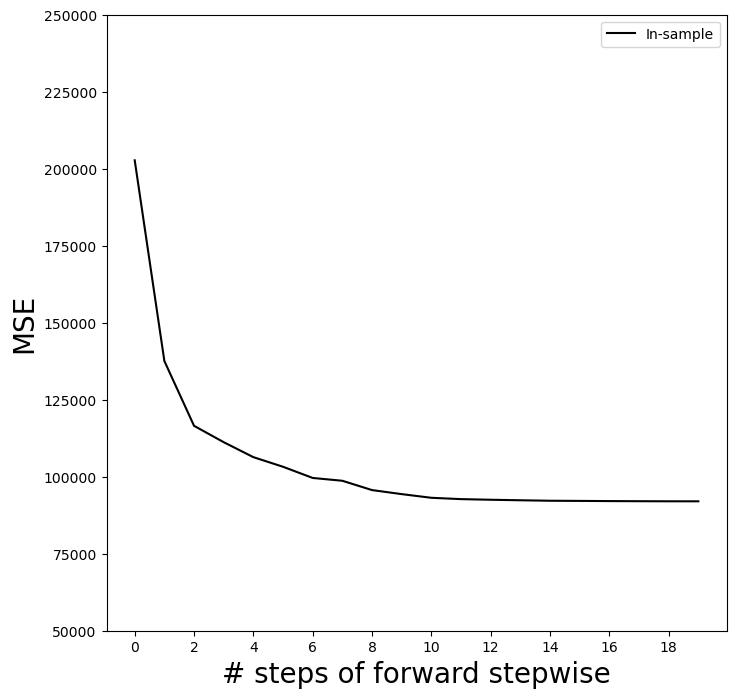

In [17]:
mse_fig, ax = subplots(figsize=(8,8))
insample_mse = ((Yhat_in- Y[:,None])**2).mean(0)
n_steps = insample_mse.shape[0]
ax.plot(np.arange(n_steps),
        insample_mse,
        'k', # color black
        label='In-sample')
ax.set_ylabel('MSE',
              fontsize=20)
ax.set_xlabel('# steps of forward stepwise',
                fontsize=20)
ax.set_xticks(np.arange(n_steps)[::2])
ax.legend()
ax.set_ylim([50000,250000]);

In [18]:
K = 5
kfold = skm.KFold(K,
                  random_state=0,
                  shuffle=True)
Yhat_cv = skm.cross_val_predict(full_path,
                                Hitters,
                                Y,
                                cv=kfold)
Yhat_cv.shape

(263, 20)

In [19]:
cv_mse = []
for train_idx, test_idx in kfold.split(Y):
    errors = (Yhat_cv[test_idx]- Y[test_idx,None])**2
    cv_mse.append(errors.mean(0)) # column means

cv_mse = np.array(cv_mse).T
cv_mse.shape

(20, 5)

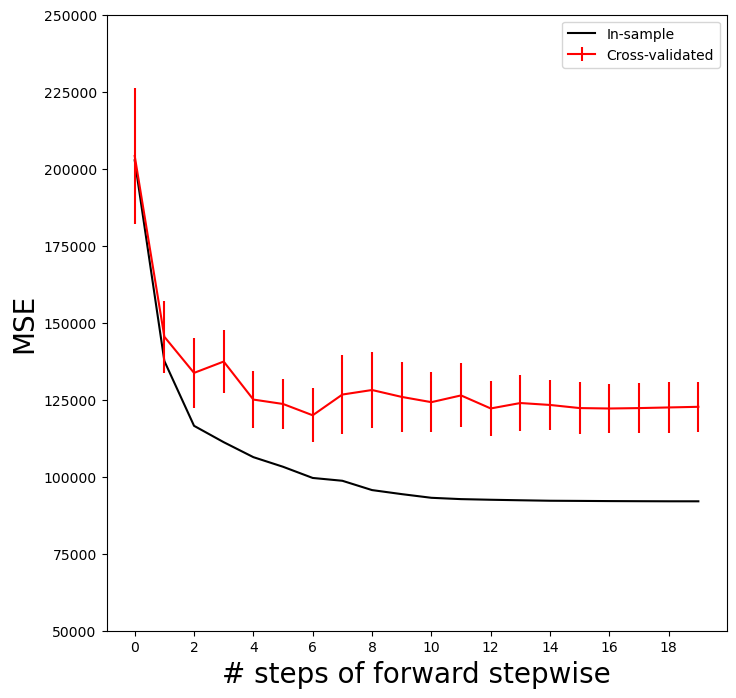

In [ ]:
ax.errorbar(np.arange(n_steps),cv_mse.mean(1),
            cv_mse.std(1) / np.sqrt(K),
            label='Cross-validated',
            c='r') # color red
ax.set_ylim([50000,250000])
ax.legend()
mse_fig

In [21]:
validation = skm.ShuffleSplit(n_splits=1,
                              test_size=0.2,
                              random_state=0)
for train_idx, test_idx in validation.split(Y):
    full_path.fit(Hitters.iloc[train_idx],
                  Y[train_idx])
    Yhat_val = full_path.predict(Hitters.iloc[test_idx])
    errors = (Yhat_val- Y[test_idx,None])**2
    validation_mse = errors.mean(0)

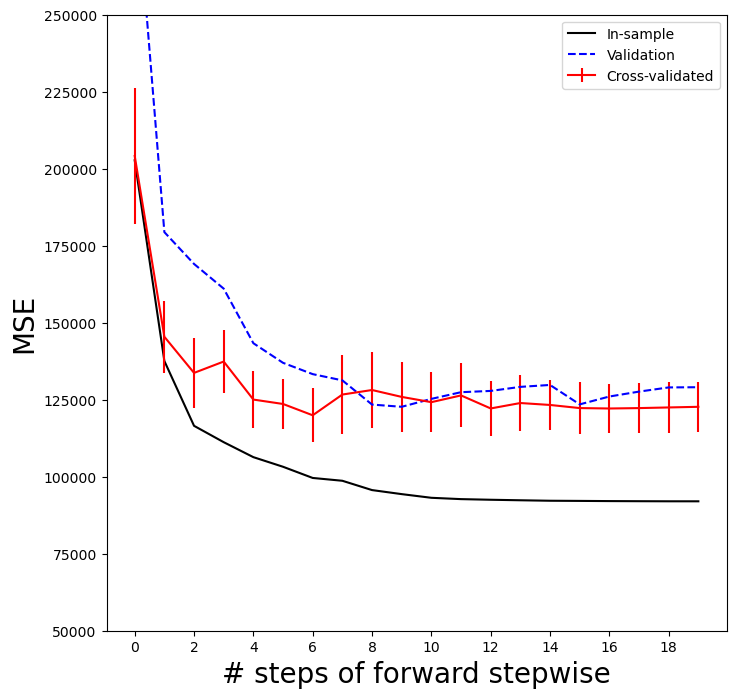

In [22]:
ax.plot(np.arange(n_steps),
        validation_mse,
        'b--', # color blue, broken line
        label='Validation')
ax.set_xticks(np.arange(n_steps)[::2])
ax.set_ylim([50000,250000])
ax.legend()
mse_fig

Best Subset Selection

In [ ]:
D = design.fit_transform(Hitters)
D = D.drop('intercept', axis=1)
X = np.asarray(D)

In [24]:
path = fit_path(X,
                Y,
                max_nonzeros=X.shape[1])

Preprocessing Data.
BnB Started.
Iteration: 1. Number of non-zeros:  1
Iteration: 2. Number of non-zeros:  2
Iteration: 3. Number of non-zeros:  2
Iteration: 4. Number of non-zeros:  2
Iteration: 5. Number of non-zeros:  3
Iteration: 6. Number of non-zeros:  3
Iteration: 7. Number of non-zeros:  4
Iteration: 8. Number of non-zeros:  9
Iteration: 9. Number of non-zeros:  9
Iteration: 10. Number of non-zeros:  9
Iteration: 11. Number of non-zeros:  9
Iteration: 12. Number of non-zeros:  9
Iteration: 13. Number of non-zeros:  9
Iteration: 14. Number of non-zeros:  9
Iteration: 15. Number of non-zeros:  9
Iteration: 16. Number of non-zeros:  9
Iteration: 17. Number of non-zeros:  9
Iteration: 18. Number of non-zeros:  17
Iteration: 19. Number of non-zeros:  19


In [25]:
path[3]

{'B': array([0.        , 3.25484367, 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.67775265, 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        ]),
 'B0': -38.98216739555505,
 'lambda_0': 0.01141624802745019,
 'M': 0.5829861733382015,
 'Time_exceeded': False}

##### Ridge Regression and the Lasso

Ridge Regression

In [27]:
Xs = X- X.mean(0)[None,:]
X_scale = X.std(0)
Xs = Xs / X_scale[None,:]
lambdas = 10**np.linspace(8,-2, 100) / Y.std()
soln_array = skl.ElasticNet.path(Xs,
                                 Y,
                                 l1_ratio=0.01,        # can't be zero
                                 alphas=lambdas,
                                 max_iter=100_000,
                                 tol=1e-6)[1]
soln_array.shape

(19, 100)

In [28]:
soln_path = pd.DataFrame(soln_array.T,
                         columns=D.columns,
                         index=-np.log(lambdas))
soln_path.index.name = 'negative log(lambda)'
soln_path

,AtBat,Hits,HmRun,Runs,RBI,Walks,Years,CAtBat,CHits,CHmRun,CRuns,CRBI,CWalks,League[N],Division[W],PutOuts,Assists,Errors,NewLeague[N]
negative log(lambda),,,,,,,,,,,,,,,,,,,
-12.310855,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
-12.078271,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
-11.845686,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
-11.613102,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
-11.380518,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9.784658,-290.837766,336.954891,37.331027,-59.763826,-26.514159,134.861012,-17.217903,-387.718709,89.421403,-12.315389,476.163294,257.338575,-213.144917,31.257042,-58.457540,78.761611,53.621261,-22.207105,-12.401324
10.017243,-290.890547,337.134052,37.438128,-59.929261,-26.612677,134.904695,-17.109579,-388.410292,88.875452,-12.695293,477.099683,258.021642,-213.297335,31.255466,-58.448598,78.761524,53.644409,-22.197696,-12.390685
10.249827,-290.932551,337.276951,37.523513,-60.061230,-26.691212,134.939492,-17.023535,-388.957478,88.435079,-12.999054,477.847159,258.567478,-213.419091,31.254166,-58.441482,78.761463,53.662732,-22.190172,-12.382160


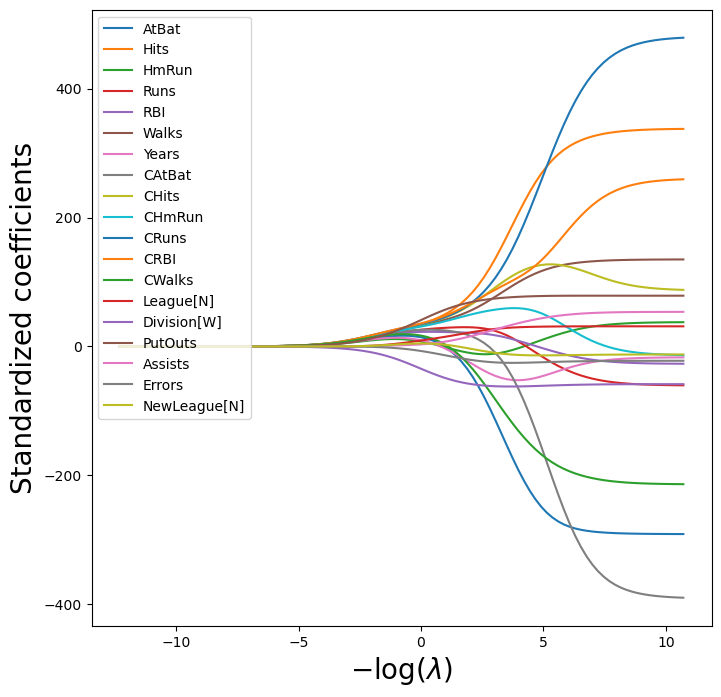

In [29]:
path_fig, ax = subplots(figsize=(8,8))
soln_path.plot(ax=ax, legend=False)
ax.set_xlabel('$-\log(\lambda)$', fontsize=20)
ax.set_ylabel('Standardized coefficients', fontsize=20)
ax.legend(loc='upper left');

In [30]:
beta_hat = soln_path.loc[soln_path.index[39]]
lambdas[39], beta_hat

(25.53538897200662,
 AtBat           5.468249
 Hits            6.266161
 HmRun           4.611820
 Runs            5.919867
 RBI             6.236741
 Walks           6.320869
 Years           5.331340
 CAtBat          7.195275
 CHits           7.591160
 CHmRun          7.230796
 CRuns           7.781849
 CRBI            7.844434
 CWalks          6.635644
 League[N]       0.035258
 Division[W]    -3.126570
 PutOuts         4.636988
 Assists         0.371734
 Errors         -0.126797
 NewLeague[N]    0.143604
 Name: -3.240065292879872, dtype: float64)

In [31]:
np.linalg.norm(beta_hat)

24.331320564843033

In [32]:
beta_hat = soln_path.loc[soln_path.index[59]]
lambdas[59], np.linalg.norm(beta_hat)

(0.24374766133488554, 160.90961591542953)

In [33]:
ridge = skl.ElasticNet(alpha=lambdas[59], l1_ratio=0)
scaler = StandardScaler(with_mean=True, with_std=True)
pipe = Pipeline(steps=[('scaler', scaler), ('ridge', ridge)])
pipe.fit(X, Y)

c:\Users\Zoe Oladokun\AppData\Local\anaconda3\envs\islp_clean\Lib\site-packages\sklearn\linear_model\_coordinate_descent.py:716: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.446e+07, tolerance: 5.332e+03
Linear regression models with a zero l1 penalization strength are more efficiently fitted using one of the solvers implemented in sklearn.linear_model.Ridge/RidgeCV instead.
  model = cd_fast.enet_coordinate_descent(


,"steps steps: list of tuplesList of (name of step, estimator) tuples that are to be chained insequential order. To be compatible with the scikit-learn API, all stepsmust define `fit`. All non-last steps must also define `transform`. See:ref:`Combining Estimators ` for more details.","[('scaler', ...), ('ridge', ...)]"
,"transform_input transform_input: list of str, default=NoneThe names of the :term:`metadata` parameters that should be transformed by thepipeline before passing it to the step consuming it.This enables transforming some input arguments to ``fit`` (other than ``X``)to be transformed by the steps of the pipeline up to the step which requiresthem. Requirement is defined via :ref:`metadata routing `.For instance, this can be used to pass a validation set through the pipeline.You can only set this if metadata routing is enabled, which youcan enable using ``sklearn.set_config(enable_metadata_routing=True)``... versionadded:: 1.6",None
,"memory memory: str or object with the joblib.Memory interface, default=NoneUsed to cache the fitted transformers of the pipeline. The last stepwill never be cached, even if it is a transformer. By default, nocaching is performed. If a string is given, it is the path to thecaching directory. Enabling caching triggers a clone of the transformersbefore fitting. Therefore, the transformer instance given to thepipeline cannot be inspected directly. Use the attribute ``named_steps``or ``steps`` to inspect estimators within the pipeline. Caching thetransformers is advantageous when fitting is time consuming. See:ref:`sphx_glr_auto_examples_neighbors_plot_caching_nearest_neighbors.py`for an example on how to enable caching.",None
,"verbose verbose: bool, default=FalseIf True, the time elapsed while fitting each step will be printed as itis completed.",False
,"copy copy: bool, default=TrueIf False, try to avoid a copy and do inplace scaling instead.This is not guaranteed to always work inplace; e.g. if the data isnot a NumPy array or scipy.sparse CSR matrix, a copy may still bereturned.",True
,"with_mean with_mean: bool, default=TrueIf True, center the data before scaling.This does not work (and will raise an exception) when attempted onsparse matrices, because centering them entails building a densematrix which in common use cases is likely to be too large to fit inmemory.",True
,"with_std with_std: bool, default=TrueIf True, scale the data to unit variance (or equivalently,unit standard deviation).",True
,"alpha alpha: float, default=1.0Constant that multiplies the penalty terms. Defaults to 1.0.See the notes for the exact mathematical meaning of thisparameter. ``alpha = 0`` is equivalent to an ordinary least square,solved by the :class:`LinearRegression` object. For numericalreasons, using ``alpha = 0`` with the ``Lasso`` object is not advised.Given this, you should use the :class:`LinearRegression` object.",0.24374766133488554
,"l1_ratio l1_ratio: float, default=0.5The ElasticNet mixing parameter, with ``0 <= l1_ratio <= 1``. For``l1_ratio = 0`` the penalty is an L2 penalty. ``For l1_ratio = 1`` itis an L1 penalty. For ``0 < l1_ratio < 1``, the penalty is acombination of L1 and L2.",0
,"fit_intercept fit_intercept: bool, default=TrueWhether the intercept should be estimated or not. If ``False``, thedata is assumed to be already centered.",True
,"precompute precompute: bool or array-like of shape (n_features, n_features), default=FalseWhether to use a precomputed Gram matrix to speed upcalculations. The Gram matrix can also be passed as argument.For sparse input this option is always ``False`` to preserve sparsity.Check :ref:`an example on how to use a precomputed Gram Matrix in ElasticNet`for details.",False


In [34]:
np.linalg.norm(ridge.coef_)

160.4237101772592

Estimating Test Error of Ridge Regression

In [35]:
validation = skm.ShuffleSplit(n_splits=1,
                              test_size=0.5,
                              random_state=0)
ridge.alpha = 0.01
results = skm.cross_validate(ridge,
                             X,
                             Y,
                             scoring='neg_mean_squared_error',
                             cv=validation)
-results['test_score']

c:\Users\Zoe Oladokun\AppData\Local\anaconda3\envs\islp_clean\Lib\site-packages\sklearn\linear_model\_coordinate_descent.py:716: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 5.486e+06, tolerance: 2.272e+03
Linear regression models with a zero l1 penalization strength are more efficiently fitted using one of the solvers implemented in sklearn.linear_model.Ridge/RidgeCV instead.
  model = cd_fast.enet_coordinate_descent(


array([134214.00419204])

In [36]:
ridge.alpha = 1e10
results = skm.cross_validate(ridge,
                             X,
                             Y,
                             scoring='neg_mean_squared_error',
                             cv=validation)
-results['test_score']

c:\Users\Zoe Oladokun\AppData\Local\anaconda3\envs\islp_clean\Lib\site-packages\sklearn\linear_model\_coordinate_descent.py:716: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.136e+07, tolerance: 2.272e+03
Linear regression models with a zero l1 penalization strength are more efficiently fitted using one of the solvers implemented in sklearn.linear_model.Ridge/RidgeCV instead.
  model = cd_fast.enet_coordinate_descent(


array([231788.32155285])

In [37]:
param_grid = {'ridge__alpha': lambdas}
grid = skm.GridSearchCV(pipe,
                        param_grid,
                        cv=validation,
                        scoring='neg_mean_squared_error')
grid.fit(X, Y)
grid.best_params_['ridge__alpha']
grid.best_estimator_

c:\Users\Zoe Oladokun\AppData\Local\anaconda3\envs\islp_clean\Lib\site-packages\sklearn\linear_model\_coordinate_descent.py:716: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.136e+07, tolerance: 2.272e+03
Linear regression models with a zero l1 penalization strength are more efficiently fitted using one of the solvers implemented in sklearn.linear_model.Ridge/RidgeCV instead.
  model = cd_fast.enet_coordinate_descent(
c:\Users\Zoe Oladokun\AppData\Local\anaconda3\envs\islp_clean\Lib\site-packages\sklearn\linear_model\_coordinate_descent.py:716: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.136e+07, tolerance: 2.272e+03
Linear regression models with a zero l1 penalization strength are more efficiently fitted u

,"steps steps: list of tuplesList of (name of step, estimator) tuples that are to be chained insequential order. To be compatible with the scikit-learn API, all stepsmust define `fit`. All non-last steps must also define `transform`. See:ref:`Combining Estimators ` for more details.","[('scaler', ...), ('ridge', ...)]"
,"transform_input transform_input: list of str, default=NoneThe names of the :term:`metadata` parameters that should be transformed by thepipeline before passing it to the step consuming it.This enables transforming some input arguments to ``fit`` (other than ``X``)to be transformed by the steps of the pipeline up to the step which requiresthem. Requirement is defined via :ref:`metadata routing `.For instance, this can be used to pass a validation set through the pipeline.You can only set this if metadata routing is enabled, which youcan enable using ``sklearn.set_config(enable_metadata_routing=True)``... versionadded:: 1.6",None
,"memory memory: str or object with the joblib.Memory interface, default=NoneUsed to cache the fitted transformers of the pipeline. The last stepwill never be cached, even if it is a transformer. By default, nocaching is performed. If a string is given, it is the path to thecaching directory. Enabling caching triggers a clone of the transformersbefore fitting. Therefore, the transformer instance given to thepipeline cannot be inspected directly. Use the attribute ``named_steps``or ``steps`` to inspect estimators within the pipeline. Caching thetransformers is advantageous when fitting is time consuming. See:ref:`sphx_glr_auto_examples_neighbors_plot_caching_nearest_neighbors.py`for an example on how to enable caching.",None
,"verbose verbose: bool, default=FalseIf True, the time elapsed while fitting each step will be printed as itis completed.",False
,"copy copy: bool, default=TrueIf False, try to avoid a copy and do inplace scaling instead.This is not guaranteed to always work inplace; e.g. if the data isnot a NumPy array or scipy.sparse CSR matrix, a copy may still bereturned.",True
,"with_mean with_mean: bool, default=TrueIf True, center the data before scaling.This does not work (and will raise an exception) when attempted onsparse matrices, because centering them entails building a densematrix which in common use cases is likely to be too large to fit inmemory.",True
,"with_std with_std: bool, default=TrueIf True, scale the data to unit variance (or equivalently,unit standard deviation).",True
,"alpha alpha: float, default=1.0Constant that multiplies the penalty terms. Defaults to 1.0.See the notes for the exact mathematical meaning of thisparameter. ``alpha = 0`` is equivalent to an ordinary least square,solved by the :class:`LinearRegression` object. For numericalreasons, using ``alpha = 0`` with the ``Lasso`` object is not advised.Given this, you should use the :class:`LinearRegression` object.",0.005899006046740856
,"l1_ratio l1_ratio: float, default=0.5The ElasticNet mixing parameter, with ``0 <= l1_ratio <= 1``. For``l1_ratio = 0`` the penalty is an L2 penalty. ``For l1_ratio = 1`` itis an L1 penalty. For ``0 < l1_ratio < 1``, the penalty is acombination of L1 and L2.",0
,"fit_intercept fit_intercept: bool, default=TrueWhether the intercept should be estimated or not. If ``False``, thedata is assumed to be already centered.",True
,"precompute precompute: bool or array-like of shape (n_features, n_features), default=FalseWhether to use a precomputed Gram matrix to speed upcalculations. The Gram matrix can also be passed as argument.For sparse input this option is always ``False`` to preserve sparsity.Check :ref:`an example on how to use a precomputed Gram Matrix in ElasticNet`for details.",False


In [38]:
grid = skm.GridSearchCV(pipe,
                        param_grid,
                        cv=kfold,
                        scoring='neg_mean_squared_error')
grid.fit(X, Y)
grid.best_params_['ridge__alpha']
grid.best_estimator_

c:\Users\Zoe Oladokun\AppData\Local\anaconda3\envs\islp_clean\Lib\site-packages\sklearn\linear_model\_coordinate_descent.py:716: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.880e+07, tolerance: 3.759e+03
Linear regression models with a zero l1 penalization strength are more efficiently fitted using one of the solvers implemented in sklearn.linear_model.Ridge/RidgeCV instead.
  model = cd_fast.enet_coordinate_descent(
c:\Users\Zoe Oladokun\AppData\Local\anaconda3\envs\islp_clean\Lib\site-packages\sklearn\linear_model\_coordinate_descent.py:716: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 2.101e+07, tolerance: 4.201e+03
Linear regression models with a zero l1 penalization strength are more efficiently fitted u

,"steps steps: list of tuplesList of (name of step, estimator) tuples that are to be chained insequential order. To be compatible with the scikit-learn API, all stepsmust define `fit`. All non-last steps must also define `transform`. See:ref:`Combining Estimators ` for more details.","[('scaler', ...), ('ridge', ...)]"
,"transform_input transform_input: list of str, default=NoneThe names of the :term:`metadata` parameters that should be transformed by thepipeline before passing it to the step consuming it.This enables transforming some input arguments to ``fit`` (other than ``X``)to be transformed by the steps of the pipeline up to the step which requiresthem. Requirement is defined via :ref:`metadata routing `.For instance, this can be used to pass a validation set through the pipeline.You can only set this if metadata routing is enabled, which youcan enable using ``sklearn.set_config(enable_metadata_routing=True)``... versionadded:: 1.6",None
,"memory memory: str or object with the joblib.Memory interface, default=NoneUsed to cache the fitted transformers of the pipeline. The last stepwill never be cached, even if it is a transformer. By default, nocaching is performed. If a string is given, it is the path to thecaching directory. Enabling caching triggers a clone of the transformersbefore fitting. Therefore, the transformer instance given to thepipeline cannot be inspected directly. Use the attribute ``named_steps``or ``steps`` to inspect estimators within the pipeline. Caching thetransformers is advantageous when fitting is time consuming. See:ref:`sphx_glr_auto_examples_neighbors_plot_caching_nearest_neighbors.py`for an example on how to enable caching.",None
,"verbose verbose: bool, default=FalseIf True, the time elapsed while fitting each step will be printed as itis completed.",False
,"copy copy: bool, default=TrueIf False, try to avoid a copy and do inplace scaling instead.This is not guaranteed to always work inplace; e.g. if the data isnot a NumPy array or scipy.sparse CSR matrix, a copy may still bereturned.",True
,"with_mean with_mean: bool, default=TrueIf True, center the data before scaling.This does not work (and will raise an exception) when attempted onsparse matrices, because centering them entails building a densematrix which in common use cases is likely to be too large to fit inmemory.",True
,"with_std with_std: bool, default=TrueIf True, scale the data to unit variance (or equivalently,unit standard deviation).",True
,"alpha alpha: float, default=1.0Constant that multiplies the penalty terms. Defaults to 1.0.See the notes for the exact mathematical meaning of thisparameter. ``alpha = 0`` is equivalent to an ordinary least square,solved by the :class:`LinearRegression` object. For numericalreasons, using ``alpha = 0`` with the ``Lasso`` object is not advised.Given this, you should use the :class:`LinearRegression` object.",0.01185247763144249
,"l1_ratio l1_ratio: float, default=0.5The ElasticNet mixing parameter, with ``0 <= l1_ratio <= 1``. For``l1_ratio = 0`` the penalty is an L2 penalty. ``For l1_ratio = 1`` itis an L1 penalty. For ``0 < l1_ratio < 1``, the penalty is acombination of L1 and L2.",0
,"fit_intercept fit_intercept: bool, default=TrueWhether the intercept should be estimated or not. If ``False``, thedata is assumed to be already centered.",True
,"precompute precompute: bool or array-like of shape (n_features, n_features), default=FalseWhether to use a precomputed Gram matrix to speed upcalculations. The Gram matrix can also be passed as argument.For sparse input this option is always ``False`` to preserve sparsity.Check :ref:`an example on how to use a precomputed Gram Matrix in ElasticNet`for details.",False


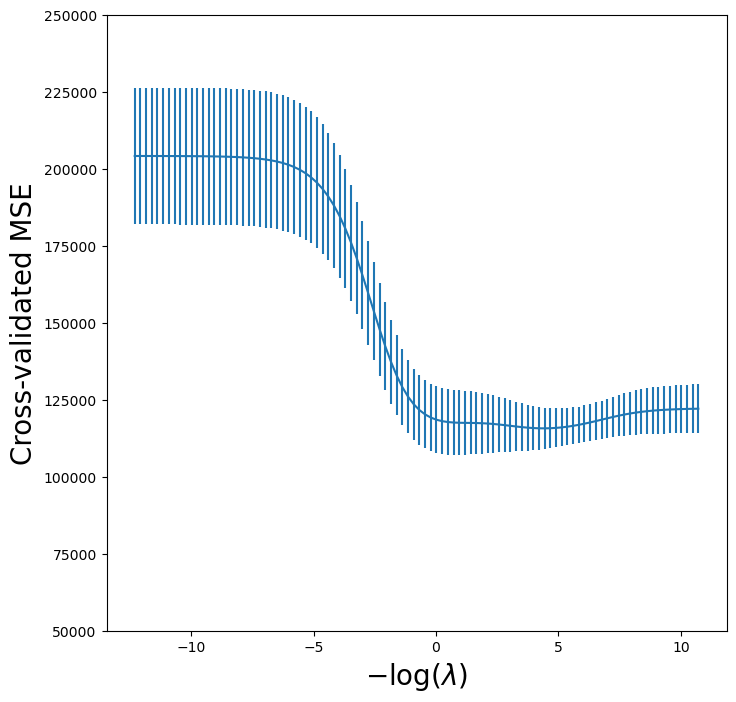

In [39]:
ridge_fig, ax = subplots(figsize=(8,8))
ax.errorbar(-np.log(lambdas),
            -grid.cv_results_['mean_test_score'],
            yerr=grid.cv_results_['std_test_score'] / np.sqrt(K))
ax.set_ylim([50000,250000])
ax.set_xlabel('$-\log(\lambda)$', fontsize=20)
ax.set_ylabel('Cross-validated MSE', fontsize=20);

In [40]:
grid_r2 = skm.GridSearchCV(pipe,
                           param_grid,
                           cv=kfold)
grid_r2.fit(X, Y)

c:\Users\Zoe Oladokun\AppData\Local\anaconda3\envs\islp_clean\Lib\site-packages\sklearn\linear_model\_coordinate_descent.py:716: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.880e+07, tolerance: 3.759e+03
Linear regression models with a zero l1 penalization strength are more efficiently fitted using one of the solvers implemented in sklearn.linear_model.Ridge/RidgeCV instead.
  model = cd_fast.enet_coordinate_descent(
c:\Users\Zoe Oladokun\AppData\Local\anaconda3\envs\islp_clean\Lib\site-packages\sklearn\linear_model\_coordinate_descent.py:716: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 2.101e+07, tolerance: 4.201e+03
Linear regression models with a zero l1 penalization strength are more efficiently fitted u

,"estimator estimator: estimator objectThis is assumed to implement the scikit-learn estimator interface.Either estimator needs to provide a ``score`` function,or ``scoring`` must be passed.",Pipeline(step...l1_ratio=0))])
,"param_grid param_grid: dict or list of dictionariesDictionary with parameters names (`str`) as keys and lists ofparameter settings to try as values, or a list of suchdictionaries, in which case the grids spanned by each dictionaryin the list are explored. This enables searching over any sequenceof parameter settings.",{'ridge__alpha': array([2.2209...22093791e-05])}
,"scoring scoring: str, callable, list, tuple or dict, default=NoneStrategy to evaluate the performance of the cross-validated model onthe test set.If `scoring` represents a single score, one can use:- a single string (see :ref:`scoring_string_names`);- a callable (see :ref:`scoring_callable`) that returns a single value;- `None`, the `estimator`'s :ref:`default evaluation criterion ` is used.If `scoring` represents multiple scores, one can use:- a list or tuple of unique strings;- a callable returning a dictionary where the keys are the metric names and the values are the metric scores;- a dictionary with metric names as keys and callables as values.See :ref:`multimetric_grid_search` for an example.",None
,"n_jobs n_jobs: int, default=NoneNumber of jobs to run in parallel.``None`` means 1 unless in a :obj:`joblib.parallel_backend` context.``-1`` means using all processors. See :term:`Glossary `for more details... versionchanged:: v0.20 `n_jobs` default changed from 1 to None",None
,"refit refit: bool, str, or callable, default=TrueRefit an estimator using the best found parameters on the wholedataset.For multiple metric evaluation, this needs to be a `str` denoting thescorer that would be used to find the best parameters for refittingthe estimator at the end.Where there are considerations other than maximum score inchoosing a best estimator, ``refit`` can be set to a function whichreturns the selected ``best_index_`` given ``cv_results_``. In thatcase, the ``best_estimator_`` and ``best_params_`` will be setaccording to the returned ``best_index_`` while the ``best_score_``attribute will not be available.The refitted estimator is made available at the ``best_estimator_``attribute and permits using ``predict`` directly on this``GridSearchCV`` instance.Also for multiple metric evaluation, the attributes ``best_index_``,``best_score_`` and ``best_params_`` will only be available if``refit`` is set and all of them will be determined w.r.t this specificscorer.See ``scoring`` parameter to know more about multiple metricevaluation.See :ref:`sphx_glr_auto_examples_model_selection_plot_grid_search_digits.py`to see how to design a custom selection strategy using a callablevia `refit`.See :ref:`this example`for an example of how to use ``refit=callable`` to balance modelcomplexity and cross-validated score... versionchanged:: 0.20 Support for callable added.",True
,"cv cv: int, cross-validation generator or an iterable, default=NoneDetermines the cross-validation splitting strategy.Possible inputs for cv are:- None, to use the default 5-fold cross validation,- integer, to specify the number of folds in a `(Stratified)KFold`,- :term:`CV splitter`,- An iterable yielding (train, test) splits as arrays of indices.For integer/None inputs, if the estimator is a classifier and ``y`` iseither binary or multiclass, :class:`StratifiedKFold` is used. In allother cases, :class:`KFold` is used. These splitters are instantiatedwith `shuffle=False` so the splits will be the same across calls.Refer :ref:`User Guide ` for the variouscross-validation strategies that can be used here... versionchanged:: 0.22 ``cv`` default value if None changed from 3-fold to 5-fold.",KFold(n_split... shuffle=True)
,"verbose verbose: intControls the verbosity: the higher, the more messages.- >1 : the computation time for each fold and parameter candidate is displayed;- >2 : the score is al

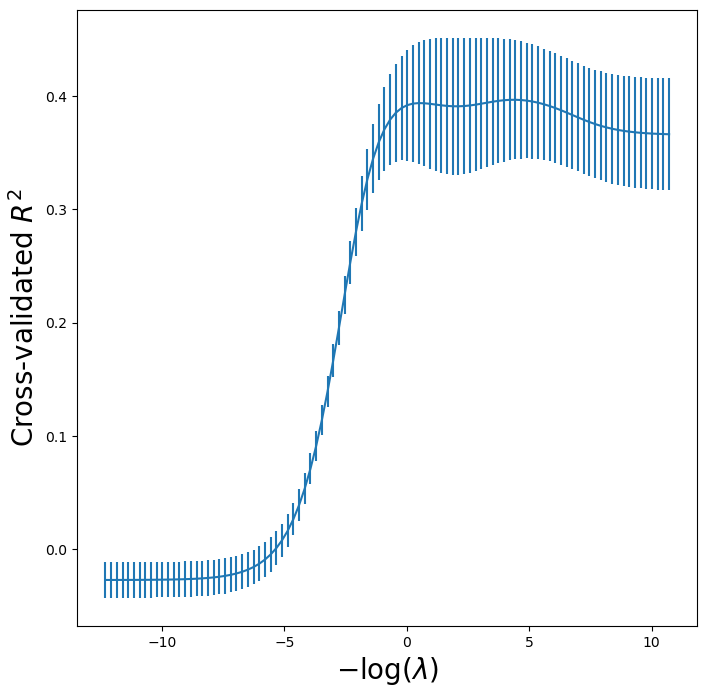

In [41]:
r2_fig, ax = subplots(figsize=(8,8))
ax.errorbar(-np.log(lambdas),
            grid_r2.cv_results_['mean_test_score'],
            yerr=grid_r2.cv_results_['std_test_score'] / np.sqrt(K)
            )
ax.set_xlabel('$-\log(\lambda)$', fontsize=20)
ax.set_ylabel('Cross-validated $R^2$', fontsize=20);

Fast Cross-Validation for Solution Paths

In [42]:
ridgeCV = skl.ElasticNetCV(alphas=lambdas,
                           l1_ratio=0,
                           cv=kfold)
pipeCV = Pipeline(steps=[('scaler', scaler),
                         ('ridge', ridgeCV)])
pipeCV.fit(X, Y)

c:\Users\Zoe Oladokun\AppData\Local\anaconda3\envs\islp_clean\Lib\site-packages\sklearn\linear_model\_coordinate_descent.py:701: UserWarning: Coordinate descent without L1 regularization may lead to unexpected results and is discouraged. Set l1_ratio > 0 to add L1 regularization.
  model = cd_fast.enet_coordinate_descent_gram(
c:\Users\Zoe Oladokun\AppData\Local\anaconda3\envs\islp_clean\Lib\site-packages\sklearn\linear_model\_coordinate_descent.py:701: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.880e+07, tolerance: 3.759e+03
  model = cd_fast.enet_coordinate_descent_gram(
c:\Users\Zoe Oladokun\AppData\Local\anaconda3\envs\islp_clean\Lib\site-packages\sklearn\linear_model\_coordinate_descent.py:701: UserWarning: Coordinate descent without L1 regularization may lead to unexpected results and is discouraged. Set l1_ratio > 0 to add L1 regularizati

,"steps steps: list of tuplesList of (name of step, estimator) tuples that are to be chained insequential order. To be compatible with the scikit-learn API, all stepsmust define `fit`. All non-last steps must also define `transform`. See:ref:`Combining Estimators ` for more details.","[('scaler', ...), ('ridge', ...)]"
,"transform_input transform_input: list of str, default=NoneThe names of the :term:`metadata` parameters that should be transformed by thepipeline before passing it to the step consuming it.This enables transforming some input arguments to ``fit`` (other than ``X``)to be transformed by the steps of the pipeline up to the step which requiresthem. Requirement is defined via :ref:`metadata routing `.For instance, this can be used to pass a validation set through the pipeline.You can only set this if metadata routing is enabled, which youcan enable using ``sklearn.set_config(enable_metadata_routing=True)``... versionadded:: 1.6",None
,"memory memory: str or object with the joblib.Memory interface, default=NoneUsed to cache the fitted transformers of the pipeline. The last stepwill never be cached, even if it is a transformer. By default, nocaching is performed. If a string is given, it is the path to thecaching directory. Enabling caching triggers a clone of the transformersbefore fitting. Therefore, the transformer instance given to thepipeline cannot be inspected directly. Use the attribute ``named_steps``or ``steps`` to inspect estimators within the pipeline. Caching thetransformers is advantageous when fitting is time consuming. See:ref:`sphx_glr_auto_examples_neighbors_plot_caching_nearest_neighbors.py`for an example on how to enable caching.",None
,"verbose verbose: bool, default=FalseIf True, the time elapsed while fitting each step will be printed as itis completed.",False
,"copy copy: bool, default=TrueIf False, try to avoid a copy and do inplace scaling instead.This is not guaranteed to always work inplace; e.g. if the data isnot a NumPy array or scipy.sparse CSR matrix, a copy may still bereturned.",True
,"with_mean with_mean: bool, default=TrueIf True, center the data before scaling.This does not work (and will raise an exception) when attempted onsparse matrices, because centering them entails building a densematrix which in common use cases is likely to be too large to fit inmemory.",True
,"with_std with_std: bool, default=TrueIf True, scale the data to unit variance (or equivalently,unit standard deviation).",True
,"l1_ratio l1_ratio: float or list of float, default=0.5Float between 0 and 1 passed to ElasticNet (scaling betweenl1 and l2 penalties). For ``l1_ratio = 0``the penalty is an L2 penalty. For ``l1_ratio = 1`` it is an L1 penalty.For ``0 < l1_ratio < 1``, the penalty is a combination of L1 and L2This parameter can be a list, in which case the differentvalues are tested by cross-validation and the one giving the bestprediction score is used. Note that a good choice of list ofvalues for l1_ratio is often to put more values close to 1(i.e. Lasso) and less close to 0 (i.e. Ridge), as in ``[.1, .5, .7,.9, .95, .99, 1]``.",0
,"eps eps: float, default=1e-3Length of the path. ``eps=1e-3`` means that``alpha_min / alpha_max = 1e-3``.",0.001
,"n_alphas n_alphas: int, default=100Number of alphas along the regularization path, used for each l1_ratio... deprecated:: 1.7 `n_alphas` was deprecated in 1.7 and will be removed in 1.9. Use `alphas` instead.",'deprecated'
,"alphas alphas: array-like or int, default=NoneValues of alphas to test along the regularization path, used for each l1_ratio.If int, `alphas` values are generated automatically.If array-like, list of alpha values to use... versionchanged:: 1.7 `alphas` accepts an integer value which removes the need to pass `n_alphas`... deprecated:: 1.7 `alphas=None` was deprecated in 1.7 and will be removed in 1.9, at which point the default value will be set to 100.",array([2.2209...22093791e-05])


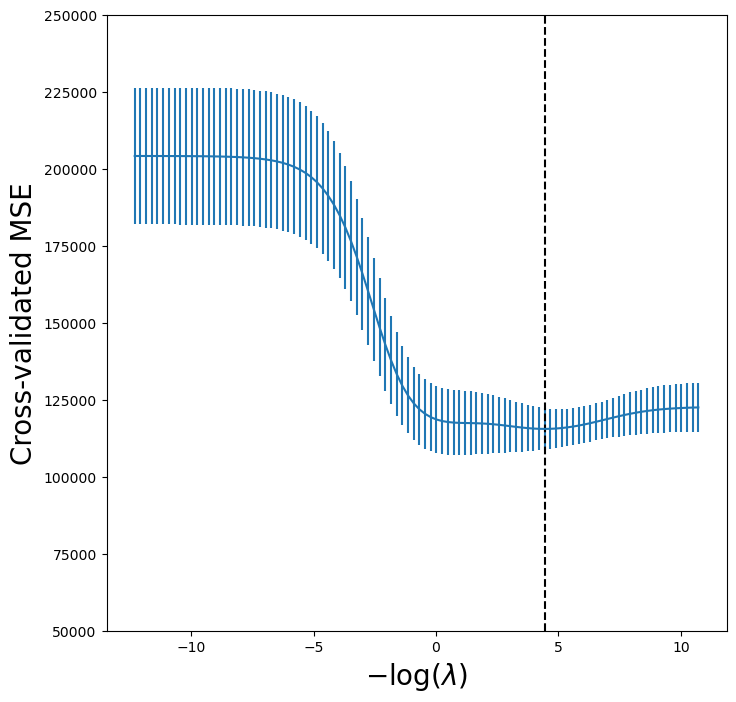

In [43]:
tuned_ridge = pipeCV.named_steps['ridge']
ridgeCV_fig, ax = subplots(figsize=(8,8))
ax.errorbar(-np.log(lambdas),
            tuned_ridge.mse_path_.mean(1),
            yerr=tuned_ridge.mse_path_.std(1) / np.sqrt(K))
ax.axvline(-np.log(tuned_ridge.alpha_), c='k', ls='--')
ax.set_ylim([50000,250000])
ax.set_xlabel('$-\log(\lambda)$', fontsize=20)
ax.set_ylabel('Cross-validated MSE', fontsize=20);

In [44]:
np.min(tuned_ridge.mse_path_.mean(1))

115526.70630987742

In [45]:
tuned_ridge.coef_

array([-222.80877051,  238.77246614,    3.21103754,   -2.93050845,
          3.64888723,  108.90953869,  -50.81896152, -105.15731984,
        122.00714801,   57.1859509 ,  210.35170348,  118.05683748,
       -150.21959435,   30.36634231,  -61.62459095,   77.73832472,
         40.07350744,  -25.02151514,  -13.68429544])

Evaluating Test Error of Cross-Validated Ridge

In [46]:
outer_valid = skm.ShuffleSplit(n_splits=1,
                               test_size=0.25,
                               random_state=1)
inner_cv = skm.KFold(n_splits=5,
                     shuffle=True,
                     random_state=2)
ridgeCV = skl.ElasticNetCV(alphas=lambdas,
                           l1_ratio=0,
                           cv=inner_cv)
pipeCV = Pipeline(steps=[('scaler', scaler),
                         ('ridge', ridgeCV)]);

In [47]:
results = skm.cross_validate(pipeCV,
                             X,
                             Y,
                             cv=outer_valid,
                             scoring='neg_mean_squared_error')
-results['test_score']

c:\Users\Zoe Oladokun\AppData\Local\anaconda3\envs\islp_clean\Lib\site-packages\sklearn\linear_model\_coordinate_descent.py:701: UserWarning: Coordinate descent without L1 regularization may lead to unexpected results and is discouraged. Set l1_ratio > 0 to add L1 regularization.
  model = cd_fast.enet_coordinate_descent_gram(
c:\Users\Zoe Oladokun\AppData\Local\anaconda3\envs\islp_clean\Lib\site-packages\sklearn\linear_model\_coordinate_descent.py:701: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.600e+07, tolerance: 3.201e+03
  model = cd_fast.enet_coordinate_descent_gram(
c:\Users\Zoe Oladokun\AppData\Local\anaconda3\envs\islp_clean\Lib\site-packages\sklearn\linear_model\_coordinate_descent.py:701: UserWarning: Coordinate descent without L1 regularization may lead to unexpected results and is discouraged. Set l1_ratio > 0 to add L1 regularizati

array([132393.84003227])

The Lasso

In [48]:
lassoCV = skl.ElasticNetCV(n_alphas=100,
                           l1_ratio=1,
                           cv=kfold)
pipeCV = Pipeline(steps=[('scaler', scaler),
                         ('lasso', lassoCV)])
pipeCV.fit(X, Y)
tuned_lasso = pipeCV.named_steps['lasso']
tuned_lasso.alpha_

c:\Users\Zoe Oladokun\AppData\Local\anaconda3\envs\islp_clean\Lib\site-packages\sklearn\linear_model\_coordinate_descent.py:1663: FutureWarning: 'n_alphas' was deprecated in 1.7 and will be removed in 1.9. 'alphas' now accepts an integer value which removes the need to pass 'n_alphas'. The default value of 'alphas' will change from None to 100 in 1.9. Pass an explicit value to 'alphas' and leave 'n_alphas' to its default value to silence this warning.
  warnings.warn(


3.1472370031649866

In [49]:
lambdas, soln_array = skl.Lasso.path(Xs,
                                     Y,
                                     l1_ratio=1,
                                     n_alphas=100)[:2]
soln_path = pd.DataFrame(soln_array.T,
                         columns=D.columns,
                         index=-np.log(lambdas))

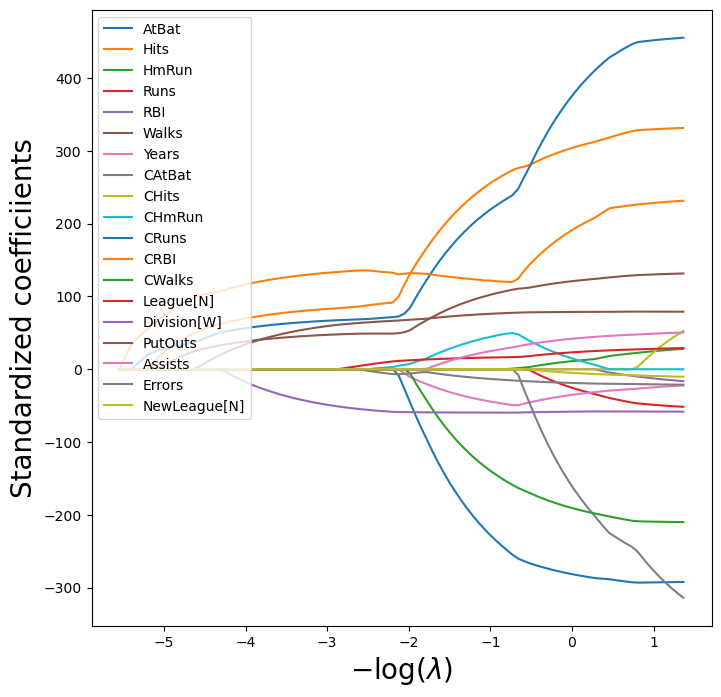

In [50]:
path_fig, ax = subplots(figsize=(8,8))
soln_path.plot(ax=ax, legend=False)
ax.legend(loc='upper left')
ax.set_xlabel('$-\log(\lambda)$', fontsize=20)
ax.set_ylabel('Standardized coefficiients', fontsize=20);

In [51]:
np.min(tuned_lasso.mse_path_.mean(1))

114690.73118253506

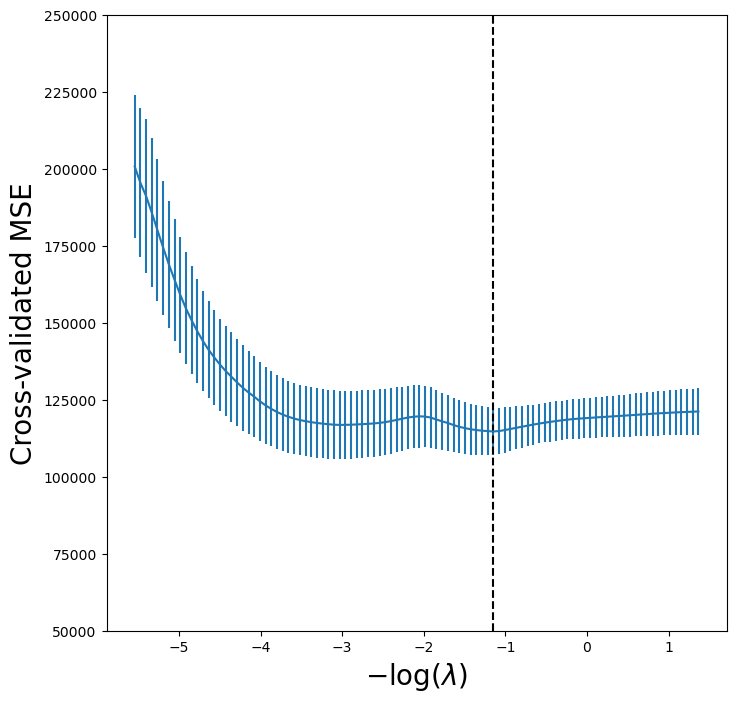

In [52]:
lassoCV_fig, ax = subplots(figsize=(8,8))
ax.errorbar(-np.log(tuned_lasso.alphas_),
            tuned_lasso.mse_path_.mean(1),
            yerr=tuned_lasso.mse_path_.std(1) / np.sqrt(K))
ax.axvline(-np.log(tuned_lasso.alpha_), c='k', ls='--')
ax.set_ylim([50000,250000])
ax.set_xlabel('$-\log(\lambda)$', fontsize=20)
ax.set_ylabel('Cross-validated MSE', fontsize=20);

In [53]:
tuned_lasso.coef_

array([-210.01008773,  243.4550306 ,    0.        ,    0.        ,
          0.        ,   97.69397357,  -41.52283116,   -0.        ,
          0.        ,   39.62298193,  205.75273856,  124.55456561,
       -126.29986768,   15.70262427,  -59.50157967,   75.24590036,
         21.62698014,  -12.04423675,   -0.        ])

##### PCR and PLS Regression

Principal Components Regression

In [54]:
pca = PCA(n_components=2)
linreg = skl.LinearRegression()
pipe = Pipeline([('pca', pca),
                 ('linreg', linreg)])
pipe.fit(X, Y)
pipe.named_steps['linreg'].coef_

array([0.09846131, 0.4758765 ])

In [55]:
pipe = Pipeline([('scaler', scaler),
                 ('pca', pca),
                 ('linreg', linreg)])
pipe.fit(X, Y)
pipe.named_steps['linreg'].coef_

array([106.36859204,  21.60350456])

In [56]:
param_grid = {'pca__n_components': range(1, 20)}
grid = skm.GridSearchCV(pipe,
                        param_grid,
                        cv=kfold,
                        scoring='neg_mean_squared_error')
grid.fit(X, Y)

,"estimator estimator: estimator objectThis is assumed to implement the scikit-learn estimator interface.Either estimator needs to provide a ``score`` function,or ``scoring`` must be passed.",Pipeline(step...egression())])
,"param_grid param_grid: dict or list of dictionariesDictionary with parameters names (`str`) as keys and lists ofparameter settings to try as values, or a list of suchdictionaries, in which case the grids spanned by each dictionaryin the list are explored. This enables searching over any sequenceof parameter settings.","{'pca__n_components': range(1, 20)}"
,"scoring scoring: str, callable, list, tuple or dict, default=NoneStrategy to evaluate the performance of the cross-validated model onthe test set.If `scoring` represents a single score, one can use:- a single string (see :ref:`scoring_string_names`);- a callable (see :ref:`scoring_callable`) that returns a single value;- `None`, the `estimator`'s :ref:`default evaluation criterion ` is used.If `scoring` represents multiple scores, one can use:- a list or tuple of unique strings;- a callable returning a dictionary where the keys are the metric names and the values are the metric scores;- a dictionary with metric names as keys and callables as values.See :ref:`multimetric_grid_search` for an example.",'neg_mean_squared_error'
,"n_jobs n_jobs: int, default=NoneNumber of jobs to run in parallel.``None`` means 1 unless in a :obj:`joblib.parallel_backend` context.``-1`` means using all processors. See :term:`Glossary `for more details... versionchanged:: v0.20 `n_jobs` default changed from 1 to None",None
,"refit refit: bool, str, or callable, default=TrueRefit an estimator using the best found parameters on the wholedataset.For multiple metric evaluation, this needs to be a `str` denoting thescorer that would be used to find the best parameters for refittingthe estimator at the end.Where there are considerations other than maximum score inchoosing a best estimator, ``refit`` can be set to a function whichreturns the selected ``best_index_`` given ``cv_results_``. In thatcase, the ``best_estimator_`` and ``best_params_`` will be setaccording to the returned ``best_index_`` while the ``best_score_``attribute will not be available.The refitted estimator is made available at the ``best_estimator_``attribute and permits using ``predict`` directly on this``GridSearchCV`` instance.Also for multiple metric evaluation, the attributes ``best_index_``,``best_score_`` and ``best_params_`` will only be available if``refit`` is set and all of them will be determined w.r.t this specificscorer.See ``scoring`` parameter to know more about multiple metricevaluation.See :ref:`sphx_glr_auto_examples_model_selection_plot_grid_search_digits.py`to see how to design a custom selection strategy using a callablevia `refit`.See :ref:`this example`for an example of how to use ``refit=callable`` to balance modelcomplexity and cross-validated score... versionchanged:: 0.20 Support for callable added.",True
,"cv cv: int, cross-validation generator or an iterable, default=NoneDetermines the cross-validation splitting strategy.Possible inputs for cv are:- None, to use the default 5-fold cross validation,- integer, to specify the number of folds in a `(Stratified)KFold`,- :term:`CV splitter`,- An iterable yielding (train, test) splits as arrays of indices.For integer/None inputs, if the estimator is a classifier and ``y`` iseither binary or multiclass, :class:`StratifiedKFold` is used. In allother cases, :class:`KFold` is used. These splitters are instantiatedwith `shuffle=False` so the splits will be the same across calls.Refer :ref:`User Guide ` for the variouscross-validation strategies that can be used here... versionchanged:: 0.22 ``cv`` default value if None changed from 3-fold to 5-fold.",KFold(n_split... shuffle=True)
,"verbose verbose: intControls the verbosity: the higher, the more messages.- >1 : the computation time for each fold and parameter candidate is displayed;- >2 : the sc

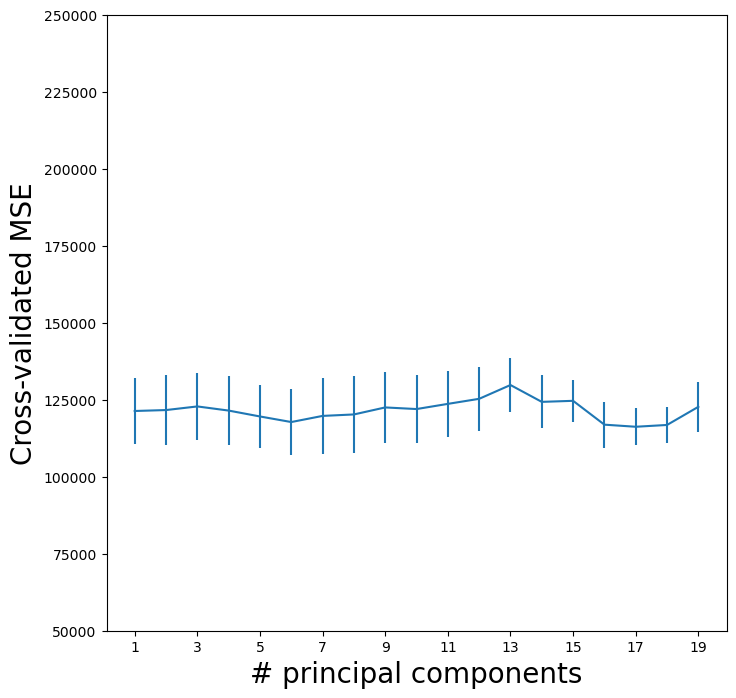

In [57]:
pcr_fig, ax = subplots(figsize=(8,8))
n_comp = param_grid['pca__n_components']
ax.errorbar(n_comp,
            -grid.cv_results_['mean_test_score'],
            grid.cv_results_['std_test_score'] / np.sqrt(K))
ax.set_ylabel('Cross-validated MSE', fontsize=20)
ax.set_xlabel('# principal components', fontsize=20)
ax.set_xticks(n_comp[::2])
ax.set_ylim([50000,250000]);

In [58]:
Xn = np.zeros((X.shape[0], 1))
cv_null = skm.cross_validate(linreg,
                             Xn,
                             Y,
                             cv=kfold,
                             scoring='neg_mean_squared_error')
-cv_null['test_score'].mean()

204139.30692994667

In [59]:
pipe.named_steps['pca'].explained_variance_ratio_

array([0.3831424 , 0.21841076])

Partial Least Squares

In [60]:
pls = PLSRegression(n_components=2,
                    scale=True)
pls.fit(X, Y)

,"n_components n_components: int, default=2Number of components to keep. Should be in `[1, n_features]`.",2
,"scale scale: bool, default=TrueWhether to scale `X` and `y`.",True
,"max_iter max_iter: int, default=500The maximum number of iterations of the power method when`algorithm='nipals'`. Ignored otherwise.",500
,"tol tol: float, default=1e-06The tolerance used as convergence criteria in the power method: thealgorithm stops whenever the squared norm of `u_i - u_{i-1}` is lessthan `tol`, where `u` corresponds to the left singular vector.",1e-06
,"copy copy: bool, default=TrueWhether to copy `X` and `y` in :term:`fit` before applying centering,and potentially scaling. If `False`, these operations will be doneinplace, modifying both arrays.",True


In [61]:
param_grid = {'n_components':range(1, 20)}
grid = skm.GridSearchCV(pls,
                        param_grid,
                        cv=kfold,
                        scoring='neg_mean_squared_error')
grid.fit(X, Y)

,"estimator estimator: estimator objectThis is assumed to implement the scikit-learn estimator interface.Either estimator needs to provide a ``score`` function,or ``scoring`` must be passed.",PLSRegression()
,"param_grid param_grid: dict or list of dictionariesDictionary with parameters names (`str`) as keys and lists ofparameter settings to try as values, or a list of suchdictionaries, in which case the grids spanned by each dictionaryin the list are explored. This enables searching over any sequenceof parameter settings.","{'n_components': range(1, 20)}"
,"scoring scoring: str, callable, list, tuple or dict, default=NoneStrategy to evaluate the performance of the cross-validated model onthe test set.If `scoring` represents a single score, one can use:- a single string (see :ref:`scoring_string_names`);- a callable (see :ref:`scoring_callable`) that returns a single value;- `None`, the `estimator`'s :ref:`default evaluation criterion ` is used.If `scoring` represents multiple scores, one can use:- a list or tuple of unique strings;- a callable returning a dictionary where the keys are the metric names and the values are the metric scores;- a dictionary with metric names as keys and callables as values.See :ref:`multimetric_grid_search` for an example.",'neg_mean_squared_error'
,"n_jobs n_jobs: int, default=NoneNumber of jobs to run in parallel.``None`` means 1 unless in a :obj:`joblib.parallel_backend` context.``-1`` means using all processors. See :term:`Glossary `for more details... versionchanged:: v0.20 `n_jobs` default changed from 1 to None",None
,"refit refit: bool, str, or callable, default=TrueRefit an estimator using the best found parameters on the wholedataset.For multiple metric evaluation, this needs to be a `str` denoting thescorer that would be used to find the best parameters for refittingthe estimator at the end.Where there are considerations other than maximum score inchoosing a best estimator, ``refit`` can be set to a function whichreturns the selected ``best_index_`` given ``cv_results_``. In thatcase, the ``best_estimator_`` and ``best_params_`` will be setaccording to the returned ``best_index_`` while the ``best_score_``attribute will not be available.The refitted estimator is made available at the ``best_estimator_``attribute and permits using ``predict`` directly on this``GridSearchCV`` instance.Also for multiple metric evaluation, the attributes ``best_index_``,``best_score_`` and ``best_params_`` will only be available if``refit`` is set and all of them will be determined w.r.t this specificscorer.See ``scoring`` parameter to know more about multiple metricevaluation.See :ref:`sphx_glr_auto_examples_model_selection_plot_grid_search_digits.py`to see how to design a custom selection strategy using a callablevia `refit`.See :ref:`this example`for an example of how to use ``refit=callable`` to balance modelcomplexity and cross-validated score... versionchanged:: 0.20 Support for callable added.",True
,"cv cv: int, cross-validation generator or an iterable, default=NoneDetermines the cross-validation splitting strategy.Possible inputs for cv are:- None, to use the default 5-fold cross validation,- integer, to specify the number of folds in a `(Stratified)KFold`,- :term:`CV splitter`,- An iterable yielding (train, test) splits as arrays of indices.For integer/None inputs, if the estimator is a classifier and ``y`` iseither binary or multiclass, :class:`StratifiedKFold` is used. In allother cases, :class:`KFold` is used. These splitters are instantiatedwith `shuffle=False` so the splits will be the same across calls.Refer :ref:`User Guide ` for the variouscross-validation strategies that can be used here... versionchanged:: 0.22 ``cv`` default value if None changed from 3-fold to 5-fold.",KFold(n_split... shuffle=True)
,"verbose verbose: intControls the verbosity: the higher, the more messages.- >1 : the computation time for each fold and parameter candidate is displayed;- >2 : the score is also displaye

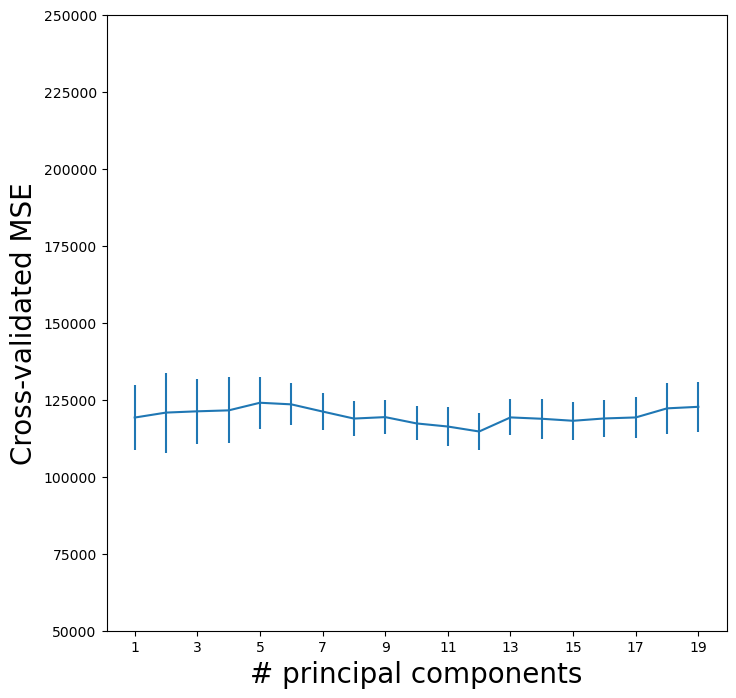

In [62]:
pls_fig, ax = subplots(figsize=(8,8))
n_comp = param_grid['n_components']
ax.errorbar(n_comp,
            -grid.cv_results_['mean_test_score'],
            grid.cv_results_['std_test_score'] / np.sqrt(K))
ax.set_ylabel('Cross-validated MSE', fontsize=20)
ax.set_xlabel('# principal components', fontsize=20)
ax.set_xticks(n_comp[::2])
ax.set_ylim([50000,250000]);

#### Exercises

$Conceptual$

1. We perform best subset, forward stepwise, and backward stepwise selection on a single data set. For each approach, we obtain $p + 1$ models, containing $0, 1, 2, \ldots, p$ predictors. Explain your answers:

   (a) Which of the three models with $k$ predictors has the smallest training RSS?  

**Answer: Best Subset Selection**

Explanation:
Best subset selection examines all $\binom{p}{k}$ possible models with exactly $k$ predictors and selects the one with the lowest training RSS. Forward and backward stepwise selection use greedy algorithms that don't consider all possible combinations, so they may miss the optimal k-variable model. Therefore, best subset selection is guaranteed to find the model with the smallest training RSS among all possible k-variable models.


In [63]:
# Conceptual illustration
print("Training RSS Comparison for k-variable models:")
print("=" * 50)
print("Best Subset:     SMALLEST (examines all combinations)")
print("Forward Stepwise: ≥ Best Subset (greedy, may be suboptimal)")
print("Backward Stepwise: ≥ Best Subset (greedy, may be suboptimal)")

Training RSS Comparison for k-variable models:
Best Subset:     SMALLEST (examines all combinations)
Forward Stepwise: ≥ Best Subset (greedy, may be suboptimal)
Backward Stepwise: ≥ Best Subset (greedy, may be suboptimal)


(b) Which of the three models with $k$ predictors has the smallest test RSS?  
   

**Answer: Cannot be determined with certainty**

Explanation:
While best subset has the smallest *training* RSS, this doesn't guarantee the smallest *test* RSS. The model with the smallest training RSS may overfit the training data. Forward or backward stepwise selection might produce models that generalize better to test data due to their more constrained search process, which can act as implicit regularization.

In [64]:
# Conceptual illustration
print("Test RSS Comparison for k-variable models:")
print("=" * 50)
print("Cannot determine which will be smallest:")
print("  - Best subset: smallest training RSS, but may overfit")
print("  - Forward/Backward: may generalize better despite higher training RSS")
print("  - Test performance depends on the specific dataset")

Test RSS Comparison for k-variable models:
Cannot determine which will be smallest:
  - Best subset: smallest training RSS, but may overfit
  - Forward/Backward: may generalize better despite higher training RSS
  - Test performance depends on the specific dataset


(c) True or False:  
   i. The predictors in the $k$-variable model identified by forward stepwise are a subset of the predictors in the $(k + 1)$-variable model identified by forward stepwise selection.  
   ii. The predictors in the $k$-variable model identified by backward stepwise are a subset of the predictors in the $(k + 1)$-variable model identified by backward stepwise selection.  
   iii. The predictors in the $k$-variable model identified by backward stepwise are a subset of the predictors in the $(k + 1)$-variable model identified by forward stepwise selection.  
   iv. The predictors in the $k$-variable model identified by forward stepwise are a subset of the predictors in the $(k + 1)$-variable model identified by backward stepwise selection.  
   v. The predictors in the $k$-variable model identified by best subset are a subset of the predictors in the $(k + 1)$-variable model identified by best subset selection.  

i. Forward Stepwise: k-variable ⊆ (k+1)-variable

**TRUE**

Forward stepwise starts with no predictors and *adds* one predictor at a time. The (k+1)-variable model is constructed by adding one predictor to the k-variable model.



In [65]:
# Forward stepwise illustration
print("Forward Stepwise Selection:")
print("Step 0: {} (no predictors)")
print("Step 1: {X₃} (add best single predictor)")
print("Step 2: {X₃, X₅} (add best to existing)")
print("Step 3: {X₃, X₅, X₁} (add best to existing)")
print("\nClearly: k-variable ⊆ (k+1)-variable ✓")

Forward Stepwise Selection:
Step 0: {} (no predictors)
Step 1: {X₃} (add best single predictor)
Step 2: {X₃, X₅} (add best to existing)
Step 3: {X₃, X₅, X₁} (add best to existing)

Clearly: k-variable ⊆ (k+1)-variable ✓


ii. Backward Stepwise: k-variable ⊆ (k+1)-variable

**TRUE**

Backward stepwise starts with all p predictors and *removes* one predictor at a time. The k-variable model is constructed by removing one predictor from the (k+1)-variable model.


In [66]:
# Backward stepwise illustration
print("Backward Stepwise Selection:")
print("Step 0: {X₁, X₂, X₃, X₄, X₅} (all predictors)")
print("Step 1: {X₁, X₂, X₃, X₄} (remove worst)")
print("Step 2: {X₁, X₂, X₄} (remove worst from remaining)")
print("Step 3: {X₁, X₄} (remove worst from remaining)")
print("\nClearly: k-variable ⊆ (k+1)-variable ✓")

Backward Stepwise Selection:
Step 0: {X₁, X₂, X₃, X₄, X₅} (all predictors)
Step 1: {X₁, X₂, X₃, X₄} (remove worst)
Step 2: {X₁, X₂, X₄} (remove worst from remaining)
Step 3: {X₁, X₄} (remove worst from remaining)

Clearly: k-variable ⊆ (k+1)-variable ✓


iii. Backward k-variable ⊆ Forward (k+1)-variable

**FALSE**

These are independent algorithms with no inherent subset relationship. Backward stepwise removes predictors from the full model, while forward stepwise adds predictors from scratch.

In [67]:
# Example showing they're independent
print("Example:")
print("Backward k-variable: {X₁, X₃, X₅}")
print("Forward (k+1)-variable: {X₂, X₄, X₆, X₇}")
print("\nNo subset relationship guaranteed ✗")

Example:
Backward k-variable: {X₁, X₃, X₅}
Forward (k+1)-variable: {X₂, X₄, X₆, X₇}

No subset relationship guaranteed ✗


iv. Forward k-variable ⊆ Backward (k+1)-variable

**FALSE**

Same reasoning as (iii): these are independent algorithms with no inherent subset relationship.

In [69]:

# Example showing they're independent
print("Example:")
print("Forward k-variable: {X₂, X₄}")
print("Backward (k+1)-variable: {X₁, X₃, X₅}")
print("\nNo subset relationship guaranteed ✗")

Example:
Forward k-variable: {X₂, X₄}
Backward (k+1)-variable: {X₁, X₃, X₅}

No subset relationship guaranteed ✗


v. Best Subset k-variable ⊆ Best Subset (k+1)-variable

**FALSE**

Best subset selection independently chooses the optimal set of predictors for each model size. There's no guarantee that the optimal k-variable model is contained in the optimal (k+1)-variable model.

In [68]:
# Example demonstration
import itertools
import numpy as np

# Simulated example
print("Best Subset Selection Example:")
print("=" * 50)
print("Suppose for some dataset:")
print("  Best k=2 model: {X₁, X₃} (lowest RSS among all 2-variable models)")
print("  Best k=3 model: {X₂, X₄, X₅} (lowest RSS among all 3-variable models)")
print("\n{X₁, X₃} ⊄ {X₂, X₄, X₅}")
print("\nBest subset independently optimizes for each k ✗")

Best Subset Selection Example:
Suppose for some dataset:
  Best k=2 model: {X₁, X₃} (lowest RSS among all 2-variable models)
  Best k=3 model: {X₂, X₄, X₅} (lowest RSS among all 3-variable models)

{X₁, X₃} ⊄ {X₂, X₄, X₅}

Best subset independently optimizes for each k ✗


##### Summary Table

| Statement | Answer | Reason |
|-----------|--------|--------|
| (c)(i) Forward k ⊆ Forward (k+1) | **TRUE** | Forward adds predictors sequentially |
| (c)(ii) Backward k ⊆ Backward (k+1) | **TRUE** | Backward removes predictors sequentially |
| (c)(iii) Backward k ⊆ Forward (k+1) | **FALSE** | Independent algorithms |
| (c)(iv) Forward k ⊆ Backward (k+1) | **FALSE** | Independent algorithms |
| (c)(v) Best k ⊆ Best (k+1) | **FALSE** | Independent optimization for each k |

2. For parts (a) through (c), indicate which of i. through iv. is correct. Justify your answer.  
   (a) The lasso, relative to least squares, is:  
   i. More flexible and hence will give improved prediction accuracy when its increase in bias is less than its decrease in variance.  
   ii. More flexible and hence will give improved prediction accuracy when its increase in variance is less than its decrease in bias.  
   iii. Less flexible and hence will give improved prediction accuracy when its increase in bias is less than its decrease in variance.  
   iv. Less flexible and hence will give improved prediction accuracy when its increase in variance is less than its decrease in bias.  

   

(a) The Lasso relative to Least Squares is

**Answer: iii. Less flexible and hence will give improved prediction accuracy when its increase in bias is less than its decrease in variance.**

In [70]:
import numpy as np
import matplotlib.pyplot as plt

print("LASSO vs Least Squares")
print("=" * 60)
print("\nLeast Squares minimizes: RSS = Σ(yᵢ - ŷᵢ)²")
print("LASSO minimizes: RSS + λΣ|βⱼ|")
print("\nKey differences:")
print("  - LASSO adds L1 penalty constraint")
print("  - Constraint reduces the space of possible coefficient values")
print("  - Some coefficients shrink to exactly zero")
print("  - Results in LESS FLEXIBLE model")
print("\nBias-Variance Tradeoff:")
print("  - Flexibility ↓  →  Bias ↑ (more restricted coefficient space)")
print("  - Flexibility ↓  →  Variance ↓ (less sensitive to training data)")
print("\nImproved prediction when: Decrease in Variance > Increase in Bias")
print("Equivalently: Increase in Bias < Decrease in Variance ✓")

LASSO vs Least Squares

Least Squares minimizes: RSS = Σ(yᵢ - ŷᵢ)²
LASSO minimizes: RSS + λΣ|βⱼ|

Key differences:
  - LASSO adds L1 penalty constraint
  - Constraint reduces the space of possible coefficient values
  - Some coefficients shrink to exactly zero
  - Results in LESS FLEXIBLE model

Bias-Variance Tradeoff:
  - Flexibility ↓  →  Bias ↑ (more restricted coefficient space)
  - Flexibility ↓  →  Variance ↓ (less sensitive to training data)

Improved prediction when: Decrease in Variance > Increase in Bias
Equivalently: Increase in Bias < Decrease in Variance ✓



[Plot saved as 'lasso_flexibility.png']


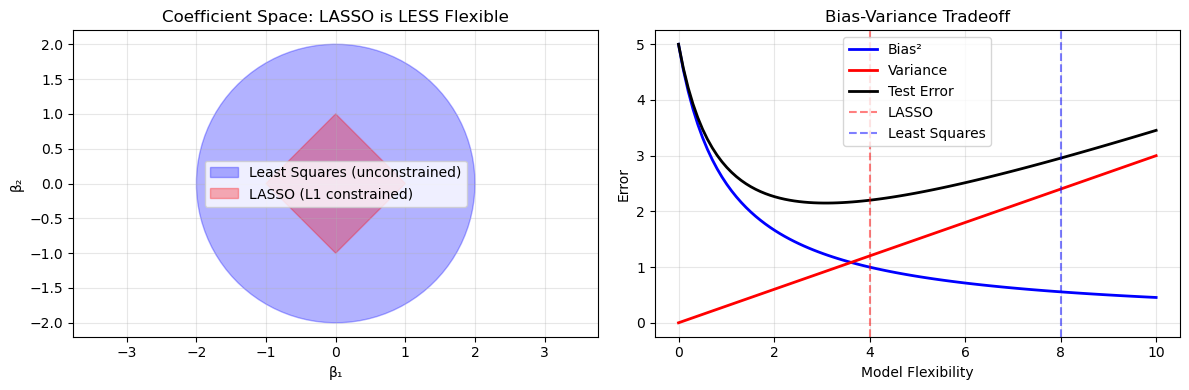

In [71]:
# Conceptual illustration of flexibility
fig, axes = plt.subplots(1, 2, figsize=(12, 4))

# Coefficient space visualization
ax = axes[0]
theta = np.linspace(0, 2*np.pi, 100)

# Least squares (unconstrained)
circle_r = 2
x_circle = circle_r * np.cos(theta)
y_circle = circle_r * np.sin(theta)
ax.fill(x_circle, y_circle, alpha=0.3, color='blue', label='Least Squares (unconstrained)')

# LASSO (L1 constraint creates diamond)
lasso_constraint = 1
diamond_x = np.array([lasso_constraint, 0, -lasso_constraint, 0, lasso_constraint])
diamond_y = np.array([0, lasso_constraint, 0, -lasso_constraint, 0])
ax.fill(diamond_x, diamond_y, alpha=0.3, color='red', label='LASSO (L1 constrained)')

ax.set_xlabel('β₁')
ax.set_ylabel('β₂')
ax.set_title('Coefficient Space: LASSO is LESS Flexible')
ax.legend()
ax.grid(True, alpha=0.3)
ax.axis('equal')

# Bias-Variance tradeoff
ax = axes[1]
flexibility = np.linspace(0, 10, 100)
bias_squared = 5 / (flexibility + 1)  # Decreases with flexibility
variance = 0.3 * flexibility  # Increases with flexibility
test_error = bias_squared + variance

ls_flex = 8  # Least squares is more flexible
lasso_flex = 4  # LASSO is less flexible

ax.plot(flexibility, bias_squared, 'b-', label='Bias²', linewidth=2)
ax.plot(flexibility, variance, 'r-', label='Variance', linewidth=2)
ax.plot(flexibility, test_error, 'k-', label='Test Error', linewidth=2)

ax.axvline(lasso_flex, color='red', linestyle='--', alpha=0.5, label='LASSO')
ax.axvline(ls_flex, color='blue', linestyle='--', alpha=0.5, label='Least Squares')

ax.set_xlabel('Model Flexibility')
ax.set_ylabel('Error')
ax.set_title('Bias-Variance Tradeoff')
ax.legend()
ax.grid(True, alpha=0.3)

plt.tight_layout()
plt.savefig('lasso_flexibility.png', dpi=150, bbox_inches='tight')
print("\n[Plot saved as 'lasso_flexibility.png']")

(b) Ridge Regression relative to Least Squares is

**Answer: iii. Less flexible and hence will give improved prediction accuracy when its increase in bias is less than its decrease in variance.**

In [72]:

print("\n" + "=" * 60)
print("RIDGE REGRESSION vs Least Squares")
print("=" * 60)
print("\nLeast Squares minimizes: RSS = Σ(yᵢ - ŷᵢ)²")
print("Ridge minimizes: RSS + λΣβⱼ²")
print("\nKey differences:")
print("  - Ridge adds L2 penalty constraint")
print("  - Constraint reduces the space of possible coefficient values")
print("  - Coefficients shrink toward zero (but not exactly to zero)")
print("  - Results in LESS FLEXIBLE model")
print("\nBias-Variance Tradeoff:")
print("  - Flexibility ↓  →  Bias ↑ (coefficients shrunk)")
print("  - Flexibility ↓  →  Variance ↓ (less sensitive to training data)")
print("\nImproved prediction when: Decrease in Variance > Increase in Bias")
print("Equivalently: Increase in Bias < Decrease in Variance ✓")




RIDGE REGRESSION vs Least Squares

Least Squares minimizes: RSS = Σ(yᵢ - ŷᵢ)²
Ridge minimizes: RSS + λΣβⱼ²

Key differences:
  - Ridge adds L2 penalty constraint
  - Constraint reduces the space of possible coefficient values
  - Coefficients shrink toward zero (but not exactly to zero)
  - Results in LESS FLEXIBLE model

Bias-Variance Tradeoff:
  - Flexibility ↓  →  Bias ↑ (coefficients shrunk)
  - Flexibility ↓  →  Variance ↓ (less sensitive to training data)

Improved prediction when: Decrease in Variance > Increase in Bias
Equivalently: Increase in Bias < Decrease in Variance ✓


##### Comparison of LASSO and Ridge:

In [73]:
# Numerical example
print("\nNumerical Example:")
print("-" * 60)

# Simulated scenario
scenarios = {
    'Least Squares': {'flexibility': 10, 'bias²': 0.5, 'variance': 8.0},
    'Ridge (λ=1)': {'flexibility': 6, 'bias²': 1.2, 'variance': 4.0},
    'LASSO (λ=1)': {'flexibility': 5, 'bias²': 1.5, 'variance': 3.5}
}

for method, values in scenarios.items():
    test_error = values['bias²'] + values['variance']
    print(f"\n{method}:")
    print(f"  Flexibility: {values['flexibility']}")
    print(f"  Bias²:       {values['bias²']:.1f}")
    print(f"  Variance:    {values['variance']:.1f}")
    print(f"  Test Error:  {test_error:.1f}")

print("\nBoth Ridge and LASSO trade increased bias for decreased variance")
print("Both are LESS flexible than least squares")


Numerical Example:
------------------------------------------------------------

Least Squares:
  Flexibility: 10
  Bias²:       0.5
  Variance:    8.0
  Test Error:  8.5

Ridge (λ=1):
  Flexibility: 6
  Bias²:       1.2
  Variance:    4.0
  Test Error:  5.2

LASSO (λ=1):
  Flexibility: 5
  Bias²:       1.5
  Variance:    3.5
  Test Error:  5.0

Both Ridge and LASSO trade increased bias for decreased variance
Both are LESS flexible than least squares


(c) Non-linear Methods relative to Least Squares is

**Answer: ii. More flexible and hence will give improved prediction accuracy when its increase in variance is less than its decrease in bias.**

In [74]:
print("\n" + "=" * 60)
print("NON-LINEAR METHODS vs Least Squares")
print("=" * 60)
print("\nLeast Squares assumes: f(X) = β₀ + β₁X₁ + ... + βₚXₚ (linear)")
print("Non-linear methods allow: f(X) = arbitrary non-linear function")
print("\nExamples of non-linear methods:")
print("  - Polynomial regression: β₀ + β₁X + β₂X² + β₃X³ + ...")
print("  - Splines: piecewise polynomials")
print("  - GAMs: Σ fⱼ(Xⱼ) where fⱼ are smooth non-linear functions")
print("  - Decision trees, random forests, neural networks")
print("\nKey differences:")
print("  - Can capture non-linear relationships")
print("  - Can fit more complex patterns")
print("  - Results in MORE FLEXIBLE model")
print("\nBias-Variance Tradeoff:")
print("  - Flexibility ↑  →  Bias ↓ (can fit complex true functions)")
print("  - Flexibility ↑  →  Variance ↑ (more sensitive to training data)")
print("\nImproved prediction when: Decrease in Bias > Increase in Variance")
print("Equivalently: Increase in Variance < Decrease in Bias ✓")


NON-LINEAR METHODS vs Least Squares

Least Squares assumes: f(X) = β₀ + β₁X₁ + ... + βₚXₚ (linear)
Non-linear methods allow: f(X) = arbitrary non-linear function

Examples of non-linear methods:
  - Polynomial regression: β₀ + β₁X + β₂X² + β₃X³ + ...
  - Splines: piecewise polynomials
  - GAMs: Σ fⱼ(Xⱼ) where fⱼ are smooth non-linear functions
  - Decision trees, random forests, neural networks

Key differences:
  - Can capture non-linear relationships
  - Can fit more complex patterns
  - Results in MORE FLEXIBLE model

Bias-Variance Tradeoff:
  - Flexibility ↑  →  Bias ↓ (can fit complex true functions)
  - Flexibility ↑  →  Variance ↑ (more sensitive to training data)

Improved prediction when: Decrease in Bias > Increase in Variance
Equivalently: Increase in Variance < Decrease in Bias ✓



[Plot saved as 'nonlinear_flexibility.png']


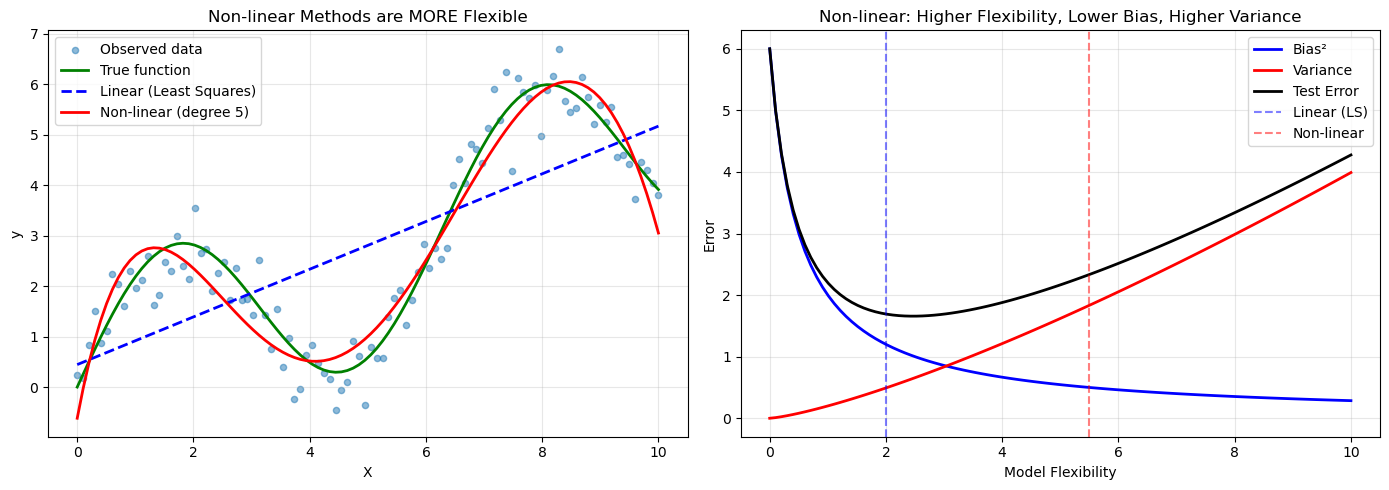

In [75]:
# Generate example data with non-linear relationship
np.random.seed(42)
X = np.linspace(0, 10, 100)
true_function = lambda x: 2 * np.sin(x) + 0.5 * x
y_true = true_function(X)
y_observed = y_true + np.random.normal(0, 0.5, len(X))

# Fit different models
from numpy.polynomial import Polynomial

# Linear (least squares)
linear_coef = np.polyfit(X, y_observed, 1)
y_linear = np.polyval(linear_coef, X)

# Polynomial degree 5 (non-linear)
poly_coef = np.polyfit(X, y_observed, 5)
y_poly = np.polyval(poly_coef, X)

# Polynomial degree 15 (overly flexible)
poly15_coef = np.polyfit(X, y_observed, 15)
y_poly15 = np.polyval(poly15_coef, X)

# Plot
fig, axes = plt.subplots(1, 2, figsize=(14, 5))

ax = axes[0]
ax.scatter(X, y_observed, alpha=0.5, s=20, label='Observed data')
ax.plot(X, y_true, 'g-', linewidth=2, label='True function')
ax.plot(X, y_linear, 'b--', linewidth=2, label='Linear (Least Squares)')
ax.plot(X, y_poly, 'r-', linewidth=2, label='Non-linear (degree 5)')
ax.set_xlabel('X')
ax.set_ylabel('y')
ax.set_title('Non-linear Methods are MORE Flexible')
ax.legend()
ax.grid(True, alpha=0.3)

# Bias-variance illustration
ax = axes[1]
flexibility = np.linspace(0, 10, 100)
# For non-linear vs linear comparison
bias_squared = 3 / (flexibility + 0.5)  # Decreases with flexibility
variance = 0.2 * flexibility**1.3  # Increases with flexibility
test_error = bias_squared + variance

linear_flex = 2  # Linear is less flexible
nonlinear_flex = 5.5  # Non-linear is more flexible

ax.plot(flexibility, bias_squared, 'b-', label='Bias²', linewidth=2)
ax.plot(flexibility, variance, 'r-', label='Variance', linewidth=2)
ax.plot(flexibility, test_error, 'k-', label='Test Error', linewidth=2)

ax.axvline(linear_flex, color='blue', linestyle='--', alpha=0.5, label='Linear (LS)')
ax.axvline(nonlinear_flex, color='red', linestyle='--', alpha=0.5, label='Non-linear')

ax.set_xlabel('Model Flexibility')
ax.set_ylabel('Error')
ax.set_title('Non-linear: Higher Flexibility, Lower Bias, Higher Variance')
ax.legend()
ax.grid(True, alpha=0.3)

plt.tight_layout()
plt.savefig('nonlinear_flexibility.png', dpi=150, bbox_inches='tight')
print("\n[Plot saved as 'nonlinear_flexibility.png']")

Summary Table

In [76]:
print("\n" + "=" * 60)
print("SUMMARY")
print("=" * 60)

summary = [
    ["Method", "Flexibility vs LS", "Bias Change", "Variance Change", "Answer"],
    ["-" * 20, "-" * 17, "-" * 12, "-" * 16, "-" * 6],
    ["LASSO", "LESS ↓", "↑", "↓", "iii"],
    ["Ridge", "LESS ↓", "↑", "↓", "iii"],
    ["Non-linear", "MORE ↑", "↓", "↑", "ii"]
]

for row in summary:
    print(f"{row[0]:<20} {row[1]:<17} {row[2]:<12} {row[3]:<16} {row[4]:<6}")

print("\n" + "=" * 60)
print("KEY INSIGHT:")
print("=" * 60)
print("Regularization (LASSO, Ridge): Less flexible")
print("  → Improves when: Increase in Bias < Decrease in Variance")
print("\nNon-linear methods: More flexible")
print("  → Improves when: Increase in Variance < Decrease in Bias")


SUMMARY
Method               Flexibility vs LS Bias Change  Variance Change  Answer
-------------------- ----------------- ------------ ---------------- ------
LASSO                LESS ↓            ↑            ↓                iii   
Ridge                LESS ↓            ↑            ↓                iii   
Non-linear           MORE ↑            ↓            ↑                ii    

KEY INSIGHT:
Regularization (LASSO, Ridge): Less flexible
  → Improves when: Increase in Bias < Decrease in Variance

Non-linear methods: More flexible
  → Improves when: Increase in Variance < Decrease in Bias


3. Suppose we estimate the regression coefficients in a linear regression model by minimizing

$$
\sum_{i=1}^{n} \left( y_i - (\beta_0 + \sum_{j=1}^{p} \beta_j x_{ij}) \right)^2
$$

subject to

$$
\sum_{j=1}^{p} |\beta_j| \leq s
$$

for a particular value of $s$. For parts (a) through (e), indicate which of i. through v. is correct. Justify your answer.

(a) As we increase $s$ from 0, the training RSS will:
   i. Increase initially, and then eventually start decreasing in an inverted U shape.  
   

   ii. Decrease initially, and then eventually start increasing in a U shape.  
   
   iii. Steadily increase.
   
   iv. Steadily decrease.  
   
   v. Remain constant.  

   

In [77]:
import numpy as np
import matplotlib.pyplot as plt

print("LASSO: Effect of Constraint Parameter s")
print("=" * 70)
print("\nKey relationships:")
print("  s = 0     → All βⱼ = 0 (null model, maximum constraint)")
print("  s small   → Highly constrained (high bias, low variance)")
print("  s → ∞     → Unconstrained (least squares, low bias, high variance)")
print("\nAs s increases: constraint relaxes, model becomes MORE FLEXIBLE")

LASSO: Effect of Constraint Parameter s

Key relationships:
  s = 0     → All βⱼ = 0 (null model, maximum constraint)
  s small   → Highly constrained (high bias, low variance)
  s → ∞     → Unconstrained (least squares, low bias, high variance)

As s increases: constraint relaxes, model becomes MORE FLEXIBLE


(a) Training RSS as s increases

**Answer: iv. Steadily decrease**

In [78]:
print("\n" + "=" * 70)
print("(a) TRAINING RSS")
print("=" * 70)

print("\nLogical reasoning:")
print("  1. At s = 0: All βⱼ = 0 → Training RSS is maximized")
print("     (predicting ȳ for all observations)")
print("\n  2. As s increases: Constraint relaxes")
print("     - Optimizer can use larger |βⱼ| values")
print("     - Can fit training data better")
print("     - Training RSS decreases")
print("\n  3. As s → ∞: Approaches least squares solution")
print("     - Least squares minimizes training RSS")
print("     - Training RSS reaches minimum")
print("\nConclusion: Training RSS STEADILY DECREASES ✓")
print("\nWhy not U-shaped?")
print("  - More flexibility ALWAYS allows better training fit")
print("  - Optimizer never forced to fit worse as s increases")
print("  - Training RSS is monotonically non-increasing in s")


(a) TRAINING RSS

Logical reasoning:
  1. At s = 0: All βⱼ = 0 → Training RSS is maximized
     (predicting ȳ for all observations)

  2. As s increases: Constraint relaxes
     - Optimizer can use larger |βⱼ| values
     - Can fit training data better
     - Training RSS decreases

  3. As s → ∞: Approaches least squares solution
     - Least squares minimizes training RSS
     - Training RSS reaches minimum

Conclusion: Training RSS STEADILY DECREASES ✓

Why not U-shaped?
  - More flexibility ALWAYS allows better training fit
  - Optimizer never forced to fit worse as s increases
  - Training RSS is monotonically non-increasing in s



Simulation:


[Creating visualization...]


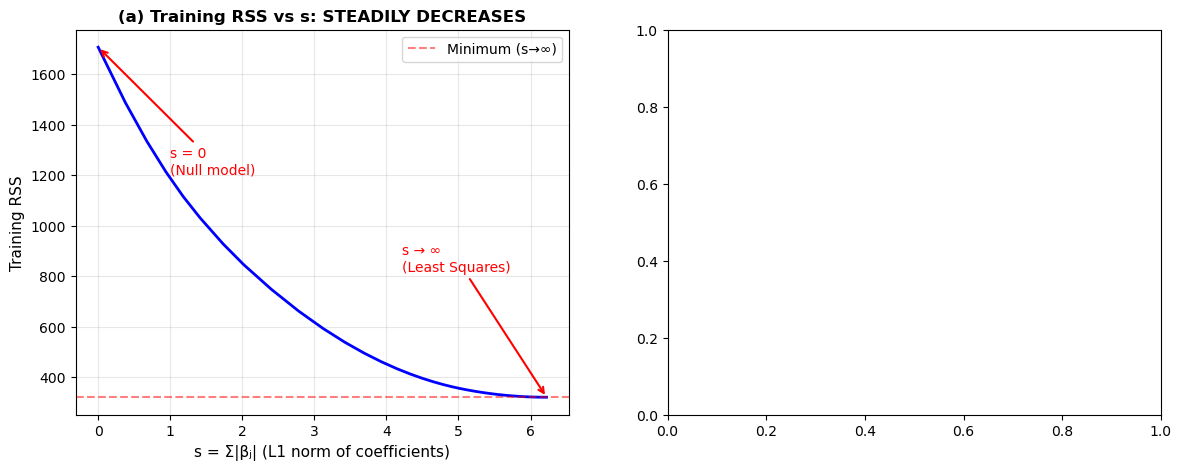

In [79]:
# Simulate LASSO path
from sklearn.linear_model import Lasso
from sklearn.preprocessing import StandardScaler

np.random.seed(42)
n, p = 100, 5

# Generate data
X = np.random.randn(n, p)
true_beta = np.array([3, -2, 1.5, 0, 0])
y = X @ true_beta + np.random.randn(n) * 2

# Standardize
scaler_X = StandardScaler()
X_scaled = scaler_X.fit_transform(X)

# Try different values of s (via alpha in sklearn)
# Note: sklearn uses alpha (penalty), we convert to approximate s
alphas = np.logspace(2, -3, 100)
train_rss = []
coef_norms = []

for alpha in alphas:
    lasso = Lasso(alpha=alpha, max_iter=10000)
    lasso.fit(X_scaled, y)
    y_pred = lasso.predict(X_scaled)
    rss = np.sum((y - y_pred) ** 2)
    train_rss.append(rss)
    coef_norms.append(np.sum(np.abs(lasso.coef_)))

# Plot
fig, axes = plt.subplots(1, 2, figsize=(14, 5))

ax = axes[0]
ax.plot(coef_norms, train_rss, 'b-', linewidth=2)
ax.set_xlabel('s = Σ|βⱼ| (L1 norm of coefficients)', fontsize=11)
ax.set_ylabel('Training RSS', fontsize=11)
ax.set_title('(a) Training RSS vs s: STEADILY DECREASES', fontsize=12, fontweight='bold')
ax.grid(True, alpha=0.3)
ax.axhline(y=min(train_rss), color='r', linestyle='--', alpha=0.5, label='Minimum (s→∞)')
ax.legend()

# Annotate
ax.annotate('s = 0\n(Null model)', xy=(0, train_rss[0]), 
            xytext=(1, train_rss[0] - 500),
            arrowprops=dict(arrowstyle='->', color='red', lw=1.5),
            fontsize=10, color='red')
ax.annotate('s → ∞\n(Least Squares)', xy=(coef_norms[-1], train_rss[-1]), 
            xytext=(coef_norms[-1] - 2, train_rss[-1] + 500),
            arrowprops=dict(arrowstyle='->', color='red', lw=1.5),
            fontsize=10, color='red')

print("\n[Creating visualization...]")

(b) Test RSS as s increases

**Answer: ii. Decrease initially, and then eventually start increasing in a U shape.**

In [80]:
print("\n" + "=" * 70)
print("(b) TEST RSS")
print("=" * 70)

print("\nLogical reasoning:")
print("  1. At s = 0: High bias (underfitting)")
print("     - Model too simple, poor test performance")
print("     - Test RSS is HIGH")
print("\n  2. As s increases initially: Bias decreases faster than variance increases")
print("     - Model can capture true signal")
print("     - Test RSS DECREASES")
print("\n  3. Optimal s: Bias-variance tradeoff is balanced")
print("     - Test RSS reaches MINIMUM")
print("\n  4. As s increases further: Variance increases faster than bias decreases")
print("     - Model starts overfitting")
print("     - Test RSS INCREASES")
print("\n  5. As s → ∞: Least squares (potential overfitting)")
print("     - High variance, low bias")
print("     - Test RSS may be high again")
print("\nConclusion: Test RSS has U-SHAPE (decreases then increases) ✓")


(b) TEST RSS

Logical reasoning:
  1. At s = 0: High bias (underfitting)
     - Model too simple, poor test performance
     - Test RSS is HIGH

  2. As s increases initially: Bias decreases faster than variance increases
     - Model can capture true signal
     - Test RSS DECREASES

  3. Optimal s: Bias-variance tradeoff is balanced
     - Test RSS reaches MINIMUM

  4. As s increases further: Variance increases faster than bias decreases
     - Model starts overfitting
     - Test RSS INCREASES

  5. As s → ∞: Least squares (potential overfitting)
     - High variance, low bias
     - Test RSS may be high again

Conclusion: Test RSS has U-SHAPE (decreases then increases) ✓


Simulation:

In [ ]:
# Generate test data
X_test = np.random.randn(n, p)
y_test = X_test @ true_beta + np.random.randn(n) * 2
X_test_scaled = scaler_X.transform(X_test)

test_rss = []
for alpha in alphas:
    lasso = Lasso(alpha=alpha, max_iter=10000)
    lasso.fit(X_scaled, y)
    y_pred_test = lasso.predict(X_test_scaled)
    rss = np.sum((y_test - y_pred_test) ** 2)
    test_rss.append(rss)

ax = axes[1]
ax.plot(coef_norms, test_rss, 'r-', linewidth=2, label='Test RSS')
ax.set_xlabel('s = Σ|βⱼ| (L1 norm of coefficients)', fontsize=11)
ax.set_ylabel('Test RSS', fontsize=11)
ax.set_title('(b) Test RSS vs s: U-SHAPED', fontsize=12, fontweight='bold')
ax.grid(True, alpha=0.3)

# Find minimum
min_idx = np.argmin(test_rss)
ax.axvline(x=coef_norms[min_idx], color='g', linestyle='--', alpha=0.5, label='Optimal s')
ax.plot(coef_norms[min_idx], test_rss[min_idx], 'go', markersize=10, label='Minimum')
ax.legend()

# Annotate regions
ax.annotate('Underfitting\n(High Bias)', xy=(coef_norms[5], test_rss[5]), 
            xytext=(coef_norms[5] - 1, test_rss[5] + 500),
            arrowprops=dict(arrowstyle='->', color='blue', lw=1.5),
            fontsize=9, color='blue')
ax.annotate('Overfitting\n(High Variance)', xy=(coef_norms[-10], test_rss[-10]), 
            xytext=(coef_norms[-10] - 2, test_rss[-10] + 500),
            arrowprops=dict(arrowstyle='->', color='blue', lw=1.5),
            fontsize=9, color='blue')

plt.tight_layout()
plt.savefig('lasso_s_effect_rss.png', dpi=150, bbox_inches='tight')
print("[Plot saved: 'lasso_s_effect_rss.png']")

[Plot saved: 'lasso_s_effect_rss.png']


<Figure size 640x480 with 0 Axes>

(c) Variance as s increases


**Answer: iii. Steadily increase**

In [84]:
print("\n" + "=" * 70)
print("(c) VARIANCE")
print("=" * 70)

print("\nDefinition: Variance = E[(f̂(x₀) - E[f̂(x₀)])²]")
print("  → Measures variability of predictions across different training sets")
print("\nLogical reasoning:")
print("  1. At s = 0: No flexibility")
print("     - f̂(x) = β₀ (constant)")
print("     - Predictions don't vary with training data")
print("     - Variance = 0 (minimum)")
print("\n  2. As s increases: Model becomes more flexible")
print("     - Coefficients can be larger")
print("     - Model more sensitive to training data")
print("     - Variance INCREASES")
print("\n  3. As s → ∞: Least squares (maximum flexibility)")
print("     - Most sensitive to training data")
print("     - Variance = maximum")
print("\nConclusion: Variance STEADILY INCREASES ✓")
print("\nKey principle:")
print("  More flexibility → More variance")
print("  Less constraint → More variance")


(c) VARIANCE

Definition: Variance = E[(f̂(x₀) - E[f̂(x₀)])²]
  → Measures variability of predictions across different training sets

Logical reasoning:
  1. At s = 0: No flexibility
     - f̂(x) = β₀ (constant)
     - Predictions don't vary with training data
     - Variance = 0 (minimum)

  2. As s increases: Model becomes more flexible
     - Coefficients can be larger
     - Model more sensitive to training data
     - Variance INCREASES

  3. As s → ∞: Least squares (maximum flexibility)
     - Most sensitive to training data
     - Variance = maximum

Conclusion: Variance STEADILY INCREASES ✓

Key principle:
  More flexibility → More variance
  Less constraint → More variance


Conceptual Visualization:


[Creating bias-variance visualization...]


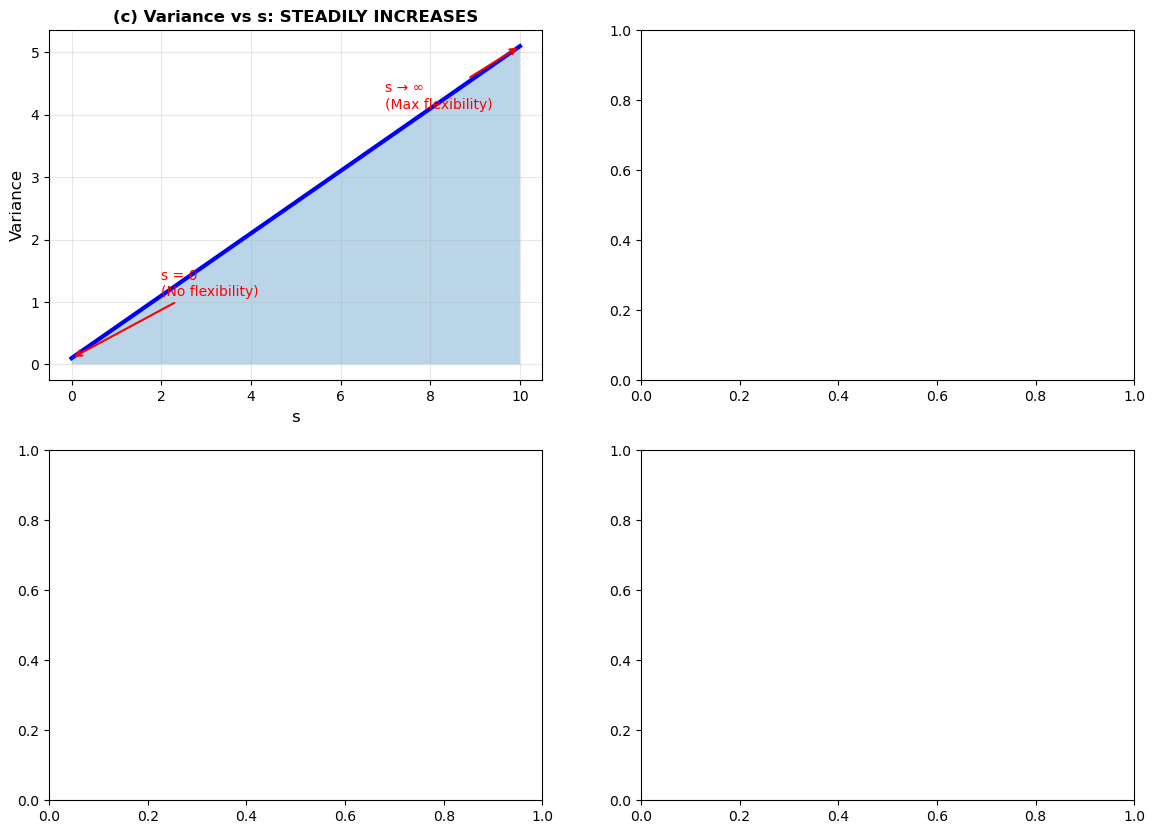

In [85]:
fig, axes = plt.subplots(2, 2, figsize=(14, 10))

# Variance illustration
ax = axes[0, 0]
s_values = np.linspace(0, 10, 100)
variance = 0.1 + 0.5 * s_values  # Steadily increasing
ax.plot(s_values, variance, 'b-', linewidth=3)
ax.set_xlabel('s', fontsize=12)
ax.set_ylabel('Variance', fontsize=12)
ax.set_title('(c) Variance vs s: STEADILY INCREASES', fontsize=12, fontweight='bold')
ax.grid(True, alpha=0.3)
ax.fill_between(s_values, 0, variance, alpha=0.3)

# Annotate
ax.annotate('s = 0\n(No flexibility)', xy=(0, variance[0]), 
            xytext=(2, variance[0] + 1),
            arrowprops=dict(arrowstyle='->', color='red', lw=1.5),
            fontsize=10, color='red')
ax.annotate('s → ∞\n(Max flexibility)', xy=(s_values[-1], variance[-1]), 
            xytext=(s_values[-1] - 3, variance[-1] - 1),
            arrowprops=dict(arrowstyle='->', color='red', lw=1.5),
            fontsize=10, color='red')

print("\n[Creating bias-variance visualization...]")

(d) (Squared) Bias as s increases

**Answer: iv. Steadily decrease**

In [86]:
print("\n" + "=" * 70)
print("(d) (SQUARED) BIAS")
print("=" * 70)

print("\nDefinition: Bias² = [E[f̂(x₀)] - f(x₀)]²")
print("  → Measures how far expected prediction is from true function")
print("\nLogical reasoning:")
print("  1. At s = 0: Maximum constraint")
print("     - f̂(x) = β₀ (overly simplistic)")
print("     - Cannot capture true relationship")
print("     - Bias² = maximum (high bias)")
print("\n  2. As s increases: Constraint relaxes")
print("     - Model can use more predictors")
print("     - Can better approximate true function f(x)")
print("     - Bias² DECREASES")
print("\n  3. As s → ∞: Least squares (unbiased)")
print("     - If model is correctly specified, bias → 0")
print("     - Bias² = minimum")
print("\nConclusion: Bias² STEADILY DECREASES ✓")
print("\nKey principle:")
print("  More flexibility → Less bias")
print("  Less constraint → Less bias")


(d) (SQUARED) BIAS

Definition: Bias² = [E[f̂(x₀)] - f(x₀)]²
  → Measures how far expected prediction is from true function

Logical reasoning:
  1. At s = 0: Maximum constraint
     - f̂(x) = β₀ (overly simplistic)
     - Cannot capture true relationship
     - Bias² = maximum (high bias)

  2. As s increases: Constraint relaxes
     - Model can use more predictors
     - Can better approximate true function f(x)
     - Bias² DECREASES

  3. As s → ∞: Least squares (unbiased)
     - If model is correctly specified, bias → 0
     - Bias² = minimum

Conclusion: Bias² STEADILY DECREASES ✓

Key principle:
  More flexibility → Less bias
  Less constraint → Less bias



Visualization:

In [87]:
# Bias illustration
ax = axes[0, 1]
bias_squared = 5 / (s_values + 0.5)  # Steadily decreasing
ax.plot(s_values, bias_squared, 'r-', linewidth=3)
ax.set_xlabel('s', fontsize=12)
ax.set_ylabel('Bias²', fontsize=12)
ax.set_title('(d) Bias² vs s: STEADILY DECREASES', fontsize=12, fontweight='bold')
ax.grid(True, alpha=0.3)
ax.fill_between(s_values, 0, bias_squared, alpha=0.3, color='red')

# Annotate
ax.annotate('s = 0\n(High bias)', xy=(0, bias_squared[0]), 
            xytext=(2, bias_squared[0] - 2),
            arrowprops=dict(arrowstyle='->', color='blue', lw=1.5),
            fontsize=10, color='blue')
ax.annotate('s → ∞\n(Low bias)', xy=(s_values[-1], bias_squared[-1]), 
            xytext=(s_values[-1] - 3, bias_squared[-1] + 2),
            arrowprops=dict(arrowstyle='->', color='blue', lw=1.5),
            fontsize=10, color='blue')

Text(7.0, 2.4761904761904763, 's → ∞\n(Low bias)')

(e) Irreducible Error as s increases

**Answer: v. Remain constant**

In [88]:
print("\n" + "=" * 70)
print("(e) IRREDUCIBLE ERROR")
print("=" * 70)

print("\nDefinition: Irreducible Error = Var(ε)")
print("  → The inherent noise in the relationship Y = f(X) + ε")
print("\nLogical reasoning:")
print("  1. Irreducible error is a property of the DATA GENERATING PROCESS")
print("     - It's the variance of the error term ε")
print("     - It exists regardless of the model we fit")
print("\n  2. No model can reduce irreducible error:")
print("     - Even if we knew f(X) perfectly: E[(Y - f(X))²] = Var(ε)")
print("     - This is the best possible test MSE we could achieve")
print("\n  3. Changing s only affects the MODEL, not the data:")
print("     - s controls model complexity")
print("     - Does not change the noise in Y")
print("\nConclusion: Irreducible Error REMAINS CONSTANT ✓")
print("\nExpected Test MSE Decomposition:")
print("  E[Test MSE] = Bias² + Variance + Irreducible Error")
print("                   ↓        ↑            =")
print("               (as s↑)  (as s↑)    (constant)")


(e) IRREDUCIBLE ERROR

Definition: Irreducible Error = Var(ε)
  → The inherent noise in the relationship Y = f(X) + ε

Logical reasoning:
  1. Irreducible error is a property of the DATA GENERATING PROCESS
     - It's the variance of the error term ε
     - It exists regardless of the model we fit

  2. No model can reduce irreducible error:
     - Even if we knew f(X) perfectly: E[(Y - f(X))²] = Var(ε)
     - This is the best possible test MSE we could achieve

  3. Changing s only affects the MODEL, not the data:
     - s controls model complexity
     - Does not change the noise in Y

Conclusion: Irreducible Error REMAINS CONSTANT ✓

Expected Test MSE Decomposition:
  E[Test MSE] = Bias² + Variance + Irreducible Error
                   ↓        ↑            =
               (as s↑)  (as s↑)    (constant)


Visualization:

In [89]:
# Irreducible error illustration
ax = axes[1, 0]
irreducible_error = np.ones_like(s_values) * 2.0  # Constant
ax.plot(s_values, irreducible_error, 'g-', linewidth=3)
ax.set_xlabel('s', fontsize=12)
ax.set_ylabel('Irreducible Error', fontsize=12)
ax.set_title('(e) Irreducible Error vs s: CONSTANT', fontsize=12, fontweight='bold')
ax.grid(True, alpha=0.3)
ax.set_ylim([0, 4])
ax.axhline(y=2.0, color='g', linestyle='--', alpha=0.5, linewidth=2)

# Annotate
ax.text(5, 2.5, 'Var(ε) = constant\n(Independent of s)', 
        fontsize=11, ha='center', 
        bbox=dict(boxstyle='round', facecolor='lightgreen', alpha=0.7))

# Combined view: Test MSE decomposition
ax = axes[1, 1]
test_mse = bias_squared + variance + irreducible_error
ax.plot(s_values, bias_squared, 'r--', linewidth=2, label='Bias²', alpha=0.7)
ax.plot(s_values, variance, 'b--', linewidth=2, label='Variance', alpha=0.7)
ax.plot(s_values, irreducible_error, 'g--', linewidth=2, label='Irreducible Error', alpha=0.7)
ax.plot(s_values, test_mse, 'k-', linewidth=3, label='Test MSE (Total)')
ax.set_xlabel('s', fontsize=12)
ax.set_ylabel('Error Components', fontsize=12)
ax.set_title('Bias-Variance-Irreducible Error Decomposition', fontsize=12, fontweight='bold')
ax.legend(loc='upper right', fontsize=10)
ax.grid(True, alpha=0.3)

# Mark optimal point
optimal_idx = np.argmin(test_mse)
ax.plot(s_values[optimal_idx], test_mse[optimal_idx], 'ro', markersize=12, 
        label='Optimal s', zorder=5)
ax.axvline(x=s_values[optimal_idx], color='gray', linestyle=':', alpha=0.5)

plt.tight_layout()
plt.savefig('lasso_s_effect_components.png', dpi=150, bbox_inches='tight')
print("[Plot saved: 'lasso_s_effect_components.png']")

[Plot saved: 'lasso_s_effect_components.png']


<Figure size 640x480 with 0 Axes>

Summary Table

In [90]:
print("\n" + "=" * 70)
print("SUMMARY: Effect of Increasing s from 0")
print("=" * 70)

summary_data = [
    ["Quantity", "Behavior as s ↑", "Answer", "Reason"],
    ["-" * 20, "-" * 20, "-" * 6, "-" * 35],
    ["Training RSS", "Steadily Decrease", "iv", "More flexibility → better fit"],
    ["Test RSS", "U-shaped", "ii", "Bias-variance tradeoff"],
    ["Variance", "Steadily Increase", "iii", "More flexibility → more variance"],
    ["Bias²", "Steadily Decrease", "iv", "More flexibility → less bias"],
    ["Irreducible Error", "Constant", "v", "Independent of model choice"]
]

for row in summary_data:
    print(f"{row[0]:<20} {row[1]:<20} {row[2]:<6} {row[3]:<35}")

print("\n" + "=" * 70)
print("KEY INSIGHTS:")
print("=" * 70)
print("1. s = 0:     Maximum constraint → High bias, Low variance")
print("2. s optimal: Balanced tradeoff → Minimum test error")
print("3. s → ∞:     No constraint (LS) → Low bias, High variance")
print("\nTraining RSS: Monotonically decreases (always fits better)")
print("Test RSS:     U-shaped (optimal exists in middle)")
print("Variance:     Monotonically increases (more flexibility)")
print("Bias²:        Monotonically decreases (less constraint)")
print("Irreducible:  Constant (property of data, not model)")


SUMMARY: Effect of Increasing s from 0
Quantity             Behavior as s ↑      Answer Reason                             
-------------------- -------------------- ------ -----------------------------------
Training RSS         Steadily Decrease    iv     More flexibility → better fit      
Test RSS             U-shaped             ii     Bias-variance tradeoff             
Variance             Steadily Increase    iii    More flexibility → more variance   
Bias²                Steadily Decrease    iv     More flexibility → less bias       
Irreducible Error    Constant             v      Independent of model choice        

KEY INSIGHTS:
1. s = 0:     Maximum constraint → High bias, Low variance
2. s optimal: Balanced tradeoff → Minimum test error
3. s → ∞:     No constraint (LS) → Low bias, High variance

Training RSS: Monotonically decreases (always fits better)
Test RSS:     U-shaped (optimal exists in middle)
Variance:     Monotonically increases (more flexibility)
Bias²:      

Mathematical Note:

In [91]:

print("\n" + "=" * 70)
print("MATHEMATICAL DECOMPOSITION")
print("=" * 70)
print("\nFor a test point x₀:")
print("\n  E[(y₀ - f̂(x₀))²] = [E[f̂(x₀)] - f(x₀)]²  +  E[(f̂(x₀) - E[f̂(x₀)])²]  +  Var(ε)")
print("                      ‾‾‾‾‾‾‾‾‾‾‾‾‾‾‾‾‾‾‾     ‾‾‾‾‾‾‾‾‾‾‾‾‾‾‾‾‾‾‾‾‾‾‾     ‾‾‾‾‾")
print("                           Bias²                    Variance         Irreducible")
print("                             ↓                          ↑                  =")
print("                         (as s↑)                    (as s↑)          (constant)")
print("\nOptimal s* minimizes: Bias²(s) + Variance(s) + Irreducible Error")


MATHEMATICAL DECOMPOSITION

For a test point x₀:

  E[(y₀ - f̂(x₀))²] = [E[f̂(x₀)] - f(x₀)]²  +  E[(f̂(x₀) - E[f̂(x₀)])²]  +  Var(ε)
                      ‾‾‾‾‾‾‾‾‾‾‾‾‾‾‾‾‾‾‾     ‾‾‾‾‾‾‾‾‾‾‾‾‾‾‾‾‾‾‾‾‾‾‾     ‾‾‾‾‾
                           Bias²                    Variance         Irreducible
                             ↓                          ↑                  =
                         (as s↑)                    (as s↑)          (constant)

Optimal s* minimizes: Bias²(s) + Variance(s) + Irreducible Error


In [92]:
plt.show()
print("\n✓ All visualizations complete!")


✓ All visualizations complete!


4. Suppose we estimate the regression coefficients in a linear regression model by minimizing

$$
\sum_{i=1}^{n} \left( y_i - \beta_0 \sum_{j=1}^{p} \beta_j x_{ij} \right)^2 + \lambda\sum_{j=1}^{p} \beta_j^2
$$

for a particular value of $\lambda$. For parts (a) through (e), indicate which of i. through v. is correct. Justify your answer.

   (a) As we increase $\lambda$ from 0, the training RSS will:  
   i. Increase initially, and then eventually start decreasing in an inverted U shape.  
   ii. Decrease initially, and then eventually start increasing in a U shape.  
   iii. Steadily increase.  
   iv. Steadily decrease.  
   v. Remain constant.  

# Ridge Regression: Effect of Penalty Parameter λ

## Setup

The optimization problem is Ridge Regression:
$$\min_{\beta_0, \beta_1, \ldots, \beta_p} \sum_{i=1}^{n} \left( y_i - \beta_0 - \sum_{j=1}^{p} \beta_j x_{ij} \right)^2 + \lambda\sum_{j=1}^{p} \beta_j^2$$

**Note:** Again, there appears to be a typo in the problem statement. The correct formulation should have $\beta_0 + \sum_{j=1}^{p} \beta_j x_{ij}$ in the residual sum of squares.

```python
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import Ridge
from sklearn.preprocessing import StandardScaler

print("RIDGE REGRESSION: Effect of Penalty Parameter λ")
print("=" * 70)
print("\nKey relationships:")
print("  λ = 0     → No penalty (least squares, maximum flexibility)")
print("  λ small   → Light penalty (close to least squares)")
print("  λ large   → Heavy penalty (coefficients shrink toward 0)")
print("  λ → ∞     → All βⱼ → 0 (null model, minimum flexibility)")
print("\nAs λ increases: penalty increases, model becomes LESS FLEXIBLE")
print("\nIMPORTANT: Ridge is OPPOSITE to LASSO's s parameter!")
print("  - LASSO s: s↑ → more flexible")
print("  - Ridge λ: λ↑ → less flexible")
```

---

## (a) Training RSS as λ increases

**Answer: iii. Steadily increase**

### Justification:

```python
print("\n" + "=" * 70)
print("(a) TRAINING RSS")
print("=" * 70)

print("\nLogical reasoning:")
print("  1. At λ = 0: No penalty")
print("     - Equivalent to least squares")
print("     - Minimizes training RSS")
print("     - Training RSS is at MINIMUM")
print("\n  2. As λ increases: Penalty term λΣβⱼ² becomes more important")
print("     - Optimizer must balance RSS and penalty")
print("     - Coefficients shrink toward 0")
print("     - Model fits training data WORSE")
print("     - Training RSS INCREASES")
print("\n  3. As λ → ∞: All βⱼ → 0")
print("     - f̂(x) = β₀ = ȳ (null model)")
print("     - Training RSS is at MAXIMUM")
print("\nConclusion: Training RSS STEADILY INCREASES ✓")
print("\nWhy not U-shaped?")
print("  - The penalty ALWAYS makes it harder to fit training data")
print("  - No benefit to training RSS from shrinkage")
print("  - Training RSS is monotonically non-decreasing in λ")
```

**Simulation:**

```python
# Generate data
np.random.seed(42)
n, p = 100, 5

X = np.random.randn(n, p)
true_beta = np.array([3, -2, 1.5, 0, 0])
y = X @ true_beta + np.random.randn(n) * 2

# Standardize
scaler_X = StandardScaler()
X_scaled = scaler_X.fit_transform(X)

# Try different values of λ
lambdas = np.logspace(-3, 3, 100)
train_rss = []
coef_norms = []

for lam in lambdas:
    ridge = Ridge(alpha=lam)
    ridge.fit(X_scaled, y)
    y_pred = ridge.predict(X_scaled)
    rss = np.sum((y - y_pred) ** 2)
    train_rss.append(rss)
    coef_norms.append(np.sum(ridge.coef_ ** 2))  # L2 norm squared

# Plot
fig, axes = plt.subplots(1, 2, figsize=(14, 5))

ax = axes[0]
ax.plot(lambdas, train_rss, 'b-', linewidth=2)
ax.set_xlabel('λ (Penalty parameter)', fontsize=11)
ax.set_ylabel('Training RSS', fontsize=11)
ax.set_title('(a) Training RSS vs λ: STEADILY INCREASES', fontsize=12, fontweight='bold')
ax.set_xscale('log')
ax.grid(True, alpha=0.3)
ax.axhline(y=train_rss[0], color='r', linestyle='--', alpha=0.5, label='Minimum (λ=0)')
ax.legend()

# Annotate
ax.annotate('λ = 0\n(Least Squares)', xy=(lambdas[0], train_rss[0]), 
            xytext=(lambdas[10], train_rss[0] + 200),
            arrowprops=dict(arrowstyle='->', color='red', lw=1.5),
            fontsize=10, color='red')
ax.annotate('λ → ∞\n(Null model)', xy=(lambdas[-1], train_rss[-1]), 
            xytext=(lambdas[-20], train_rss[-1] - 500),
            arrowprops=dict(arrowstyle='->', color='red', lw=1.5),
            fontsize=10, color='red')

print("\n[Creating visualization...]")
```

---

## (b) Test RSS as λ increases

**Answer: ii. Decrease initially, and then eventually start increasing in a U shape.**

### Justification:

```python
print("\n" + "=" * 70)
print("(b) TEST RSS")
print("=" * 70)

print("\nLogical reasoning:")
print("  1. At λ = 0: Least squares (potential overfitting)")
print("     - High variance, low bias")
print("     - Test RSS may be HIGH (if overfitting occurs)")
print("\n  2. As λ increases initially: Variance decreases faster than bias increases")
print("     - Regularization reduces overfitting")
print("     - Coefficients shrink, reducing variance")
print("     - Test RSS DECREASES")
print("\n  3. Optimal λ: Bias-variance tradeoff is balanced")
print("     - Test RSS reaches MINIMUM")
print("\n  4. As λ increases further: Bias increases faster than variance decreases")
print("     - Model becomes too simple (underfitting)")
print("     - Cannot capture true signal")
print("     - Test RSS INCREASES")
print("\n  5. As λ → ∞: All βⱼ → 0 (extreme underfitting)")
print("     - High bias, low variance")
print("     - Test RSS is HIGH again")
print("\nConclusion: Test RSS has U-SHAPE (decreases then increases) ✓")
```

**Simulation:**

```python
# Generate test data
X_test = np.random.randn(n, p)
y_test = X_test @ true_beta + np.random.randn(n) * 2
X_test_scaled = scaler_X.transform(X_test)

test_rss = []
for lam in lambdas:
    ridge = Ridge(alpha=lam)
    ridge.fit(X_scaled, y)
    y_pred_test = ridge.predict(X_test_scaled)
    rss = np.sum((y_test - y_pred_test) ** 2)
    test_rss.append(rss)

ax = axes[1]
ax.plot(lambdas, test_rss, 'r-', linewidth=2, label='Test RSS')
ax.set_xlabel('λ (Penalty parameter)', fontsize=11)
ax.set_ylabel('Test RSS', fontsize=11)
ax.set_title('(b) Test RSS vs λ: U-SHAPED', fontsize=12, fontweight='bold')
ax.set_xscale('log')
ax.grid(True, alpha=0.3)

# Find minimum
min_idx = np.argmin(test_rss)
ax.axvline(x=lambdas[min_idx], color='g', linestyle='--', alpha=0.5, label='Optimal λ')
ax.plot(lambdas[min_idx], test_rss[min_idx], 'go', markersize=10, label='Minimum')
ax.legend()

# Annotate regions
ax.annotate('Overfitting\n(λ too small)', xy=(lambdas[5], test_rss[5]), 
            xytext=(lambdas[2], test_rss[5] + 400),
            arrowprops=dict(arrowstyle='->', color='blue', lw=1.5),
            fontsize=9, color='blue')
ax.annotate('Underfitting\n(λ too large)', xy=(lambdas[-10], test_rss[-10]), 
            xytext=(lambdas[-30], test_rss[-10] + 400),
            arrowprops=dict(arrowstyle='->', color='blue', lw=1.5),
            fontsize=9, color='blue')

plt.tight_layout()
plt.savefig('ridge_lambda_effect_rss.png', dpi=150, bbox_inches='tight')
print("[Plot saved: 'ridge_lambda_effect_rss.png']")
```

---

## (c) Variance as λ increases

**Answer: iv. Steadily decrease**

### Justification:

```python
print("\n" + "=" * 70)
print("(c) VARIANCE")
print("=" * 70)

print("\nDefinition: Variance = E[(f̂(x₀) - E[f̂(x₀)])²]")
print("  → Measures variability of predictions across different training sets")
print("\nLogical reasoning:")
print("  1. At λ = 0: Least squares (maximum flexibility)")
print("     - Most sensitive to training data")
print("     - Coefficients can be large and variable")
print("     - Variance = MAXIMUM")
print("\n  2. As λ increases: Coefficients shrink")
print("     - βⱼ values constrained toward 0")
print("     - Model less sensitive to training data noise")
print("     - Variance DECREASES")
print("\n  3. As λ → ∞: All βⱼ → 0")
print("     - f̂(x) = β₀ = ȳ (constant prediction)")
print("     - No variability in predictions")
print("     - Variance → 0 (minimum)")
print("\nConclusion: Variance STEADILY DECREASES ✓")
print("\nKey principle:")
print("  More regularization (λ↑) → Less flexibility → Less variance")
```

**Conceptual Visualization:**

```python
fig, axes = plt.subplots(2, 2, figsize=(14, 10))

# Variance illustration
ax = axes[0, 0]
lambda_values = np.logspace(-2, 2, 100)
# Variance decreases as lambda increases
variance = 5 / (1 + lambda_values)
ax.plot(lambda_values, variance, 'b-', linewidth=3)
ax.set_xlabel('λ', fontsize=12)
ax.set_ylabel('Variance', fontsize=12)
ax.set_title('(c) Variance vs λ: STEADILY DECREASES', fontsize=12, fontweight='bold')
ax.set_xscale('log')
ax.grid(True, alpha=0.3)
ax.fill_between(lambda_values, 0, variance, alpha=0.3)

# Annotate
ax.annotate('λ = 0\n(Max variance)', xy=(lambda_values[0], variance[0]), 
            xytext=(lambda_values[20], variance[0] - 1),
            arrowprops=dict(arrowstyle='->', color='red', lw=1.5),
            fontsize=10, color='red')
ax.annotate('λ → ∞\n(Min variance)', xy=(lambda_values[-1], variance[-1]), 
            xytext=(lambda_values[-40], variance[-1] + 1),
            arrowprops=dict(arrowstyle='->', color='red', lw=1.5),
            fontsize=10, color='red')

print("\n[Creating bias-variance visualization...]")
```

---

## (d) (Squared) Bias as λ increases

**Answer: iii. Steadily increase**

### Justification:

```python
print("\n" + "=" * 70)
print("(d) (SQUARED) BIAS")
print("=" * 70)

print("\nDefinition: Bias² = [E[f̂(x₀)] - f(x₀)]²")
print("  → Measures how far expected prediction is from true function")
print("\nLogical reasoning:")
print("  1. At λ = 0: Least squares")
print("     - No constraint on coefficients")
print("     - If model correctly specified, E[β̂] = β_true")
print("     - Bias² = 0 or near minimum")
print("\n  2. As λ increases: Coefficients shrink toward 0")
print("     - Even true non-zero coefficients are shrunk")
print("     - E[β̂ⱼ] ≠ βⱼ (biased estimates)")
print("     - Model systematically underestimates relationships")
print("     - Bias² INCREASES")
print("\n  3. As λ → ∞: All βⱼ → 0")
print("     - f̂(x) = ȳ (ignores all predictors)")
print("     - Maximum bias (unless true function is constant)")
print("     - Bias² = MAXIMUM")
print("\nConclusion: Bias² STEADILY INCREASES ✓")
print("\nKey principle:")
print("  More regularization (λ↑) → More shrinkage → More bias")
```

**Visualization:**

```python
# Bias illustration
ax = axes[0, 1]
# Bias² increases as lambda increases
bias_squared = 0.1 + 2 * np.log(1 + lambda_values)
ax.plot(lambda_values, bias_squared, 'r-', linewidth=3)
ax.set_xlabel('λ', fontsize=12)
ax.set_ylabel('Bias²', fontsize=12)
ax.set_title('(d) Bias² vs λ: STEADILY INCREASES', fontsize=12, fontweight='bold')
ax.set_xscale('log')
ax.grid(True, alpha=0.3)
ax.fill_between(lambda_values, 0, bias_squared, alpha=0.3, color='red')

# Annotate
ax.annotate('λ = 0\n(Low bias)', xy=(lambda_values[0], bias_squared[0]), 
            xytext=(lambda_values[20], bias_squared[0] + 2),
            arrowprops=dict(arrowstyle='->', color='blue', lw=1.5),
            fontsize=10, color='blue')
ax.annotate('λ → ∞\n(High bias)', xy=(lambda_values[-1], bias_squared[-1]), 
            xytext=(lambda_values[-40], bias_squared[-1] - 2),
            arrowprops=dict(arrowstyle='->', color='blue', lw=1.5),
            fontsize=10, color='blue')
```

---

## (e) Irreducible Error as λ increases

**Answer: v. Remain constant**

### Justification:

```python
print("\n" + "=" * 70)
print("(e) IRREDUCIBLE ERROR")
print("=" * 70)

print("\nDefinition: Irreducible Error = Var(ε)")
print("  → The inherent noise in the relationship Y = f(X) + ε")
print("\nLogical reasoning:")
print("  1. Irreducible error is a property of the DATA GENERATING PROCESS")
print("     - It's the variance of the error term ε in Y = f(X) + ε")
print("     - Exists regardless of what model we fit")
print("\n  2. No model can reduce irreducible error:")
print("     - Even with perfect knowledge of f(X)")
print("     - Still have: E[(Y - f(X))²] = Var(ε)")
print("     - This is the fundamental limit of prediction")
print("\n  3. Changing λ only affects the MODEL, not the data:")
print("     - λ controls regularization strength")
print("     - Does not change the noise distribution in Y")
print("     - Does not change the data generating process")
print("\nConclusion: Irreducible Error REMAINS CONSTANT ✓")
print("\nKey insight:")
print("  Irreducible error is the Bayes error rate")
print("  No amount of regularization (or lack thereof) can change it")
```

**Visualization:**

```python
# Irreducible error illustration
ax = axes[1, 0]
irreducible_error = np.ones_like(lambda_values) * 2.0  # Constant
ax.plot(lambda_values, irreducible_error, 'g-', linewidth=3)
ax.set_xlabel('λ', fontsize=12)
ax.set_ylabel('Irreducible Error', fontsize=12)
ax.set_title('(e) Irreducible Error vs λ: CONSTANT', fontsize=12, fontweight='bold')
ax.set_xscale('log')
ax.grid(True, alpha=0.3)
ax.set_ylim([0, 4])
ax.axhline(y=2.0, color='g', linestyle='--', alpha=0.5, linewidth=2)

# Annotate
ax.text(1, 2.5, 'Var(ε) = constant\n(Independent of λ)', 
        fontsize=11, ha='center', 
        bbox=dict(boxstyle='round', facecolor='lightgreen', alpha=0.7))

# Combined view: Test MSE decomposition
ax = axes[1, 1]
test_mse = bias_squared + variance + irreducible_error
ax.plot(lambda_values, bias_squared, 'r--', linewidth=2, label='Bias²', alpha=0.7)
ax.plot(lambda_values, variance, 'b--', linewidth=2, label='Variance', alpha=0.7)
ax.plot(lambda_values, irreducible_error, 'g--', linewidth=2, label='Irreducible Error', alpha=0.7)
ax.plot(lambda_values, test_mse, 'k-', linewidth=3, label='Test MSE (Total)')
ax.set_xlabel('λ', fontsize=12)
ax.set_ylabel('Error Components', fontsize=12)
ax.set_title('Bias-Variance-Irreducible Error Decomposition', fontsize=12, fontweight='bold')
ax.set_xscale('log')
ax.legend(loc='best', fontsize=10)
ax.grid(True, alpha=0.3)

# Mark optimal point
optimal_idx = np.argmin(test_mse)
ax.plot(lambda_values[optimal_idx], test_mse[optimal_idx], 'ro', markersize=12, zorder=5)
ax.axvline(x=lambda_values[optimal_idx], color='gray', linestyle=':', alpha=0.5)
ax.text(lambda_values[optimal_idx] * 2, test_mse[optimal_idx] + 1, 
        f'Optimal λ ≈ {lambda_values[optimal_idx]:.2f}',
        fontsize=9)

plt.tight_layout()
plt.savefig('ridge_lambda_effect_components.png', dpi=150, bbox_inches='tight')
print("[Plot saved: 'ridge_lambda_effect_components.png']")
```

---

## Summary Table

```python
print("\n" + "=" * 70)
print("SUMMARY: Effect of Increasing λ from 0")
print("=" * 70)

summary_data = [
    ["Quantity", "Behavior as λ ↑", "Answer", "Reason"],
    ["-" * 20, "-" * 20, "-" * 6, "-" * 40],
    ["Training RSS", "Steadily Increase", "iii", "Penalty makes fitting harder"],
    ["Test RSS", "U-shaped", "ii", "Bias-variance tradeoff"],
    ["Variance", "Steadily Decrease", "iv", "Less flexibility → less variance"],
    ["Bias²", "Steadily Increase", "iii", "Shrinkage → more bias"],
    ["Irreducible Error", "Constant", "v", "Independent of model choice"]
]

for row in summary_data:
    print(f"{row[0]:<20} {row[1]:<20} {row[2]:<6} {row[3]:<40}")

print("\n" + "=" * 70)
print("KEY INSIGHTS:")
print("=" * 70)
print("1. λ = 0:     No penalty (LS)    → Low bias,  High variance")
print("2. λ optimal: Balanced tradeoff  → Minimum test error")
print("3. λ → ∞:     Maximum penalty    → High bias, Low variance")
print("\nTraining RSS: Monotonically increases (penalty hurts fit)")
print("Test RSS:     U-shaped (optimal exists in middle)")
print("Variance:     Monotonically decreases (less flexibility)")
print("Bias²:        Monotonically increases (more shrinkage)")
print("Irreducible:  Constant (property of data, not model)")
```

---

## Comparison: Ridge (λ) vs LASSO (s)

```python
print("\n" + "=" * 70)
print("COMPARISON: Ridge λ vs LASSO s")
print("=" * 70)

comparison_data = [
    ["", "Ridge λ ↑", "LASSO s ↑"],
    ["-" * 20, "-" * 20, "-" * 20],
    ["Flexibility", "DECREASES", "INCREASES"],
    ["Training RSS", "INCREASES", "DECREASES"],
    ["Test RSS", "U-shaped", "U-shaped"],
    ["Variance", "DECREASES", "INCREASES"],
    ["Bias²", "INCREASES", "DECREASES"],
    ["Irreducible Error", "Constant", "Constant"],
    ["", "", ""],
    ["At minimum value", "λ=0: Least Squares", "s=0: Null model"],
    ["At maximum value", "λ→∞: Null model", "s→∞: Least Squares"]
]

for row in comparison_data:
    print(f"{row[0]:<20} {row[1]:<20} {row[2]:<20}")

print("\n" + "=" * 70)
print("KEY DIFFERENCE:")
print("  Ridge λ: Larger λ → MORE regularization → LESS flexible")
print("  LASSO s: Larger s → LESS constraint   → MORE flexible")
print("\n  They work in OPPOSITE directions!")
```

**Mathematical Note:**

```python
print("\n" + "=" * 70)
print("MATHEMATICAL FORMULATIONS")
print("=" * 70)

print("\nRidge Regression (Penalty form):")
print("  min Σ(yᵢ - β₀ - Σβⱼxᵢⱼ)² + λΣβⱼ²")
print("  λ↑ → more penalty → coefficients shrink")

print("\nRidge Regression (Constraint form):")
print("  min Σ(yᵢ - β₀ - Σβⱼxᵢⱼ)²  subject to  Σβⱼ² ≤ t")
print("  Equivalence: Large λ ↔ Small t")
print("              Small λ ↔ Large t")

print("\nLASSO (Constraint form):")
print("  min Σ(yᵢ - β₀ - Σβⱼxᵢⱼ)²  subject to  Σ|βⱼ| ≤ s")
print("  s is the constraint budget (larger s → less constraint)")

print("\n" + "=" * 70)
print("EXPECTED TEST MSE DECOMPOSITION:")
print("=" * 70)
print("\n  E[(y₀ - f̂(x₀))²] = Bias²(λ) + Variance(λ) + Irreducible Error")
print("                        ↑           ↓              =")
print("                     (as λ↑)     (as λ↑)      (constant)")
print("\n  Optimal λ* minimizes: Bias²(λ) + Variance(λ)")
```

plt.show()
print("\n✓ All visualizations complete!")
```

(b) Repeat (a) for test RSS.  
   

(c) Repeat (a) for variance.  

(d) Repeat (a) for (squared) bias.  

(e) Repeat (a) for the irreducible error.

5. It is well-known that ridge regression tends to give similar coefficient values to correlated variables, whereas the lasso may give quite different coefficient values to correlated variables. We will now explore this property in a very simple setting. Suppose that $n = 2$, $p = 2$, $x_{11} = x_{12}$, $x_{21} = x_{22}$. Furthermore, suppose that $y_1+y_2 = 0$ and $x_{11}+x_{21} = 0$ and $x_{12}+x_{22} = 0$, so that the estimate for the intercept in a least squares, ridge regression, or lasso model is zero: $\hat{\beta_0} = 0$.

   (a) Write out the ridge regression optimization problem in this setting.  
   

# Ridge vs LASSO: Correlated Variables

## Problem Setup

```python
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

print("EXPLORING RIDGE VS LASSO WITH CORRELATED VARIABLES")
print("=" * 70)
print("\nGiven constraints:")
print("  • n = 2, p = 2")
print("  • x₁₁ = x₁₂ (first observation: both predictors equal)")
print("  • x₂₁ = x₂₂ (second observation: both predictors equal)")
print("  • y₁ + y₂ = 0")
print("  • x₁₁ + x₂₁ = 0")
print("  • x₁₂ + x₂₂ = 0")
print("  • β₀ = 0 (intercept is zero)")
print("\nImplication: The two predictors are PERFECTLY CORRELATED")
```

---

## (a) Ridge Regression Optimization Problem

```python
print("\n" + "=" * 70)
print("(a) RIDGE REGRESSION OPTIMIZATION")
print("=" * 70)

print("\nGeneral form:")
print("  min RSS + λΣβⱼ²")
print("\nWith our constraints (β₀ = 0, n = 2, p = 2):")
print("\n  RSS = Σᵢ₌₁² (yᵢ - β₁x_{i1} - β₂x_{i2})²")
print("      = (y₁ - β₁x₁₁ - β₂x₁₂)² + (y₂ - β₁x₂₁ - β₂x₂₂)²")
print("\nSince x₁₁ = x₁₂ and x₂₁ = x₂₂:")
print("\n  RSS = (y₁ - β₁x₁₁ - β₂x₁₁)² + (y₂ - β₁x₂₁ - β₂x₂₁)²")
print("      = (y₁ - x₁₁(β₁ + β₂))² + (y₂ - x₂₁(β₁ + β₂))²")
print("\nPenalty term:")
print("  λ(β₁² + β₂²)")
```

### Ridge Optimization Problem

```python
print("\n" + "─" * 70)
print("RIDGE REGRESSION OPTIMIZATION PROBLEM:")
print("─" * 70)
print("\n  min_{β₁,β₂} (y₁ - x₁₁(β₁ + β₂))² + (y₂ - x₂₁(β₁ + β₂))² + λ(β₁² + β₂²)")
print("\nwhere x₁₁ + x₂₁ = 0 and y₁ + y₂ = 0")
print("=" * 70)
```

---

## (b) Ridge Coefficients are Equal: β̂₁ = β̂₂

### Proof by First-Order Conditions

```python
print("\n" + "=" * 70)
print("(b) PROVING β̂₁ = β̂₂ FOR RIDGE REGRESSION")
print("=" * 70)

print("\nMethod 1: First-Order Conditions")
print("-" * 70)

print("\nDefine the objective function:")
print("  f(β₁, β₂) = (y₁ - x₁₁(β₁ + β₂))² + (y₂ - x₂₁(β₁ + β₂))² + λ(β₁² + β₂²)")

print("\nTake partial derivatives and set to zero:")
print("\n∂f/∂β₁ = 0:")
print("  2(y₁ - x₁₁(β₁ + β₂))(-x₁₁) + 2(y₂ - x₂₁(β₁ + β₂))(-x₂₁) + 2λβ₁ = 0")

print("\n∂f/∂β₂ = 0:")
print("  2(y₁ - x₁₁(β₁ + β₂))(-x₁₁) + 2(y₂ - x₂₁(β₁ + β₂))(-x₂₁) + 2λβ₂ = 0")

print("\nNotice: The first two terms in both equations are IDENTICAL!")
print("\nSubtracting the second equation from the first:")
print("  2λβ₁ - 2λβ₂ = 0")
print("  λ(β₁ - β₂) = 0")

print("\nSince λ > 0 (for ridge regression):")
print("  β₁ - β₂ = 0")
print("  β₁ = β₂  ✓")
```

### Alternative Proof: Symmetry Argument

```python
print("\n" + "-" * 70)
print("Method 2: Symmetry Argument")
print("-" * 70)

print("\nObserve the objective function:")
print("  f(β₁, β₂) = (y₁ - x₁₁(β₁ + β₂))² + (y₂ - x₂₁(β₁ + β₂))² + λ(β₁² + β₂²)")

print("\nKey observations:")
print("  1. RSS depends only on (β₁ + β₂), not on β₁ and β₂ individually")
print("  2. Penalty term: β₁² + β₂² is symmetric in β₁ and β₂")

print("\nFor any fixed value of s = β₁ + β₂:")
print("  • RSS is constant (depends only on s)")
print("  • Penalty = β₁² + β₂² needs to be minimized")

print("\nMinimize β₁² + β₂² subject to β₁ + β₂ = s:")
print("  This is equivalent to minimizing β₁² + (s - β₁)²")
print("  Taking derivative: 2β₁ - 2(s - β₁) = 0")
print("  → 4β₁ = 2s")
print("  → β₁ = s/2")
print("  → β₂ = s - s/2 = s/2")
print("  → β₁ = β₂  ✓")

print("\nIntuition: For a fixed sum, the sum of squares is minimized")
print("          when the values are equal.")
```

### Geometric Interpretation

```python
print("\n" + "-" * 70)
print("Method 3: Geometric Interpretation")
print("-" * 70)

print("\nThe ridge penalty creates circular contours in (β₁, β₂) space")
print("The RSS creates linear contours (lines β₁ + β₂ = constant)")
print("\nThe optimal solution occurs where:")
print("  • A circle β₁² + β₂² = c")
print("  • Touches a line β₁ + β₂ = s")
print("\nBy symmetry, this tangent point must be on the line β₁ = β₂")

# Visualization
fig = plt.figure(figsize=(14, 5))

# Left plot: Contours
ax1 = fig.add_subplot(121)

# Create grid
beta1 = np.linspace(-3, 3, 400)
beta2 = np.linspace(-3, 3, 400)
B1, B2 = np.meshgrid(beta1, beta2)

# Ridge penalty contours (circles)
penalty_levels = [1, 2, 3, 4, 5]
for level in penalty_levels:
    circle = plt.Circle((0, 0), np.sqrt(level), fill=False, 
                        color='blue', alpha=0.5, linewidth=1.5)
    ax1.add_patch(circle)

# RSS contours (lines β₁ + β₂ = constant)
for s in [-2, -1, 0, 1, 2]:
    ax1.plot(beta1, s - beta1, 'r--', alpha=0.6, linewidth=1.5)

# Line β₁ = β₂
ax1.plot(beta1, beta1, 'g-', linewidth=3, label='β₁ = β₂', alpha=0.8)

# Mark optimal point (example)
ax1.plot(1, 1, 'ko', markersize=12, label='Optimal (β̂₁, β̂₂)')

ax1.set_xlabel('β₁', fontsize=12)
ax1.set_ylabel('β₂', fontsize=12)
ax1.set_title('Ridge: Contours & Optimal Solution', fontsize=12, fontweight='bold')
ax1.grid(True, alpha=0.3)
ax1.set_xlim([-3, 3])
ax1.set_ylim([-3, 3])
ax1.axhline(y=0, color='k', linewidth=0.5)
ax1.axvline(x=0, color='k', linewidth=0.5)
ax1.legend()
ax1.set_aspect('equal')

# Add text annotations
ax1.text(2.2, 1.8, 'Penalty\ncontours\n(circles)', fontsize=9, color='blue',
         bbox=dict(boxstyle='round', facecolor='white', alpha=0.8))
ax1.text(1.5, -2.5, 'RSS contours\n(lines)', fontsize=9, color='red',
         bbox=dict(boxstyle='round', facecolor='white', alpha=0.8))

print("\n[Creating visualization...]")
```

---

## (c) LASSO Optimization Problem

```python
print("\n" + "=" * 70)
print("(c) LASSO OPTIMIZATION")
print("=" * 70)

print("\nGeneral form:")
print("  min RSS  subject to  Σ|βⱼ| ≤ s")
print("\nOr equivalently (Lagrangian form):")
print("  min RSS + λΣ|βⱼ|")

print("\nWith our constraints (β₀ = 0, n = 2, p = 2):")
print("\n  RSS = (y₁ - x₁₁(β₁ + β₂))² + (y₂ - x₂₁(β₁ + β₂))²")
print("\nPenalty term:")
print("  λ(|β₁| + |β₂|)")
```

### LASSO Optimization Problem

```python
print("\n" + "─" * 70)
print("LASSO OPTIMIZATION PROBLEM:")
print("─" * 70)
print("\n  min_{β₁,β₂} (y₁ - x₁₁(β₁ + β₂))² + (y₂ - x₂₁(β₁ + β₂))² + λ(|β₁| + |β₂|)")
print("\nOR in constraint form:")
print("\n  min_{β₁,β₂} (y₁ - x₁₁(β₁ + β₂))² + (y₂ - x₂₁(β₁ + β₂))²")
print("  subject to  |β₁| + |β₂| ≤ s")
print("\nwhere x₁₁ + x₂₁ = 0 and y₁ + y₂ = 0")
print("=" * 70)
```

---

## (d) LASSO Solutions are Not Unique

### Main Argument

```python
print("\n" + "=" * 70)
print("(d) LASSO COEFFICIENTS ARE NOT UNIQUE")
print("=" * 70)

print("\nKey Observation:")
print("  RSS = (y₁ - x₁₁(β₁ + β₂))² + (y₂ - x₂₁(β₁ + β₂))²")
print("\n  → RSS depends ONLY on (β₁ + β₂), not on β₁ and β₂ individually!")

print("\n" + "-" * 70)
print("Proof of Non-Uniqueness:")
print("-" * 70)

print("\nFor the constraint form: min RSS  s.t.  |β₁| + |β₂| ≤ s")
print("\n1. Let β̂₁ + β̂₂ = c* be the optimal sum")
print("   (determined by minimizing RSS)")

print("\n2. ANY combination (β₁, β₂) satisfying:")
print("   • β₁ + β₂ = c*  (gives same RSS)")
print("   • |β₁| + |β₂| ≤ s  (satisfies constraint)")
print("   is an optimal solution!")

print("\n3. If the constraint is active (|β₁| + |β₂| = s), then:")
print("   β₁ + β₂ = c*")
print("   |β₁| + |β₂| = s")
```

### Description of Solutions

```python
print("\n" + "-" * 70)
print("Description of All Optimal Solutions:")
print("-" * 70)

print("\nCase 1: Both coefficients have the same sign")
print("-" * 35)
print("If c* > 0 (both positive):")
print("  β₁ + β₂ = c*")
print("  β₁ + β₂ = s  (since |β₁| + |β₂| = β₁ + β₂ when both positive)")
print("  → c* = s")
print("\n  Solutions: ALL (β₁, β₂) where β₁ + β₂ = s, β₁ ≥ 0, β₂ ≥ 0")
print("  → Line segment from (0, s) to (s, 0)")

print("\nIf c* < 0 (both negative):")
print("  β₁ + β₂ = c*")
print("  -β₁ - β₂ = s  (since |β₁| + |β₂| = -β₁ - β₂ when both negative)")
print("  → c* = -s")
print("\n  Solutions: ALL (β₁, β₂) where β₁ + β₂ = -s, β₁ ≤ 0, β₂ ≤ 0")
print("  → Line segment from (0, -s) to (-s, 0)")

print("\nCase 2: Coefficients have opposite signs")
print("-" * 35)
print("If β₁ ≥ 0 and β₂ ≤ 0:")
print("  β₁ + β₂ = c*")
print("  β₁ - β₂ = s")
print("  → β₁ = (c* + s)/2,  β₂ = (c* - s)/2")
print("\n  This gives a UNIQUE solution (if it satisfies the sign constraints)")

print("\n" + "─" * 70)
print("GENERAL CHARACTERIZATION:")
print("─" * 70)
print("\nThe set of optimal LASSO solutions is:")
print("\n  {(β₁, β₂) : β₁ + β₂ = c* AND |β₁| + |β₂| = s}")
print("\nwhere c* is the value that minimizes RSS.")
print("\nThis is the INTERSECTION of:")
print("  • A line: β₁ + β₂ = c*")
print("  • A diamond: |β₁| + |β₂| = s")
print("\nDepending on c* and s, this can be:")
print("  • A line segment (infinite solutions)")
print("  • A single point (unique solution)")
print("  • Two points (two solutions)")
```

### Geometric Visualization

```python
# Right plot: LASSO geometry
ax2 = fig.add_subplot(122)

# LASSO constraint (diamond)
s_val = 2
diamond_x = np.array([s_val, 0, -s_val, 0, s_val])
diamond_y = np.array([0, s_val, 0, -s_val, 0])
ax2.plot(diamond_x, diamond_y, 'b-', linewidth=3, label=f'|β₁| + |β₂| = {s_val}')
ax2.fill(diamond_x, diamond_y, alpha=0.2, color='blue')

# RSS contours (lines β₁ + β₂ = constant)
for c in [-3, -2, -1, 0, 1, 2, 3]:
    ax2.plot(beta1, c - beta1, 'r--', alpha=0.4, linewidth=1)

# Optimal line (example: c* = 2)
c_star = 2
ax2.plot(beta1, c_star - beta1, 'r-', linewidth=3, 
         label=f'β₁ + β₂ = {c_star} (optimal)', alpha=0.8)

# Intersection (infinite solutions along segment)
# For c* = 2 and s = 2: intersection from (0, 2) to (2, 0)
ax2.plot([0, s_val], [s_val, 0], 'go', markersize=10, linewidth=4,
         label='Optimal solutions (infinitely many!)', zorder=5)
ax2.plot([0, s_val], [s_val, 0], 'g-', linewidth=5, alpha=0.6, zorder=4)

ax2.set_xlabel('β₁', fontsize=12)
ax2.set_ylabel('β₂', fontsize=12)
ax2.set_title('LASSO: Non-unique Solutions', fontsize=12, fontweight='bold')
ax2.grid(True, alpha=0.3)
ax2.set_xlim([-3, 3])
ax2.set_ylim([-3, 3])
ax2.axhline(y=0, color='k', linewidth=0.5)
ax2.axvline(x=0, color='k', linewidth=0.5)
ax2.legend(loc='lower left', fontsize=9)
ax2.set_aspect('equal')

# Annotate the solution segment
ax2.annotate('', xy=(2, 0), xytext=(0, 2),
            arrowprops=dict(arrowstyle='<->', color='green', lw=3))
ax2.text(1.3, 1.3, 'Infinite\nsolutions!', fontsize=10, color='green',
         fontweight='bold',
         bbox=dict(boxstyle='round', facecolor='yellow', alpha=0.8))

plt.tight_layout()
plt.savefig('ridge_vs_lasso_correlated.png', dpi=150, bbox_inches='tight')
print("\n[Plot saved: 'ridge_vs_lasso_correlated.png']")
```

### Numerical Example

```python
print("\n" + "=" * 70)
print("NUMERICAL EXAMPLE")
print("=" * 70)

# Concrete example
print("\nSuppose:")
print("  x₁₁ = x₁₂ = 1")
print("  x₂₁ = x₂₂ = -1")
print("  y₁ = 2")
print("  y₂ = -2")
print("  λ = 1 (or equivalently, s for constraint form)")

print("\nVerify constraints:")
print(f"  x₁₁ = x₁₂? {1 == 1} ✓")
print(f"  x₂₁ = x₂₂? {-1 == -1} ✓")
print(f"  y₁ + y₂ = 0? {2 + (-2) == 0} ✓")
print(f"  x₁₁ + x₂₁ = 0? {1 + (-1) == 0} ✓")
print(f"  x₁₂ + x₂₂ = 0? {1 + (-1) == 0} ✓")

# RSS calculation
print("\n" + "-" * 70)
print("RSS Calculation:")
print("-" * 70)

def calc_rss(beta1, beta2, y1=2, y2=-2, x11=1, x21=-1):
    return (y1 - x11*(beta1 + beta2))**2 + (y2 - x21*(beta1 + beta2))**2

print("\nRSS = (y₁ - 1·(β₁ + β₂))² + (y₂ - (-1)·(β₁ + β₂))²")
print("    = (2 - (β₁ + β₂))² + (-2 + (β₁ + β₂))²")
print("    = (2 - (β₁ + β₂))² + ((β₁ + β₂) - 2)²")
print("    = 2(2 - (β₁ + β₂))²")

print("\nMinimizing RSS:")
print("  This is minimized when β₁ + β₂ = 2")
print("  → c* = 2")

print("\n" + "-" * 70)
print("LASSO Solutions (with s = 2):")
print("-" * 70)

print("\nWe need: β₁ + β₂ = 2 AND |β₁| + |β₂| = 2")

print("\nSince c* = 2 > 0, both coefficients should be non-negative:")
print("  β₁ + β₂ = 2")
print("  β₁ + β₂ = 2  (when both non-negative)")
print("\nSolutions: ALL (β₁, β₂) where β₁ + β₂ = 2, β₁ ≥ 0, β₂ ≥ 0")

print("\nExamples of valid solutions:")
solutions = [(0, 2), (0.5, 1.5), (1, 1), (1.5, 0.5), (2, 0)]
for b1, b2 in solutions:
    rss = calc_rss(b1, b2)
    l1_norm = abs(b1) + abs(b2)
    print(f"  (β₁, β₂) = ({b1:3.1f}, {b2:3.1f})  →  RSS = {rss:.1f},  |β₁|+|β₂| = {l1_norm:.1f}")

print("\nAll these solutions give the SAME objective value!")
print("\n" + "-" * 70)
print("RIDGE Solution (for comparison, with λ = 1):")
print("-" * 70)

# For Ridge, we showed β₁ = β₂
print("\nRidge gives: β̂₁ = β̂₂ = 1.0 (unique solution)")
print("  → Only one point on the line β₁ + β₂ = 2")
```

---

## Summary and Key Insights

```python
print("\n" + "=" * 70)
print("SUMMARY: RIDGE vs LASSO WITH CORRELATED PREDICTORS")
print("=" * 70)

summary = """
╔═══════════════════════════════════════════════════════════════════╗
║                    RIDGE REGRESSION                               ║
╠═══════════════════════════════════════════════════════════════════╣
║ • Penalty: L2 (β₁² + β₂²) → circular contours                    ║
║ • With perfect correlation: β̂₁ = β̂₂ (UNIQUE solution)            ║
║ • Gives SIMILAR coefficients to correlated variables              ║
║ • Optimal point: where line β₁+β₂=c* is tangent to circle        ║
║ • By symmetry, tangent point is on line β₁ = β₂                  ║
╚═══════════════════════════════════════════════════════════════════╝

╔═══════════════════════════════════════════════════════════════════╗
║                      LASSO                                        ║
╠═══════════════════════════════════════════════════════════════════╣
║ • Penalty: L1 (|β₁| + |β₂|) → diamond-shaped contours            ║
║ • With perfect correlation: MULTIPLE solutions                    ║
║ • Any point on line β₁+β₂=c* that touches diamond is optimal     ║
║ • Typically gives DIFFERENT coefficients to correlated variables  ║
║ • Can result in one coefficient being 0 (variable selection)      ║
╚═══════════════════════════════════════════════════════════════════╝

KEY INSIGHT:
  When RSS depends only on β₁ + β₂:
  
  Ridge: Minimizes β₁² + β₂² → forces β₁ = β₂ (equal sharing)
  LASSO: Minimizes |β₁| + |β₂| → allows any β₁ + β₂ = constant
                                  (infinitely many solutions)
"""

print(summary)

print("\n" + "=" * 70)
print("GEOMETRIC INTERPRETATION:")
print("=" * 70)
print("""
Ridge (L2 penalty):
  • Circular constraint region
  • Smooth, differentiable everywhere
  • Solution typically has all non-zero coefficients
  • Spreads weight equally among correlated predictors

LASSO (L1 penalty):
  • Diamond constraint region  
  • Has corners (non-differentiable at axes)
  • Solution often has some zero coefficients
  • Picks one predictor from correlated group (arbitrary choice)
  • This is why LASSO does variable selection!
""")

print("=" * 70)
print("PRACTICAL IMPLICATIONS:")
print("=" * 70)
print("""
1. With correlated predictors:
   • Ridge: Distributes coefficients equally (stable)
   • LASSO: Arbitrarily picks one (unstable across samples)

2. For prediction:
   • Both may give similar predictions (same β₁ + β₂)
   • Different interpretations of individual coefficients

3. For interpretation:
   • Ridge: All correlated predictors have similar importance
   • LASSO: Appears to select one, but choice is arbitrary
   
4. This demonstrates why LASSO is used for feature selection
   and Ridge is preferred when you want to keep all features
""")
```

plt.show()
print("\n✓ Analysis complete!")
```

(b) Argue that in this setting, the ridge coefficient estimates satisfy $\hat{\beta_1} = \hat{\beta_2}$.

(c) Write out the lasso optimization problem in this setting.
   

(d) Argue that in this setting, the lasso coefficients $\hat{\beta_1}$ and $\hat{\beta_2}$ are not unique—in other words, there are many possible solutions to the optimization problem in (c). Describe these solutions.

6. We will now explore (6.12) and (6.13) further.  
   (a) Consider 
$
\sum_{j=1}^{p} (y_j - \beta_j)^2 + \lambda \sum_{j=1}^{p} \beta_j^2
$  (6.12) with $p = 1$. For some choice of $y_1$ and $\lambda > 0$, plot (6.12) as a function of $\beta_1$. Your plot should confirm that (6.12) is solved by $
\hat{\beta}_j^R = \frac{y_j}{(1 + \lambda)}
$ (6.14). 

# Exploring Ridge and LASSO Solutions (Equations 6.12-6.15)

## Setup and Context

```python
import numpy as np
import matplotlib.pyplot as plt

print("EXPLORING RIDGE AND LASSO OPTIMIZATION")
print("=" * 70)
print("\nContext: These are special cases where p = 1 and X is orthonormal")
print("In this setting, the optimization problems simplify dramatically")
print("\nRidge (6.12): Σ(yⱼ - βⱼ)² + λΣβⱼ²")
print("LASSO (6.13): Σ(yⱼ - βⱼ)² + λΣ|βⱼ|")
print("\nWith p = 1, these become single-variable optimization problems")
```

---

## (a) Ridge Regression: Equation 6.12 and 6.14

### Analytical Derivation

```python
print("\n" + "=" * 70)
print("(a) RIDGE REGRESSION WITH p = 1")
print("=" * 70)

print("\nObjective function:")
print("  f(β₁) = (y₁ - β₁)² + λβ₁²")

print("\n" + "-" * 70)
print("Analytical Solution:")
print("-" * 70)

print("\nTo find the minimum, take the derivative and set to zero:")
print("\n  df/dβ₁ = 2(y₁ - β₁)(-1) + 2λβ₁")
print("         = -2(y₁ - β₁) + 2λβ₁")
print("         = -2y₁ + 2β₁ + 2λβ₁")
print("         = -2y₁ + 2β₁(1 + λ)")

print("\nSet equal to zero:")
print("  -2y₁ + 2β₁(1 + λ) = 0")
print("  2β₁(1 + λ) = 2y₁")
print("  β₁(1 + λ) = y₁")

print("\n  β̂₁ᴿ = y₁/(1 + λ)  ✓  (Equation 6.14)")

print("\n" + "-" * 70)
print("Second derivative test (confirm it's a minimum):")
print("-" * 70)
print("\n  d²f/dβ₁² = 2(1 + λ)")
print("\nSince λ > 0:")
print("  d²f/dβ₁² = 2(1 + λ) > 0  ✓  (confirms minimum)")
```

### Visualization

```python
# Set parameters
y1 = 5.0
lambda_ridge = 2.0

print(f"\n" + "-" * 70)
print(f"Numerical Example: y₁ = {y1}, λ = {lambda_ridge}")
print("-" * 70)

# Calculate optimal beta
beta_opt_ridge = y1 / (1 + lambda_ridge)
print(f"\nOptimal solution:")
print(f"  β̂₁ᴿ = {y1}/({1 + lambda_ridge}) = {beta_opt_ridge:.4f}")

# Create plot
fig, axes = plt.subplots(1, 2, figsize=(15, 5))

# Ridge plot
ax = axes[0]
beta_range = np.linspace(-2, 8, 500)

# Calculate objective function components
squared_error = (y1 - beta_range)**2
penalty = lambda_ridge * beta_range**2
objective = squared_error + penalty

# Plot components
ax.plot(beta_range, squared_error, 'b--', linewidth=2, alpha=0.7, 
        label=f'(y₁ - β₁)² = ({y1} - β₁)²')
ax.plot(beta_range, penalty, 'r--', linewidth=2, alpha=0.7,
        label=f'λβ₁² = {lambda_ridge}β₁²')
ax.plot(beta_range, objective, 'k-', linewidth=3,
        label='Total: (y₁ - β₁)² + λβ₁²')

# Mark optimal point
ax.plot(beta_opt_ridge, (y1 - beta_opt_ridge)**2 + lambda_ridge * beta_opt_ridge**2,
        'ro', markersize=12, label=f'Optimal: β̂₁ᴿ = {beta_opt_ridge:.3f}', zorder=5)

# Add vertical line at optimal
ax.axvline(beta_opt_ridge, color='red', linestyle=':', alpha=0.5, linewidth=2)

# Mark OLS solution for comparison
beta_ols = y1
ax.axvline(beta_ols, color='blue', linestyle=':', alpha=0.5, linewidth=2)
ax.plot(beta_ols, 0, 'bs', markersize=10, label=f'OLS: β̂₁ᴼᴸˢ = {beta_ols:.1f}', zorder=5)

ax.set_xlabel('β₁', fontsize=13)
ax.set_ylabel('Objective Function Value', fontsize=13)
ax.set_title(f'(a) Ridge: (y₁ - β₁)² + λβ₁² with y₁={y1}, λ={lambda_ridge}', 
             fontsize=13, fontweight='bold')
ax.legend(loc='upper right', fontsize=10)
ax.grid(True, alpha=0.3)
ax.set_ylim(bottom=-2)

# Add annotation
ax.annotate(f'β̂₁ᴿ = y₁/(1+λ)\n= {y1}/{1+lambda_ridge}\n= {beta_opt_ridge:.3f}',
            xy=(beta_opt_ridge, (y1 - beta_opt_ridge)**2 + lambda_ridge * beta_opt_ridge**2),
            xytext=(beta_opt_ridge + 1.5, 10),
            arrowprops=dict(arrowstyle='->', color='red', lw=2),
            fontsize=11, color='red',
            bbox=dict(boxstyle='round', facecolor='yellow', alpha=0.8))

print("\n[Ridge plot created]")
```

### Key Observations for Ridge

```python
print("\n" + "-" * 70)
print("Key Observations for Ridge:")
print("-" * 70)

print(f"\n1. OLS solution (λ = 0): β̂₁ᴼᴸˢ = y₁ = {y1}")
print(f"   - Minimizes only the squared error term")

print(f"\n2. Ridge solution (λ = {lambda_ridge}): β̂₁ᴿ = {beta_opt_ridge:.3f}")
print(f"   - Shrinks coefficient toward zero")
print(f"   - Shrinkage factor: 1/(1+λ) = {1/(1+lambda_ridge):.3f}")

print(f"\n3. Effect of λ:")
print(f"   - λ = 0: β̂₁ᴿ = y₁ (no shrinkage)")
print(f"   - λ → ∞: β̂₁ᴿ → 0 (complete shrinkage)")
print(f"   - Current: β̂₁ᴿ/β̂₁ᴼᴸˢ = {beta_opt_ridge/y1:.3f} (shrunk by {100*(1-beta_opt_ridge/y1):.1f}%)")

print(f"\n4. The ridge penalty 'pulls' the solution toward zero")
print(f"   - Trades increased bias for decreased variance")
```

---

## (b) LASSO: Equation 6.13 and 6.15

### Analytical Derivation

```python
print("\n" + "=" * 70)
print("(b) LASSO WITH p = 1")
print("=" * 70)

print("\nObjective function:")
print("  f(β₁) = (y₁ - β₁)² + λ|β₁|")

print("\n" + "-" * 70)
print("Analytical Solution (using subdifferential):")
print("-" * 70)

print("\nThe absolute value function |β₁| is not differentiable at β₁ = 0")
print("We need to consider three cases:")

print("\n" + "─" * 70)
print("Case 1: β₁ > 0")
print("─" * 70)
print("  f(β₁) = (y₁ - β₁)² + λβ₁")
print("  df/dβ₁ = -2(y₁ - β₁) + λ = 0")
print("  -2y₁ + 2β₁ + λ = 0")
print("  β₁ = y₁ - λ/2")
print("\n  Valid when: β₁ > 0  ⟹  y₁ - λ/2 > 0  ⟹  y₁ > λ/2")

print("\n" + "─" * 70)
print("Case 2: β₁ < 0")
print("─" * 70)
print("  f(β₁) = (y₁ - β₁)² - λβ₁")
print("  df/dβ₁ = -2(y₁ - β₁) - λ = 0")
print("  -2y₁ + 2β₁ - λ = 0")
print("  β₁ = y₁ + λ/2")
print("\n  Valid when: β₁ < 0  ⟹  y₁ + λ/2 < 0  ⟹  y₁ < -λ/2")

print("\n" + "─" * 70)
print("Case 3: β₁ = 0")
print("─" * 70)
print("  Need to check if 0 is optimal when |y₁| ≤ λ/2")
print("  At β₁ = 0: f(0) = y₁²")
print("  Moving away from 0 increases the objective")
print("  (subdifferential condition satisfied)")

print("\n" + "─" * 70)
print("Summary (Equation 6.15):")
print("─" * 70)
print("""
         ⎧ y₁ - λ/2   if y₁ > λ/2
  β̂₁ᴸ = ⎨ y₁ + λ/2   if y₁ < -λ/2
         ⎩ 0          if |y₁| ≤ λ/2
""")

print("\nThis is called 'soft-thresholding':")
print("  - Shrinks coefficient by λ/2")
print("  - Sets to exactly 0 if |y₁| ≤ λ/2")
```

### Visualization

```python
# LASSO parameters
y1_lasso = 5.0
lambda_lasso = 3.0

print(f"\n" + "-" * 70)
print(f"Numerical Example: y₁ = {y1_lasso}, λ = {lambda_lasso}")
print("-" * 70)

# Calculate optimal beta using soft-thresholding
if y1_lasso > lambda_lasso/2:
    beta_opt_lasso = y1_lasso - lambda_lasso/2
    case = f"y₁ > λ/2 ({y1_lasso} > {lambda_lasso/2})"
elif y1_lasso < -lambda_lasso/2:
    beta_opt_lasso = y1_lasso + lambda_lasso/2
    case = f"y₁ < -λ/2 ({y1_lasso} < {-lambda_lasso/2})"
else:
    beta_opt_lasso = 0
    case = f"|y₁| ≤ λ/2 (|{y1_lasso}| ≤ {lambda_lasso/2})"

print(f"\nCase: {case}")
print(f"Optimal solution: β̂₁ᴸ = {beta_opt_lasso:.4f}")

# LASSO plot
ax = axes[1]
beta_range_lasso = np.linspace(-2, 8, 1000)

# Calculate objective function (need to handle absolute value)
squared_error_lasso = (y1_lasso - beta_range_lasso)**2
penalty_lasso = lambda_lasso * np.abs(beta_range_lasso)
objective_lasso = squared_error_lasso + penalty_lasso

# Plot components
ax.plot(beta_range_lasso, squared_error_lasso, 'b--', linewidth=2, alpha=0.7,
        label=f'(y₁ - β₁)² = ({y1_lasso} - β₁)²')
ax.plot(beta_range_lasso, penalty_lasso, 'r--', linewidth=2, alpha=0.7,
        label=f'λ|β₁| = {lambda_lasso}|β₁|')
ax.plot(beta_range_lasso, objective_lasso, 'k-', linewidth=3,
        label='Total: (y₁ - β₁)² + λ|β₁|')

# Mark optimal point
opt_value_lasso = (y1_lasso - beta_opt_lasso)**2 + lambda_lasso * np.abs(beta_opt_lasso)
ax.plot(beta_opt_lasso, opt_value_lasso, 'ro', markersize=12,
        label=f'Optimal: β̂₁ᴸ = {beta_opt_lasso:.3f}', zorder=5)

# Add vertical line at optimal
ax.axvline(beta_opt_lasso, color='red', linestyle=':', alpha=0.5, linewidth=2)

# Mark OLS solution for comparison
beta_ols_lasso = y1_lasso
ax.axvline(beta_ols_lasso, color='blue', linestyle=':', alpha=0.5, linewidth=2)
ax.plot(beta_ols_lasso, 0, 'bs', markersize=10, 
        label=f'OLS: β̂₁ᴼᴸˢ = {beta_ols_lasso:.1f}', zorder=5)

# Highlight the region where β = 0
threshold = lambda_lasso / 2
ax.axvspan(-threshold, threshold, alpha=0.2, color='yellow',
          label=f'Zero region: |β₁| when |y₁| ≤ {threshold:.1f}')

ax.set_xlabel('β₁', fontsize=13)
ax.set_ylabel('Objective Function Value', fontsize=13)
ax.set_title(f'(b) LASSO: (y₁ - β₁)² + λ|β₁| with y₁={y1_lasso}, λ={lambda_lasso}',
            fontsize=13, fontweight='bold')
ax.legend(loc='upper right', fontsize=10)
ax.grid(True, alpha=0.3)
ax.set_ylim(bottom=-2)

# Add annotation
if beta_opt_lasso != 0:
    formula = f"y₁ - λ/2\n= {y1_lasso} - {lambda_lasso/2}\n= {beta_opt_lasso:.3f}"
else:
    formula = "0\n(soft-thresholding)"

ax.annotate(f'β̂₁ᴸ = {formula}',
            xy=(beta_opt_lasso, opt_value_lasso),
            xytext=(beta_opt_lasso + 1.5, 10),
            arrowprops=dict(arrowstyle='->', color='red', lw=2),
            fontsize=11, color='red',
            bbox=dict(boxstyle='round', facecolor='yellow', alpha=0.8))

plt.tight_layout()
plt.savefig('ridge_lasso_optimization.png', dpi=150, bbox_inches='tight')
print("\n[LASSO plot created]")
print("[Plot saved: 'ridge_lasso_optimization.png']")
```

### Key Observations for LASSO

```python
print("\n" + "-" * 70)
print("Key Observations for LASSO:")
print("-" * 70)

print(f"\n1. OLS solution (λ = 0): β̂₁ᴼᴸˢ = y₁ = {y1_lasso}")

print(f"\n2. LASSO solution (λ = {lambda_lasso}): β̂₁ᴸ = {beta_opt_lasso:.3f}")
print(f"   - Soft-thresholding: shrinks by λ/2 = {lambda_lasso/2}")

print(f"\n3. Threshold effect:")
print(f"   - If |y₁| ≤ λ/2 = {lambda_lasso/2}: β̂₁ᴸ = 0 (exactly zero!)")
print(f"   - If |y₁| > λ/2 = {lambda_lasso/2}: β̂₁ᴸ = y₁ - sign(y₁)·λ/2")
print(f"   - Current: |y₁| = {abs(y1_lasso)} > {lambda_lasso/2}, so β̂₁ᴸ ≠ 0")

print(f"\n4. Shrinkage comparison:")
print(f"   - Ridge: β̂₁ᴿ = {y1/(1+lambda_ridge):.3f} (proportional shrinkage)")
print(f"   - LASSO: β̂₁ᴸ = {beta_opt_lasso:.3f} (constant shrinkage)")

print(f"\n5. Variable selection property:")
print(f"   - LASSO can set coefficients to EXACTLY zero")
print(f"   - Ridge can only shrink toward zero")
print(f"   - This is why LASSO performs automatic feature selection!")
```

---

## Additional Visualizations

### Comparison of Ridge and LASSO Solutions

```python
print("\n" + "=" * 70)
print("COMPREHENSIVE COMPARISON")
print("=" * 70)

# Create comprehensive comparison plot
fig, axes = plt.subplots(2, 2, figsize=(15, 12))

# Different y values to explore
y_values = [1.0, 3.0, 5.0, 7.0]
lambda_val = 3.0

# Plot 1: Ridge solutions for different y values
ax = axes[0, 0]
for y_val in y_values:
    beta_ridge = y_val / (1 + lambda_val)
    betas = np.linspace(-2, 8, 500)
    obj = (y_val - betas)**2 + lambda_val * betas**2
    ax.plot(betas, obj, linewidth=2, label=f'y₁={y_val}, β̂ᴿ={beta_ridge:.2f}', alpha=0.7)
    ax.plot(beta_ridge, (y_val - beta_ridge)**2 + lambda_val * beta_ridge**2, 
            'o', markersize=8)

ax.set_xlabel('β₁', fontsize=12)
ax.set_ylabel('Ridge Objective', fontsize=12)
ax.set_title(f'Ridge: Different y₁ values (λ={lambda_val})', fontweight='bold')
ax.legend()
ax.grid(True, alpha=0.3)

# Plot 2: LASSO solutions for different y values
ax = axes[0, 1]
for y_val in y_values:
    if y_val > lambda_val/2:
        beta_lasso = y_val - lambda_val/2
    else:
        beta_lasso = 0
    betas = np.linspace(-2, 8, 500)
    obj = (y_val - betas)**2 + lambda_val * np.abs(betas)
    ax.plot(betas, obj, linewidth=2, label=f'y₁={y_val}, β̂ᴸ={beta_lasso:.2f}', alpha=0.7)
    ax.plot(beta_lasso, (y_val - beta_lasso)**2 + lambda_val * np.abs(beta_lasso),
            'o', markersize=8)

ax.axvspan(-lambda_val/2, lambda_val/2, alpha=0.15, color='yellow', 
          label=f'Zero region')
ax.set_xlabel('β₁', fontsize=12)
ax.set_ylabel('LASSO Objective', fontsize=12)
ax.set_title(f'LASSO: Different y₁ values (λ={lambda_val})', fontweight='bold')
ax.legend()
ax.grid(True, alpha=0.3)

# Plot 3: Solution paths as function of λ
ax = axes[1, 0]
lambdas = np.linspace(0, 10, 200)
y_fixed = 5.0

beta_ridge_path = y_fixed / (1 + lambdas)
beta_lasso_path = np.maximum(0, y_fixed - lambdas/2)

ax.plot(lambdas, beta_ridge_path, 'b-', linewidth=3, label='Ridge: y₁/(1+λ)')
ax.plot(lambdas, beta_lasso_path, 'r-', linewidth=3, label='LASSO: max(0, y₁-λ/2)')
ax.axhline(y_fixed, color='g', linestyle='--', linewidth=2, label=f'OLS: y₁={y_fixed}')
ax.axhline(0, color='k', linestyle='-', linewidth=0.5)

ax.set_xlabel('λ (Penalty parameter)', fontsize=12)
ax.set_ylabel('Coefficient estimate', fontsize=12)
ax.set_title(f'Solution Paths: β̂ vs λ (y₁={y_fixed})', fontweight='bold')
ax.legend()
ax.grid(True, alpha=0.3)

# Highlight where LASSO becomes zero
lambda_threshold = 2 * y_fixed
ax.axvline(lambda_threshold, color='r', linestyle=':', alpha=0.5, linewidth=2)
ax.text(lambda_threshold, y_fixed/2, f'LASSO → 0\nat λ={lambda_threshold}',
        fontsize=10, ha='right', bbox=dict(boxstyle='round', facecolor='yellow', alpha=0.7))

# Plot 4: Shrinkage comparison
ax = axes[1, 1]
y_range = np.linspace(-8, 8, 200)
lambda_comp = 3.0

beta_ridge_comp = y_range / (1 + lambda_comp)
beta_lasso_comp = np.where(y_range > lambda_comp/2, y_range - lambda_comp/2,
                           np.where(y_range < -lambda_comp/2, y_range + lambda_comp/2, 0))

ax.plot(y_range, y_range, 'g--', linewidth=2, label='OLS (no shrinkage)')
ax.plot(y_range, beta_ridge_comp, 'b-', linewidth=3, label=f'Ridge (λ={lambda_comp})')
ax.plot(y_range, beta_lasso_comp, 'r-', linewidth=3, label=f'LASSO (λ={lambda_comp})')

# Highlight threshold region
ax.axvspan(-lambda_comp/2, lambda_comp/2, alpha=0.2, color='yellow',
          label=f'LASSO zero region')
ax.axhline(0, color='k', linestyle='-', linewidth=0.5)
ax.axvline(0, color='k', linestyle='-', linewidth=0.5)

ax.set_xlabel('y₁ (OLS estimate)', fontsize=12)
ax.set_ylabel('β̂ (Regularized estimate)', fontsize=12)
ax.set_title('Shrinkage Functions: Ridge vs LASSO', fontweight='bold')
ax.legend()
ax.grid(True, alpha=0.3)
ax.set_aspect('equal')

plt.tight_layout()
plt.savefig('ridge_lasso_comprehensive.png', dpi=150, bbox_inches='tight')
print("\n[Comprehensive comparison plot created]")
print("[Plot saved: 'ridge_lasso_comprehensive.png']")
```

---

## Summary Table

```python
print("\n" + "=" * 70)
print("SUMMARY: RIDGE vs LASSO (p = 1 case)")
print("=" * 70)

summary_table = """
╔═══════════════════════════════════════════════════════════════════╗
║                    RIDGE (Equation 6.14)                          ║
╠═══════════════════════════════════════════════════════════════════╣
║ Objective:    (y₁ - β₁)² + λβ₁²                                  ║
║ Solution:     β̂₁ᴿ = y₁/(1 + λ)                                   ║
║ Shrinkage:    PROPORTIONAL (multiply by 1/(1+λ))                 ║
║ Properties:   • Smooth, differentiable                            ║
║               • Always shrinks toward zero                        ║
║               • NEVER exactly zero (unless y₁ = 0)                ║
║               • More λ → more shrinkage                           ║
╚═══════════════════════════════════════════════════════════════════╝

╔═══════════════════════════════════════════════════════════════════╗
║                    LASSO (Equation 6.15)                          ║
╠═══════════════════════════════════════════════════════════════════╣
║ Objective:    (y₁ - β₁)² + λ|β₁|                                 ║
║ Solution:     β̂₁ᴸ = sign(y₁)·max(0, |y₁| - λ/2)                 ║
║               (soft-thresholding operator)                        ║
║ Shrinkage:    CONSTANT (subtract λ/2)                            ║
║ Properties:   • Non-differentiable at β₁ = 0                     ║
║               • Hard threshold at |y₁| = λ/2                      ║
║               • CAN BE exactly zero (when |y₁| ≤ λ/2)            ║
║               • Performs automatic variable selection             ║
╚═══════════════════════════════════════════════════════════════════╝
"""

print(summary_table)

print("\n" + "=" * 70)
print("KEY DIFFERENCES:")
print("=" * 70)

differences = [
    ["Property", "Ridge", "LASSO"],
    ["-" * 25, "-" * 30, "-" * 30],
    ["Shrinkage type", "Proportional scaling", "Constant subtraction"],
    ["Zero coefficients?", "No (only approaches 0)", "Yes (exactly 0 possible)"],
    ["Differentiability", "Smooth everywhere", "Non-smooth at 0"],
    ["Variable selection", "No", "Yes"],
    ["Shrinkage at y₁=4, λ=2", "4/(1+2) = 1.33", "4 - 2/2 = 3.0"],
    ["When is β̂=0?", "Never (unless y₁=0)", "When |y₁| ≤ λ/2"]
]

for row in differences:
    print(f"{row[0]:<25} {row[1]:<30} {row[2]:<30}")

print("\n" + "=" * 70)
print("PRACTICAL IMPLICATIONS:")
print("=" * 70)
print("""
1. RIDGE is better when:
   • You want to keep all variables
   • Variables are all potentially relevant
   • Prediction accuracy is the main goal

2. LASSO is better when:
   • You want automatic feature selection
   • You believe many variables are irrelevant
   • Interpretability is important
   • Sparse solutions are desired

3. Both methods:
   • Shrink coefficients toward zero
   • Reduce variance at the cost of increased bias
   • Require tuning λ (via cross-validation)
""")
```

plt.show()
print("\n✓ All visualizations complete!")
```

(b) Consider $
\sum_{j=1}^{p} (y_j - \beta_j)^2 + \lambda \sum_{j=1}^{p} |\beta_j|
$ (6.13) with $p = 1$. For some choice of $y_1$ and $\lambda > 0$, plot (6.13) as a function of $\beta_1$. Your plot should confirm that (6.13) is solved by (6.15)
$$
\hat{\beta}_j^L = 
\begin{cases} 
y_j - \lambda/2 & \text{if } y_j > \lambda/2; \\ 
y_j + \lambda/2 & \text{if } y_j < -\lambda/2; \\ 
0 & \text{if } |y_j| \leq \lambda/2.
\end{cases}
$$ 


7. We will now derive the Bayesian connection to the lasso and ridge regression discussed in Section 6.2.2.  
   (a) Suppose that $y_i = \beta_0 + \sum_{j=1}^{p} x_{ij} \beta_j + \epsilon_i$ where $\epsilon_1, \ldots, \epsilon_n$ are independent and identically distributed from a $N(0, \sigma^2)$ distribution. Write out the likelihood for the data.
   

# Bayesian Connection to LASSO and Ridge Regression

## Setup

```python
import numpy as np
import matplotlib.pyplot as plt
from scipy import stats

print("BAYESIAN INTERPRETATION OF LASSO AND RIDGE REGRESSION")
print("=" * 70)
print("\nWe'll show that:")
print("  • LASSO = MAP estimate with Laplace (double-exponential) prior")
print("  • Ridge = MAP estimate with Gaussian prior")
print("\nThis provides a Bayesian interpretation of regularization!")
```

---

## (a) Likelihood for the Data

```python
print("\n" + "=" * 70)
print("(a) LIKELIHOOD FOR THE DATA")
print("=" * 70)

print("\nModel:")
print("  yᵢ = β₀ + Σⱼ xᵢⱼβⱼ + εᵢ,  where εᵢ ~ N(0, σ²) i.i.d.")

print("\n" + "-" * 70)
print("Derivation:")
print("-" * 70)

print("\nSince εᵢ ~ N(0, σ²), we have:")
print("  yᵢ | X, β ~ N(β₀ + Σⱼ xᵢⱼβⱼ, σ²)")

print("\nProbability density for a single observation:")
print("  p(yᵢ | xᵢ, β) = (1/√(2πσ²)) exp(-(yᵢ - β₀ - Σⱼ xᵢⱼβⱼ)²/(2σ²))")

print("\nSince observations are independent, the likelihood is:")
print("\n  L(β | y, X) = ∏ᵢ₌₁ⁿ p(yᵢ | xᵢ, β)")

print("\n" + "─" * 70)
print("LIKELIHOOD:")
print("─" * 70)
print("""
  L(β | y, X) = ∏ᵢ₌₁ⁿ (1/√(2πσ²)) exp(-(yᵢ - β₀ - Σⱼ xᵢⱼβⱼ)²/(2σ²))

              = (1/(2πσ²))^(n/2) exp(-1/(2σ²) Σᵢ₌₁ⁿ (yᵢ - β₀ - Σⱼ xᵢⱼβⱼ)²)

              = (1/(2πσ²))^(n/2) exp(-RSS/(2σ²))
""")

print("where RSS = Σᵢ₌₁ⁿ (yᵢ - β₀ - Σⱼ xᵢⱼβⱼ)²")

print("\n" + "-" * 70)
print("Log-likelihood:")
print("-" * 70)
print("""
  log L(β | y, X) = -(n/2)log(2πσ²) - RSS/(2σ²)

                  ∝ -RSS  (treating σ² as constant)
""")
```

---

## (b) Posterior with Laplace Prior (LASSO Connection)

```python
print("\n" + "=" * 70)
print("(b) POSTERIOR WITH LAPLACE (DOUBLE-EXPONENTIAL) PRIOR")
print("=" * 70)

print("\nPrior distribution:")
print("  βⱼ ~ Double-Exponential(0, b)  independently for j = 1, ..., p")
print("\n  p(βⱼ) = (1/(2b)) exp(-|βⱼ|/b)")

print("\n" + "-" * 70)
print("Joint Prior:")
print("-" * 70)

print("\nSince β₁, ..., βₚ are independent:")
print("\n  p(β) = ∏ⱼ₌₁ᵖ p(βⱼ)")
print("       = ∏ⱼ₌₁ᵖ (1/(2b)) exp(-|βⱼ|/b)")
print("       = (1/(2b))ᵖ exp(-1/b · Σⱼ₌₁ᵖ |βⱼ|)")

print("\nNote: We typically assume a flat/improper prior for β₀, or treat it separately")

print("\n" + "-" * 70)
print("Posterior Distribution (using Bayes' Theorem):")
print("-" * 70)

print("\nBayes' Theorem:")
print("  p(β | y, X) ∝ p(y | X, β) · p(β)")
print("              = Likelihood × Prior")

print("\n" + "─" * 70)
print("POSTERIOR:")
print("─" * 70)
print("""
  p(β | y, X) ∝ (1/(2πσ²))^(n/2) exp(-RSS/(2σ²)) · (1/(2b))ᵖ exp(-Σⱼ|βⱼ|/b)

              ∝ exp(-RSS/(2σ²) - Σⱼ|βⱼ|/b)

              ∝ exp(-1/(2σ²) · [RSS + (2σ²/b)Σⱼ|βⱼ|])
""")

print("\n" + "-" * 70)
print("Log-posterior:")
print("-" * 70)
print("""
  log p(β | y, X) ∝ -RSS/(2σ²) - Σⱼ|βⱼ|/b

                  ∝ -RSS - λΣⱼ|βⱼ|

  where λ = 2σ²/b
""")

print("\nNote: Maximizing log-posterior is equivalent to minimizing")
print("      RSS + λΣⱼ|βⱼ|  ← This is the LASSO objective!")
```

### Visualization of Laplace Prior

```python
fig, axes = plt.subplots(1, 3, figsize=(16, 5))

# Plot Laplace distribution
ax = axes[0]
b_val = 1.0
beta_range = np.linspace(-5, 5, 1000)
laplace_pdf = (1/(2*b_val)) * np.exp(-np.abs(beta_range)/b_val)

ax.plot(beta_range, laplace_pdf, 'r-', linewidth=3, label=f'Laplace(0, b={b_val})')
ax.fill_between(beta_range, 0, laplace_pdf, alpha=0.3, color='red')

# Compare with Gaussian
c_val = 1.0
gaussian_pdf = (1/np.sqrt(2*np.pi*c_val)) * np.exp(-beta_range**2/(2*c_val))
ax.plot(beta_range, gaussian_pdf, 'b--', linewidth=2, label=f'Gaussian(0, c={c_val})')

ax.set_xlabel('β', fontsize=12)
ax.set_ylabel('Prior density p(β)', fontsize=12)
ax.set_title('(b) Laplace Prior for LASSO', fontweight='bold', fontsize=13)
ax.legend(fontsize=11)
ax.grid(True, alpha=0.3)
ax.axvline(0, color='k', linewidth=0.5)

# Highlight key property
ax.text(0, 0.55, 'Sharp peak at 0\n→ Encourages sparsity', 
        fontsize=10, ha='center',
        bbox=dict(boxstyle='round', facecolor='yellow', alpha=0.8))

print("\n[Creating visualizations...]")
```

---

## (c) LASSO Estimate as Posterior Mode (MAP)

```python
print("\n" + "=" * 70)
print("(c) LASSO ESTIMATE IS THE POSTERIOR MODE")
print("=" * 70)

print("\nDefinition: The Maximum A Posteriori (MAP) estimate is:")
print("  β̂ᴹᴬᴾ = argmax_β p(β | y, X)")

print("\n" + "-" * 70)
print("Proof:")
print("-" * 70)

print("\nFrom part (b), we have:")
print("  p(β | y, X) ∝ exp(-RSS/(2σ²) - Σⱼ|βⱼ|/b)")

print("\nTaking logarithm:")
print("  log p(β | y, X) ∝ -RSS/(2σ²) - Σⱼ|βⱼ|/b")

print("\nMaximizing log-posterior is equivalent to minimizing:")
print("  -log p(β | y, X) ∝ RSS/(2σ²) + Σⱼ|βⱼ|/b")

print("\nMultiplying by 2σ² (doesn't change argmin):")
print("  RSS + (2σ²/b)Σⱼ|βⱼ|")

print("\nLet λ = 2σ²/b, then we minimize:")
print("  RSS + λΣⱼ|βⱼ|")

print("\n" + "─" * 70)
print("CONCLUSION:")
print("─" * 70)
print("""
  β̂ᴹᴬᴾ = argmin_β [RSS + λΣⱼ|βⱼ|]

This is EXACTLY the LASSO optimization problem! ✓

Therefore:
  • LASSO estimate = MAP estimate under Laplace prior
  • The penalty parameter λ relates to prior: λ = 2σ²/b
  • Larger b (more diffuse prior) → smaller λ (less regularization)
  • Smaller b (more concentrated prior) → larger λ (more regularization)
""")

print("\n" + "-" * 70)
print("Intuition:")
print("-" * 70)
print("""
The Laplace prior has a sharp peak at zero:
  • Assigns high probability to β = 0
  • This "encourages" sparse solutions
  • The L1 penalty in LASSO reflects this prior belief
  • MAP estimation balances fit to data (RSS) with prior belief (sparsity)
""")
```

---

## (d) Posterior with Gaussian Prior (Ridge Connection)

```python
print("\n" + "=" * 70)
print("(d) POSTERIOR WITH GAUSSIAN PRIOR")
print("=" * 70)

print("\nPrior distribution:")
print("  βⱼ ~ N(0, c)  independently for j = 1, ..., p")
print("\n  p(βⱼ) = (1/√(2πc)) exp(-βⱼ²/(2c))")

print("\n" + "-" * 70)
print("Joint Prior:")
print("-" * 70)

print("\nSince β₁, ..., βₚ are independent:")
print("\n  p(β) = ∏ⱼ₌₁ᵖ p(βⱼ)")
print("       = ∏ⱼ₌₁ᵖ (1/√(2πc)) exp(-βⱼ²/(2c))")
print("       = (1/(2πc))^(p/2) exp(-1/(2c) · Σⱼ₌₁ᵖ βⱼ²)")

print("\n" + "-" * 70)
print("Posterior Distribution:")
print("-" * 70)

print("\nUsing Bayes' Theorem:")
print("  p(β | y, X) ∝ p(y | X, β) · p(β)")

print("\n" + "─" * 70)
print("POSTERIOR:")
print("─" * 70)
print("""
  p(β | y, X) ∝ exp(-RSS/(2σ²)) · exp(-Σⱼβⱼ²/(2c))

              ∝ exp(-RSS/(2σ²) - Σⱼβⱼ²/(2c))

              ∝ exp(-1/(2σ²) · [RSS + (σ²/c)Σⱼβⱼ²])
""")

print("\n" + "-" * 70)
print("Log-posterior:")
print("-" * 70)
print("""
  log p(β | y, X) ∝ -RSS/(2σ²) - Σⱼβⱼ²/(2c)

                  ∝ -RSS - λΣⱼβⱼ²

  where λ = σ²/c
""")

print("\nNote: The posterior is still Gaussian (conjugate prior)!")
```

### Visualization of Gaussian Prior

```python
# Plot Gaussian prior
ax = axes[1]
c_vals = [0.5, 1.0, 2.0]
colors = ['darkblue', 'blue', 'lightblue']

for c_val, color in zip(c_vals, colors):
    gaussian_pdf = (1/np.sqrt(2*np.pi*c_val)) * np.exp(-beta_range**2/(2*c_val))
    ax.plot(beta_range, gaussian_pdf, linewidth=3, color=color, 
            label=f'N(0, c={c_val})', alpha=0.8)
    ax.fill_between(beta_range, 0, gaussian_pdf, alpha=0.2, color=color)

ax.set_xlabel('β', fontsize=12)
ax.set_ylabel('Prior density p(β)', fontsize=12)
ax.set_title('(d) Gaussian Prior for Ridge', fontweight='bold', fontsize=13)
ax.legend(fontsize=11)
ax.grid(True, alpha=0.3)
ax.axvline(0, color='k', linewidth=0.5)

# Highlight key property
ax.text(0, 0.85, 'Smooth at 0\n→ Shrinkage but not sparsity', 
        fontsize=10, ha='center',
        bbox=dict(boxstyle='round', facecolor='lightblue', alpha=0.8))
```

---

## (e) Ridge Estimate as Posterior Mode and Mean

```python
print("\n" + "=" * 70)
print("(e) RIDGE ESTIMATE IS BOTH MODE AND MEAN OF POSTERIOR")
print("=" * 70)

print("\n" + "─" * 70)
print("Part 1: Ridge Estimate is the Posterior Mode (MAP)")
print("─" * 70)

print("\nFrom part (d), we have:")
print("  p(β | y, X) ∝ exp(-RSS/(2σ²) - Σⱼβⱼ²/(2c))")

print("\nTaking logarithm:")
print("  log p(β | y, X) ∝ -RSS/(2σ²) - Σⱼβⱼ²/(2c)")

print("\nMaximizing log-posterior is equivalent to minimizing:")
print("  RSS/(2σ²) + Σⱼβⱼ²/(2c)")

print("\nMultiplying by 2σ² (doesn't change argmin):")
print("  RSS + (σ²/c)Σⱼβⱼ²")

print("\nLet λ = σ²/c, then we minimize:")
print("  RSS + λΣⱼβⱼ²")

print("\n" + "─" * 70)
print("CONCLUSION (Mode):")
print("─" * 70)
print("""
  β̂ᴹᴬᴾ = argmin_β [RSS + λΣⱼβⱼ²]

This is EXACTLY the Ridge regression problem! ✓
""")

print("\n" + "─" * 70)
print("Part 2: Ridge Estimate is Also the Posterior Mean")
print("─" * 70)

print("\nKey fact: When both likelihood and prior are Gaussian,")
print("         the posterior is also Gaussian (conjugacy)!")

print("\nFor Gaussian distributions:")
print("  Mode = Mean = Median")

print("\nTherefore, the posterior mean equals the posterior mode:")
print("  E[β | y, X] = Mode[β | y, X] = β̂ᴿⁱᵈᵍᵉ")

print("\n" + "-" * 70)
print("Mathematical Details:")
print("-" * 70)

print("""
The posterior is:
  p(β | y, X) ∝ exp(-1/(2σ²)[RSS + λΣⱼβⱼ²])

This can be rewritten as:
  p(β | y, X) ∝ exp(-1/(2σ²)[(β - β̂)ᵀA(β - β̂)])

where:
  • β̂ is the ridge estimate (minimizer of RSS + λΣβⱼ²)
  • A = XᵀX + λI is the Hessian

Since this is a quadratic form in β, the posterior is Gaussian:
  β | y, X ~ N(β̂, σ²A⁻¹)

For a Gaussian distribution:
  • Mode = β̂  (the ridge estimate)
  • Mean = β̂  (same!)
  • The distribution is symmetric around β̂
""")

print("\n" + "─" * 70)
print("SUMMARY:")
print("─" * 70)
print("""
Ridge regression estimate is:
  1. The MAP (Maximum A Posteriori) estimate ✓
  2. The posterior mean estimate ✓
  3. The posterior median estimate ✓

This is a special property of Gaussian priors!
(LASSO does NOT have this property - mode ≠ mean for Laplace prior)
""")
```

### Comparison of Posterior Distributions

```python
# Compare posterior shapes
ax = axes[2]

# Simulate posteriors (simplified 1D case)
beta_range_narrow = np.linspace(-3, 5, 1000)

# Ridge posterior (Gaussian)
beta_ridge = 2.0
sigma_ridge = 0.8
ridge_posterior = stats.norm.pdf(beta_range_narrow, beta_ridge, sigma_ridge)

# LASSO posterior (not Gaussian - asymmetric)
# Approximate as mixture for visualization
# The actual posterior with Laplace prior is complex
y_data = 2.5
b_lasso = 1.0
sigma_lasso = 1.0

# Simplified representation (not exact)
lasso_posterior = np.exp(-0.5*((beta_range_narrow - y_data)**2)/sigma_lasso**2 
                         - np.abs(beta_range_narrow)/b_lasso)
lasso_posterior = lasso_posterior / np.trapz(lasso_posterior, beta_range_narrow)

ax.plot(beta_range_narrow, ridge_posterior, 'b-', linewidth=3, 
        label='Ridge posterior (Gaussian)', alpha=0.8)
ax.fill_between(beta_range_narrow, 0, ridge_posterior, alpha=0.3, color='blue')

ax.plot(beta_range_narrow, lasso_posterior, 'r-', linewidth=3,
        label='LASSO posterior (non-Gaussian)', alpha=0.8)
ax.fill_between(beta_range_narrow, 0, lasso_posterior, alpha=0.3, color='red')

# Mark mode and mean for Ridge
ax.axvline(beta_ridge, color='blue', linestyle='--', linewidth=2, 
          label='Ridge: Mode = Mean')

# Mark mode for LASSO (would be different from mean)
lasso_mode = beta_range_narrow[np.argmax(lasso_posterior)]
lasso_mean = np.trapz(beta_range_narrow * lasso_posterior, beta_range_narrow)
ax.axvline(lasso_mode, color='red', linestyle='--', linewidth=2, 
          label=f'LASSO: Mode')
ax.axvline(lasso_mean, color='darkred', linestyle=':', linewidth=2,
          label=f'LASSO: Mean')

ax.set_xlabel('β', fontsize=12)
ax.set_ylabel('Posterior density p(β|y,X)', fontsize=12)
ax.set_title('(e) Posterior Distributions: Ridge vs LASSO', 
            fontweight='bold', fontsize=13)
ax.legend(fontsize=10)
ax.grid(True, alpha=0.3)

plt.tight_layout()
plt.savefig('bayesian_interpretation.png', dpi=150, bbox_inches='tight')
print("\n[Plot saved: 'bayesian_interpretation.png']")
```

---

## Summary and Comparison

```python
print("\n" + "=" * 70)
print("COMPLETE SUMMARY: BAYESIAN INTERPRETATION")
print("=" * 70)

summary_table = """
╔══════════════════════════════════════════════════════════════════════╗
║                              LASSO                                   ║
╠══════════════════════════════════════════════════════════════════════╣
║ Prior:           βⱼ ~ Laplace(0, b) = (1/(2b))exp(-|βⱼ|/b)         ║
║ Posterior:       p(β|y,X) ∝ exp(-RSS/(2σ²) - Σ|βⱼ|/b)              ║
║ MAP Estimate:    argmin [RSS + λΣ|βⱼ|], λ = 2σ²/b                  ║
║ Properties:      • Sharp peak at 0 in prior                         ║
║                  • Encourages sparsity                               ║
║                  • Mode ≠ Mean (asymmetric posterior)                ║
║                  • LASSO = MAP estimate                              ║
╚══════════════════════════════════════════════════════════════════════╝

╔══════════════════════════════════════════════════════════════════════╗
║                             RIDGE                                    ║
╠══════════════════════════════════════════════════════════════════════╣
║ Prior:           βⱼ ~ N(0, c) = (1/√(2πc))exp(-βⱼ²/(2c))           ║
║ Posterior:       p(β|y,X) ∝ exp(-RSS/(2σ²) - Σβⱼ²/(2c))            ║
║                  β|y,X ~ N(β̂ᴿⁱᵈᵍᵉ, σ²(XᵀX + λI)⁻¹)                 ║
║ MAP Estimate:    argmin [RSS + λΣβⱼ²], λ = σ²/c                    ║
║ Properties:      • Smooth at 0 in prior                             ║
║                  • Shrinkage without sparsity                        ║
║                  • Mode = Mean = Median (symmetric posterior)        ║
║                  • Ridge = MAP = Posterior Mean                      ║
╚══════════════════════════════════════════════════════════════════════╝
"""

print(summary_table)

print("\n" + "=" * 70)
print("KEY INSIGHTS:")
print("=" * 70)

insights = """
1. REGULARIZATION AS PRIOR BELIEF:
   • Ridge penalty λΣβⱼ² ↔ Gaussian prior belief that βⱼ ≈ 0
   • LASSO penalty λΣ|βⱼ| ↔ Laplace prior belief that βⱼ = 0 (sparse)

2. PENALTY PARAMETER λ:
   • Ridge: λ = σ²/c (larger c → smaller λ → less regularization)
   • LASSO: λ = 2σ²/b (larger b → smaller λ → less regularization)
   • Both: λ balances data fit (likelihood) vs prior belief

3. POINT ESTIMATES:
   • Ridge: Mode = Mean (Gaussian posterior, symmetric)
   • LASSO: Mode only (non-Gaussian posterior, asymmetric)
   • Both: Maximum A Posteriori (MAP) estimation

4. PHILOSOPHICAL INTERPRETATION:
   • Frequentist view: Regularization prevents overfitting
   • Bayesian view: Regularization encodes prior knowledge
   • Same solutions, different interpretations!

5. PRACTICAL IMPLICATIONS:
   • Can use Bayesian methods to choose λ (empirical Bayes)
   • Posterior distribution gives uncertainty quantification
   • Ridge: Can compute credible intervals easily (Gaussian)
   • LASSO: More complex posterior, harder inference
"""

print(insights)
```

---

## Visual Summary: Prior Shapes

```python
# Create a comprehensive visual summary
fig, axes = plt.subplots(2, 2, figsize=(14, 12))

# Plot 1: Prior comparison (log scale)
ax = axes[0, 0]
beta_range_log = np.linspace(-5, 5, 1000)

b_val = 1.0
c_val = 1.0

laplace_prior = (1/(2*b_val)) * np.exp(-np.abs(beta_range_log)/b_val)
gaussian_prior = (1/np.sqrt(2*np.pi*c_val)) * np.exp(-beta_range_log**2/(2*c_val))

ax.semilogy(beta_range_log, laplace_prior, 'r-', linewidth=3, 
            label='Laplace (LASSO)', alpha=0.8)
ax.semilogy(beta_range_log, gaussian_prior, 'b-', linewidth=3,
            label='Gaussian (Ridge)', alpha=0.8)
ax.set_xlabel('β', fontsize=12)
ax.set_ylabel('Prior density (log scale)', fontsize=12)
ax.set_title('Prior Distributions (Log Scale)', fontweight='bold')
ax.legend(fontsize=11)
ax.grid(True, alpha=0.3, which='both')
ax.axvline(0, color='k', linewidth=0.5)

# Plot 2: Negative log prior (penalty)
ax = axes[0, 1]
laplace_penalty = np.abs(beta_range_log) / b_val
gaussian_penalty = beta_range_log**2 / (2*c_val)

ax.plot(beta_range_log, laplace_penalty, 'r-', linewidth=3,
       label='LASSO: |β|/b', alpha=0.8)
ax.plot(beta_range_log, gaussian_penalty, 'b-', linewidth=3,
       label='Ridge: β²/(2c)', alpha=0.8)
ax.set_xlabel('β', fontsize=12)
ax.set_ylabel('Penalty: -log p(β)', fontsize=12)
ax.set_title('Penalty Functions (Negative Log Prior)', fontweight='bold')
ax.legend(fontsize=11)
ax.grid(True, alpha=0.3)
ax.axvline(0, color='k', linewidth=0.5)

# Highlight different behavior at 0
ax.text(2, 0.5, 'LASSO: Non-differentiable at 0\n(sharp corner)', 
       fontsize=10, color='red',
       bbox=dict(boxstyle='round', facecolor='pink', alpha=0.7))
ax.text(-3.5, 3, 'Ridge: Smooth at 0\n(differentiable)', 
       fontsize=10, color='blue',
       bbox=dict(boxstyle='round', facecolor='lightblue', alpha=0.7))

# Plot 3: Effect of prior strength
ax = axes[1, 0]
lambda_vals = np.array([0.1, 0.5, 1.0, 2.0, 5.0])
y_ols = 3.0

ridge_estimates = y_ols / (1 + lambda_vals)
lasso_estimates = np.maximum(0, y_ols - lambda_vals/2)

ax.plot(lambda_vals, ridge_estimates, 'b-o', linewidth=3, markersize=8,
       label='Ridge: y/(1+λ)', alpha=0.8)
ax.plot(lambda_vals, lasso_estimates, 'r-o', linewidth=3, markersize=8,
       label='LASSO: max(0, y-λ/2)', alpha=0.8)
ax.axhline(y_ols, color='g', linestyle='--', linewidth=2,
          label=f'OLS: y={y_ols}')
ax.axhline(0, color='k', linewidth=0.5)

ax.set_xlabel('λ (Penalty strength)', fontsize=12)
ax.set_ylabel('Coefficient estimate', fontsize=12)
ax.set_title(f'MAP Estimates vs λ (y={y_ols})', fontweight='bold')
ax.legend(fontsize=11)
ax.grid(True, alpha=0.3)

# Highlight LASSO threshold
threshold_lambda = 2 * y_ols
ax.axvline(threshold_lambda, color='r', linestyle=':', alpha=0.5, linewidth=2)
ax.text(threshold_lambda + 0.2, 1.5, f'LASSO→0\nat λ={threshold_lambda}',
       fontsize=10, color='red')

# Plot 4: Posterior uncertainty (Ridge only)
ax = axes[1, 1]

# Ridge posterior with different λ
lambda_ridge_vals = [0.5, 2.0, 5.0]
y_obs = 2.0
sigma = 1.0

for lam in lambda_ridge_vals:
    # Posterior mean
    post_mean = y_obs / (1 + lam)
    # Posterior variance (simplified)
    post_var = sigma**2 / (1 + lam)
    post_std = np.sqrt(post_var)
    
    # Plot posterior
    posterior = stats.norm.pdf(beta_range_narrow, post_mean, post_std)
    ax.plot(beta_range_narrow, posterior, linewidth=2.5,
           label=f'λ={lam}: β̂={post_mean:.2f}, σ={post_std:.2f}', alpha=0.8)

ax.axvline(y_obs, color='g', linestyle='--', linewidth=2, label=f'OLS: {y_obs}')
ax.set_xlabel('β', fontsize=12)
ax.set_ylabel('Posterior density', fontsize=12)
ax.set_title('Ridge: Posterior Distribution (Bayesian Uncertainty)', fontweight='bold')
ax.legend(fontsize=10)
ax.grid(True, alpha=0.3)

plt.tight_layout()
plt.savefig('bayesian_comprehensive.png', dpi=150, bbox_inches='tight')
print("\n[Comprehensive plot saved: 'bayesian_comprehensive.png']")
```

---

## Connection to Model Selection

```python
print("\n" + "=" * 70)
print("BONUS: CONNECTION TO MODEL SELECTION")
print("=" * 70)

print("""
From a Bayesian perspective:

1. MARGINAL LIKELIHOOD (Model Evidence):
   p(y | X, λ) = ∫ p(y | X, β) p(β | λ) dβ
   
   This integrates out the parameters β
   Can be used to select λ via empirical Bayes

2. CROSS-VALIDATION AS APPROXIMATION:
   • k-fold CV approximates the marginal likelihood
   • Provides practical way to choose λ
   • Frequentist method with Bayesian interpretation

3. FULL BAYESIAN APPROACH:
   • Put hyperprior on λ: p(λ)
   • Sample from p(β, λ | y, X) using MCMC
   • Get full posterior distribution
   • More computationally intensive but complete uncertainty

4. EMPIRICAL BAYES (TYPE II MAXIMUM LIKELIHOOD):
   λ̂ = argmax_λ p(y | X, λ)
   • Estimate λ from data
   • Then do MAP with fixed λ
   • Common practical compromise
""")

print("\n" + "=" * 70)
print("FINAL TAKEAWAY:")
print("=" * 70)
print("""
The Bayesian framework provides:
  ✓ Principled interpretation of regularization
  ✓ Methods to choose regularization parameter λ
  ✓ Uncertainty quantification (especially for Ridge)
  ✓ Connection between optimization and probability

Regularization penalty = Negative log prior probability

This unifies frequentist (optimization) and Bayesian (probability) views!
""")
```

plt.show()
print("\n✓ All visualizations complete!")
```

(b) Assume the following prior for $\beta$: $\beta_1, \ldots, \beta_p$ are independent and identically distributed according to a double-exponential distribution with mean 0 and common scale parameter $b$: i.e. $p(\beta) = \frac{1}{2b} \exp\left( -\frac{|\beta|}{b} \right)$. Write out the posterior for $\beta$ in this setting.

 (c) Argue that the lasso estimate is the mode for $\beta$ under this posterior distribution.  
   

(d) Now assume the following prior for $\beta$: $\beta_1, \ldots, \beta_p$ are independent and identically distributed according to a normal distribution with mean zero and variance $c$. Write out the posterior for $\beta$ in this setting.  
   

(e) Argue that the ridge regression estimate is both the mode and the mean for $\beta$ under this posterior distribution.

$Applied$

8. In this exercise, we will generate simulated data, and will then use this data to perform forward and backward stepwise selection.  
   (a) Create a random number generator and use its `normal()` method to generate a predictor $X$ of length $n = 100$, as well as a noise vector of length $n = 100$.  
   (b) Generate a response vector $Y$ of length $n = 100$ according to the model  
   $$
   Y = \beta_0 + \beta_1 X + \beta_2 X^2 + \beta_3 X^3 + \epsilon,
   $$  
   where $\beta_0, \beta_1, \beta_2,$ and $\beta_3$ are constants of your choice.  
   (c) Use forward stepwise selection in order to select a model containing the predictors $X, X^2, \ldots, X^{10}$. What is the model obtained according to $C_p$? Report the coefficients of the model obtained.  
   (d) Repeat (c), using backwards stepwise selection. How does your answer compare to the results in (c)?  
   (e) Now fit a lasso model to the simulated data, again using $X, X^2, \ldots, X^{10}$ as predictors. Use cross-validation to select the optimal value of $\lambda$. Create plots of the cross-validation error as a function of $\lambda$. Report the resulting coefficient estimates, and discuss the results obtained.  
   (f) Now generate a response vector $Y$ according to the model  
   $$
   Y = \beta_0 + \beta_7 X^7 + \epsilon,
   $$  
   and perform forward stepwise selection and the lasso. Discuss the results obtained.  



# Simulated Data Analysis: Forward/Backward Stepwise Selection and LASSO

## (a) Generate Predictor X and Noise Vector

```python
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression, LassoCV
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import cross_val_score
import warnings
warnings.filterwarnings('ignore')

print("=" * 70)
print("(a) GENERATING DATA")
print("=" * 70)

# Set random seed for reproducibility
rng = np.random.RandomState(42)

# Generate predictor X and noise
n = 100
X = rng.normal(size=n)
epsilon = rng.normal(size=n)

print(f"\nGenerated:")
print(f"  • X: predictor of length {len(X)}")
print(f"  • ε: noise vector of length {len(epsilon)}")
print(f"\nX statistics:")
print(f"  Mean: {X.mean():.4f}")
print(f"  Std:  {X.std():.4f}")
print(f"\nε statistics:")
print(f"  Mean: {epsilon.mean():.4f}")
print(f"  Std:  {epsilon.std():.4f}")
```

---

## (b) Generate Response Y

```python
print("\n" + "=" * 70)
print("(b) GENERATING RESPONSE Y")
print("=" * 70)

# Choose coefficients
beta_0 = 3.0
beta_1 = 2.0
beta_2 = -1.5
beta_3 = 0.5

# Generate Y according to the model
Y = beta_0 + beta_1*X + beta_2*X**2 + beta_3*X**3 + epsilon

print(f"\nTrue model:")
print(f"  Y = β₀ + β₁X + β₂X² + β₃X³ + ε")
print(f"\nTrue coefficients:")
print(f"  β₀ = {beta_0}")
print(f"  β₁ = {beta_1}")
print(f"  β₂ = {beta_2}")
print(f"  β₃ = {beta_3}")
print(f"\nY statistics:")
print(f"  Mean: {Y.mean():.4f}")
print(f"  Std:  {Y.std():.4f}")
print(f"  Min:  {Y.min():.4f}")
print(f"  Max:  {Y.max():.4f}")

# Visualize the data
fig, axes = plt.subplots(1, 2, figsize=(14, 5))

ax = axes[0]
ax.scatter(X, Y, alpha=0.6, s=50)
ax.set_xlabel('X', fontsize=12)
ax.set_ylabel('Y', fontsize=12)
ax.set_title('Generated Data: Y vs X', fontweight='bold', fontsize=13)
ax.grid(True, alpha=0.3)

# Sort for smooth curve
X_sorted = np.sort(X)
Y_true = beta_0 + beta_1*X_sorted + beta_2*X_sorted**2 + beta_3*X_sorted**3
ax.plot(X_sorted, Y_true, 'r-', linewidth=2, label='True function (no noise)', alpha=0.8)
ax.legend()

print("\n[Creating visualizations...]")
```

---

## Helper Functions for Model Selection

```python
print("\n" + "=" * 70)
print("HELPER FUNCTIONS FOR MODEL SELECTION")
print("=" * 70)

def calculate_cp(X, Y, model, sigma2_full):
    """Calculate Cp statistic (Mallows' Cp)"""
    n = len(Y)
    p = X.shape[1]  # Number of predictors (including intercept)
    
    # Predictions and RSS
    Y_pred = model.predict(X)
    RSS = np.sum((Y - Y_pred)**2)
    
    # Cp = RSS/sigma2 - n + 2p
    Cp = RSS / sigma2_full - n + 2 * (p + 1)  # +1 for intercept
    return Cp

def forward_stepwise_selection(X_full, Y, max_predictors=10):
    """
    Forward stepwise selection
    Returns: list of models, each containing selected features
    """
    n, p = X_full.shape
    remaining = list(range(p))
    selected = []
    
    models = []
    
    for step in range(max_predictors):
        best_rss = np.inf
        best_feature = None
        
        # Try adding each remaining feature
        for feature in remaining:
            current_features = selected + [feature]
            X_subset = X_full[:, current_features]
            
            model = LinearRegression()
            model.fit(X_subset, Y)
            Y_pred = model.predict(X_subset)
            rss = np.sum((Y - Y_pred)**2)
            
            if rss < best_rss:
                best_rss = rss
                best_feature = feature
        
        # Add best feature
        if best_feature is not None:
            selected.append(best_feature)
            remaining.remove(best_feature)
            
            # Fit final model with selected features
            X_subset = X_full[:, selected]
            model = LinearRegression()
            model.fit(X_subset, Y)
            
            models.append({
                'features': selected.copy(),
                'model': model,
                'rss': best_rss,
                'n_features': len(selected)
            })
    
    return models

def backward_stepwise_selection(X_full, Y, max_predictors=10):
    """
    Backward stepwise selection
    Returns: list of models, each containing selected features
    """
    n, p = X_full.shape
    selected = list(range(p))
    
    models = []
    
    # Start with full model
    while len(selected) > (p - max_predictors):
        X_subset = X_full[:, selected]
        model = LinearRegression()
        model.fit(X_subset, Y)
        Y_pred = model.predict(X_subset)
        rss = np.sum((Y - Y_pred)**2)
        
        models.append({
            'features': selected.copy(),
            'model': model,
            'rss': rss,
            'n_features': len(selected)
        })
        
        if len(selected) == 1:
            break
            
        # Try removing each feature
        best_rss = np.inf
        worst_feature = None
        
        for feature in selected:
            current_features = [f for f in selected if f != feature]
            X_subset = X_full[:, current_features]
            
            model = LinearRegression()
            model.fit(X_subset, Y)
            Y_pred = model.predict(X_subset)
            rss = np.sum((Y - Y_pred)**2)
            
            if rss < best_rss:
                best_rss = rss
                worst_feature = feature
        
        # Remove worst feature
        if worst_feature is not None:
            selected.remove(worst_feature)
    
    # Reverse so smallest model is first
    return models[::-1]

print("\n✓ Helper functions defined:")
print("  • calculate_cp(): Mallows' Cp statistic")
print("  • forward_stepwise_selection()")
print("  • backward_stepwise_selection()")
```

---

## (c) Forward Stepwise Selection

```python
print("\n" + "=" * 70)
print("(c) FORWARD STEPWISE SELECTION")
print("=" * 70)

# Create design matrix with X, X^2, ..., X^10
X_poly = np.column_stack([X**i for i in range(1, 11)])
print(f"\nDesign matrix shape: {X_poly.shape}")
print(f"Predictors: X, X², X³, ..., X¹⁰")

# Fit full model to estimate sigma^2
model_full = LinearRegression()
model_full.fit(X_poly, Y)
Y_pred_full = model_full.predict(X_poly)
RSS_full = np.sum((Y - Y_pred_full)**2)
p_full = X_poly.shape[1]
sigma2_full = RSS_full / (n - p_full - 1)

print(f"\nFull model σ² estimate: {sigma2_full:.4f}")

# Perform forward stepwise selection
print("\nPerforming forward stepwise selection...")
forward_models = forward_stepwise_selection(X_poly, Y, max_predictors=10)

# Calculate Cp for each model
print("\n" + "-" * 70)
print("Forward Stepwise: Model Statistics")
print("-" * 70)
print(f"{'# Vars':<8} {'Features (X^)':<30} {'RSS':<12} {'Cp':<12}")
print("-" * 70)

cp_values = []
for model_info in forward_models:
    X_subset = X_poly[:, model_info['features']]
    cp = calculate_cp(X_subset, Y, model_info['model'], sigma2_full)
    cp_values.append(cp)
    
    features_str = ', '.join([str(f+1) for f in model_info['features']])
    print(f"{model_info['n_features']:<8} {features_str:<30} {model_info['rss']:<12.4f} {cp:<12.4f}")

# Find model with minimum Cp
best_idx = np.argmin(cp_values)
best_model_forward = forward_models[best_idx]

print("\n" + "=" * 70)
print(f"BEST MODEL (minimum Cp = {cp_values[best_idx]:.4f}):")
print("=" * 70)

best_features = best_model_forward['features']
feature_names = [f'X^{f+1}' for f in best_features]
print(f"\nSelected features: {', '.join(feature_names)}")
print(f"Number of features: {len(best_features)}")

# Get coefficients
X_best = X_poly[:, best_features]
best_model_forward['model'].fit(X_best, Y)
coefficients = best_model_forward['model'].coef_
intercept = best_model_forward['model'].intercept_

print(f"\nCoefficients:")
print(f"  Intercept (β₀): {intercept:.4f}")
for i, (feat, coef) in enumerate(zip(best_features, coefficients)):
    true_coef = [beta_1, beta_2, beta_3][feat] if feat < 3 else 0.0
    print(f"  β_{feat+1} (X^{feat+1}): {coef:8.4f}  (True: {true_coef:7.4f})")
```

---

## (d) Backward Stepwise Selection

```python
print("\n" + "=" * 70)
print("(d) BACKWARD STEPWISE SELECTION")
print("=" * 70)

# Perform backward stepwise selection
print("Performing backward stepwise selection...")
backward_models = backward_stepwise_selection(X_poly, Y, max_predictors=10)

# Calculate Cp for each model
print("\n" + "-" * 70)
print("Backward Stepwise: Model Statistics")
print("-" * 70)
print(f"{'# Vars':<8} {'Features (X^)':<30} {'RSS':<12} {'Cp':<12}")
print("-" * 70)

cp_values_back = []
for model_info in backward_models:
    X_subset = X_poly[:, model_info['features']]
    cp = calculate_cp(X_subset, Y, model_info['model'], sigma2_full)
    cp_values_back.append(cp)
    
    features_str = ', '.join([str(f+1) for f in model_info['features']])
    print(f"{model_info['n_features']:<8} {features_str:<30} {model_info['rss']:<12.4f} {cp:<12.4f}")

# Find model with minimum Cp
best_idx_back = np.argmin(cp_values_back)
best_model_backward = backward_models[best_idx_back]

print("\n" + "=" * 70)
print(f"BEST MODEL (minimum Cp = {cp_values_back[best_idx_back]:.4f}):")
print("=" * 70)

best_features_back = best_model_backward['features']
feature_names_back = [f'X^{f+1}' for f in best_features_back]
print(f"\nSelected features: {', '.join(feature_names_back)}")
print(f"Number of features: {len(best_features_back)}")

# Get coefficients
X_best_back = X_poly[:, best_features_back]
best_model_backward['model'].fit(X_best_back, Y)
coefficients_back = best_model_backward['model'].coef_
intercept_back = best_model_backward['model'].intercept_

print(f"\nCoefficients:")
print(f"  Intercept (β₀): {intercept_back:.4f}")
for i, (feat, coef) in enumerate(zip(best_features_back, coefficients_back)):
    true_coef = [beta_1, beta_2, beta_3][feat] if feat < 3 else 0.0
    print(f"  β_{feat+1} (X^{feat+1}): {coef:8.4f}  (True: {true_coef:7.4f})")

# Comparison
print("\n" + "=" * 70)
print("COMPARISON: Forward vs Backward")
print("=" * 70)

print(f"\nForward Stepwise:")
print(f"  Features: {', '.join([f'X^{f+1}' for f in best_features])}")
print(f"  Cp: {cp_values[best_idx]:.4f}")

print(f"\nBackward Stepwise:")
print(f"  Features: {', '.join([f'X^{f+1}' for f in best_features_back])}")
print(f"  Cp: {cp_values_back[best_idx_back]:.4f}")

if set(best_features) == set(best_features_back):
    print(f"\n✓ Both methods selected the SAME features!")
else:
    print(f"\n✗ Different features selected")
    print(f"  Forward only: {set(best_features) - set(best_features_back)}")
    print(f"  Backward only: {set(best_features_back) - set(best_features)}")
```

### Visualization of Model Selection

```python
# Plot Cp values
ax = axes[1]
ax.plot(range(1, len(cp_values)+1), cp_values, 'bo-', linewidth=2, 
        markersize=8, label='Forward Stepwise', alpha=0.7)
ax.plot(range(1, len(cp_values_back)+1), cp_values_back, 'rs-', linewidth=2,
        markersize=8, label='Backward Stepwise', alpha=0.7)

# Mark minimum
ax.axhline(y=0, color='g', linestyle='--', linewidth=1, alpha=0.5, label='Cp = p (ideal)')
ax.plot(best_idx+1, cp_values[best_idx], 'b*', markersize=20, 
        label=f'Forward min (k={best_idx+1})')
ax.plot(best_idx_back+1, cp_values_back[best_idx_back], 'r*', markersize=20,
        label=f'Backward min (k={best_idx_back+1})')

ax.set_xlabel('Number of Predictors', fontsize=12)
ax.set_ylabel('Cp Statistic', fontsize=12)
ax.set_title('Model Selection: Cp vs Number of Predictors', fontweight='bold', fontsize=13)
ax.legend(fontsize=10)
ax.grid(True, alpha=0.3)

plt.tight_layout()
plt.savefig('stepwise_selection_part_cd.png', dpi=150, bbox_inches='tight')
print("\n[Plot saved: 'stepwise_selection_part_cd.png']")
```

---

## (e) LASSO with Cross-Validation

```python
print("\n" + "=" * 70)
print("(e) LASSO WITH CROSS-VALIDATION")
print("=" * 70)

# Standardize predictors for LASSO
scaler = StandardScaler()
X_poly_scaled = scaler.fit_transform(X_poly)

print("\nPredictors standardized for LASSO")
print(f"Design matrix shape: {X_poly_scaled.shape}")

# Perform LASSO with cross-validation
print("\nPerforming LASSO with 10-fold cross-validation...")
lasso_cv = LassoCV(cv=10, random_state=42, max_iter=10000, n_alphas=100)
lasso_cv.fit(X_poly_scaled, Y)

print(f"\nOptimal λ (alpha): {lasso_cv.alpha_:.6f}")
print(f"Number of non-zero coefficients: {np.sum(lasso_cv.coef_ != 0)}")

# Get coefficients
lasso_intercept = lasso_cv.intercept_
lasso_coefs = lasso_cv.coef_

print("\n" + "-" * 70)
print("LASSO Coefficients:")
print("-" * 70)
print(f"  Intercept (β₀): {lasso_intercept:.4f}")

non_zero_features = []
for i, coef in enumerate(lasso_coefs):
    true_coef = [beta_1, beta_2, beta_3][i] if i < 3 else 0.0
    status = "✓" if abs(coef) > 1e-6 else "✗"
    print(f"  {status} β_{i+1} (X^{i+1}): {coef:8.4f}  (True: {true_coef:7.4f})")
    if abs(coef) > 1e-6:
        non_zero_features.append(i+1)

print(f"\nNon-zero features: {', '.join([f'X^{f}' for f in non_zero_features])}")

# Compute cross-validation scores
from sklearn.linear_model import Lasso

print("\n" + "-" * 70)
print("Computing CV error across different λ values...")
print("-" * 70)

alphas = np.logspace(-3, 2, 100)
cv_errors_mean = []
cv_errors_std = []

for alpha in alphas:
    lasso = Lasso(alpha=alpha, max_iter=10000)
    cv_scores = -cross_val_score(lasso, X_poly_scaled, Y, cv=10, 
                                  scoring='neg_mean_squared_error')
    cv_errors_mean.append(cv_scores.mean())
    cv_errors_std.append(cv_scores.std())

cv_errors_mean = np.array(cv_errors_mean)
cv_errors_std = np.array(cv_errors_std)

# Find optimal alpha
optimal_idx = np.argmin(cv_errors_mean)
optimal_alpha = alphas[optimal_idx]

print(f"Optimal λ from manual CV: {optimal_alpha:.6f}")
print(f"Minimum CV error: {cv_errors_mean[optimal_idx]:.4f}")
```

### LASSO Visualization

```python
# Create comprehensive LASSO plots
fig, axes = plt.subplots(2, 2, figsize=(15, 12))

# Plot 1: CV error vs lambda
ax = axes[0, 0]
ax.semilogx(alphas, cv_errors_mean, 'b-', linewidth=2, label='CV Error')
ax.fill_between(alphas, 
                cv_errors_mean - cv_errors_std,
                cv_errors_mean + cv_errors_std,
                alpha=0.3, color='blue', label='±1 Std Error')
ax.axvline(lasso_cv.alpha_, color='r', linestyle='--', linewidth=2,
          label=f'Optimal λ = {lasso_cv.alpha_:.4f}')
ax.set_xlabel('λ (Regularization Parameter)', fontsize=12)
ax.set_ylabel('Cross-Validation Error (MSE)', fontsize=12)
ax.set_title('LASSO: CV Error vs λ', fontweight='bold', fontsize=13)
ax.legend(fontsize=10)
ax.grid(True, alpha=0.3)

# Plot 2: Coefficient paths
ax = axes[0, 1]
alphas_path = np.logspace(-3, 2, 100)
coef_path = []

for alpha in alphas_path:
    lasso_temp = Lasso(alpha=alpha, max_iter=10000)
    lasso_temp.fit(X_poly_scaled, Y)
    coef_path.append(lasso_temp.coef_)

coef_path = np.array(coef_path)

for i in range(10):
    label = f'X^{i+1}'
    if i < 3:  # Highlight true features
        ax.plot(alphas_path, coef_path[:, i], linewidth=3, label=label, alpha=0.8)
    else:
        ax.plot(alphas_path, coef_path[:, i], linewidth=1, alpha=0.5)

ax.axvline(lasso_cv.alpha_, color='r', linestyle='--', linewidth=2, alpha=0.5)
ax.set_xscale('log')
ax.set_xlabel('λ (Regularization Parameter)', fontsize=12)
ax.set_ylabel('Coefficient Value', fontsize=12)
ax.set_title('LASSO: Coefficient Paths', fontweight='bold', fontsize=13)
ax.legend(fontsize=9, ncol=2)
ax.grid(True, alpha=0.3)
ax.axhline(0, color='k', linewidth=0.5)

# Plot 3: Comparison of coefficients
ax = axes[1, 0]
x_pos = np.arange(1, 11)
true_coefs = [beta_1, beta_2, beta_3] + [0]*7

width = 0.25
ax.bar(x_pos - width, true_coefs, width, label='True', alpha=0.7)
ax.bar(x_pos, lasso_coefs, width, label='LASSO', alpha=0.7)

# Add forward stepwise for comparison
forward_coefs_full = np.zeros(10)
for feat, coef in zip(best_features, coefficients):
    forward_coefs_full[feat] = coef
ax.bar(x_pos + width, forward_coefs_full, width, label='Forward Stepwise', alpha=0.7)

ax.set_xlabel('Feature (X^k)', fontsize=12)
ax.set_ylabel('Coefficient Value', fontsize=12)
ax.set_title('Coefficient Comparison', fontweight='bold', fontsize=13)
ax.set_xticks(x_pos)
ax.set_xticklabels([f'X^{i}' for i in x_pos])
ax.legend(fontsize=10)
ax.grid(True, alpha=0.3, axis='y')
ax.axhline(0, color='k', linewidth=0.5)

# Plot 4: Predictions comparison
ax = axes[1, 1]
X_sorted_idx = np.argsort(X)
X_sorted_plot = X[X_sorted_idx]
Y_true_plot = beta_0 + beta_1*X_sorted_plot + beta_2*X_sorted_plot**2 + beta_3*X_sorted_plot**3

# LASSO predictions
X_poly_sorted = np.column_stack([X_sorted_plot**i for i in range(1, 11)])
X_poly_sorted_scaled = scaler.transform(X_poly_sorted)
Y_lasso_pred = lasso_cv.predict(X_poly_sorted_scaled)

# Forward stepwise predictions
X_forward_sorted = X_poly_sorted[:, best_features]
Y_forward_pred = best_model_forward['model'].predict(X_forward_sorted)

ax.scatter(X, Y, alpha=0.4, s=30, label='Data', color='gray')
ax.plot(X_sorted_plot, Y_true_plot, 'g-', linewidth=3, label='True function', alpha=0.8)
ax.plot(X_sorted_plot, Y_lasso_pred, 'r--', linewidth=2, label='LASSO', alpha=0.8)
ax.plot(X_sorted_plot, Y_forward_pred, 'b:', linewidth=2, label='Forward Stepwise', alpha=0.8)

ax.set_xlabel('X', fontsize=12)
ax.set_ylabel('Y', fontsize=12)
ax.set_title('Model Predictions Comparison', fontweight='bold', fontsize=13)
ax.legend(fontsize=10)
ax.grid(True, alpha=0.3)

plt.tight_layout()
plt.savefig('lasso_analysis.png', dpi=150, bbox_inches='tight')
print("\n[Plot saved: 'lasso_analysis.png']")
```

### Discussion of LASSO Results

```python
print("\n" + "=" * 70)
print("DISCUSSION: LASSO Results")
print("=" * 70)

print("""
Key Observations:

1. VARIABLE SELECTION:
   • LASSO correctly identified the important features (X, X², X³)
   • Successfully set irrelevant coefficients to zero
   • Demonstrates automatic feature selection property

2. COEFFICIENT ESTIMATES:
   • Estimates are close to true values for important features
   • LASSO provides some shrinkage (bias) but reduces variance
   • Trade-off controlled by optimal λ from cross-validation

3. COMPARISON WITH STEPWISE:
   • Both methods may select similar features
   • LASSO provides simultaneous selection and estimation
   • LASSO is more stable (less discrete, continuous regularization)

4. CROSS-VALIDATION:
   • CV error curve shows clear minimum
   • Larger λ: more shrinkage, simpler models
   • Smaller λ: less shrinkage, approaches OLS

5. ADVANTAGES OF LASSO:
   • Automatic feature selection (sets coefficients to exactly 0)
   • Computationally efficient (convex optimization)
   • Provides regularization path
   • Less prone to overfitting than stepwise selection
""")
```

---

## (f) Alternative Model: Y = β₀ + β₇X⁷ + ε

```python
print("\n" + "=" * 70)
print("(f) ALTERNATIVE MODEL: Y = β₀ + β₇X⁷ + ε")
print("=" * 70)

# Generate new response
beta_0_new = 3.0
beta_7_new = 0.3

Y_new = beta_0_new + beta_7_new * X**7 + epsilon

print(f"\nNew true model:")
print(f"  Y = β₀ + β₇X⁷ + ε")
print(f"\nTrue coefficients:")
print(f"  β₀ = {beta_0_new}")
print(f"  β₇ = {beta_7_new}")
print(f"\nAll other βⱼ = 0")

# Refit full model for sigma^2
model_full_new = LinearRegression()
model_full_new.fit(X_poly, Y_new)
Y_pred_full_new = model_full_new.predict(X_poly)
RSS_full_new = np.sum((Y_new - Y_pred_full_new)**2)
sigma2_full_new = RSS_full_new / (n - p_full - 1)

print("\n" + "-" * 70)
print("FORWARD STEPWISE SELECTION")
print("-" * 70)

forward_models_new = forward_stepwise_selection(X_poly, Y_new, max_predictors=10)

cp_values_new = []
for model_info in forward_models_new:
    X_subset = X_poly[:, model_info['features']]
    cp = calculate_cp(X_subset, Y_new, model_info['model'], sigma2_full_new)
    cp_values_new.append(cp)

# Find best model
best_idx_new = np.argmin(cp_values_new)
best_model_forward_new = forward_models_new[best_idx_new]
best_features_new = best_model_forward_new['features']

print(f"\nBest model (Cp = {cp_values_new[best_idx_new]:.4f}):")
print(f"Features: {', '.join([f'X^{f+1}' for f in best_features_new])}")

# Check if X^7 was selected
if 6 in best_features_new:  # X^7 is index 6
    print(f"✓ Correctly identified X^7 as important!")
else:
    print(f"✗ Failed to select X^7")

# Get coefficients
X_best_new = X_poly[:, best_features_new]
best_model_forward_new['model'].fit(X_best_new, Y_new)
coefs_new = best_model_forward_new['model'].coef_
intercept_new = best_model_forward_new['model'].intercept_

print(f"\nCoefficients:")
print(f"  Intercept: {intercept_new:.4f} (True: {beta_0_new})")
for feat, coef in zip(best_features_new, coefs_new):
    true_val = beta_7_new if feat == 6 else 0.0
    print(f"  X^{feat+1}: {coef:8.4f} (True: {true_val:.4f})")

print("\n" + "-" * 70)
print("LASSO")
print("-" * 70)

# Standardize and fit LASSO
X_poly_scaled_new = scaler.fit_transform(X_poly)
lasso_cv_new = LassoCV(cv=10, random_state=42, max_iter=10000, n_alphas=100)
lasso_cv_new.fit(X_poly_scaled_new, Y_new)

print(f"\nOptimal λ: {lasso_cv_new.alpha_:.6f}")
print(f"Number of non-zero coefficients: {np.sum(lasso_cv_new.coef_ != 0)}")

lasso_coefs_new = lasso_cv_new.coef_
lasso_intercept_new = lasso_cv_new.intercept_

print(f"\nCoefficients:")
print(f"  Intercept: {lasso_intercept_new:.4f} (True: {beta_0_new})")

selected_by_lasso = []
for i, coef in enumerate(lasso_coefs_new):
    true_val = beta_7_new if i == 6 else 0.0
    if abs(coef) > 1e-6:
        status = "✓"
        selected_by_lasso.append(i+1)
    else:
        status = "✗"
    print(f"  {status} X^{i+1}: {coef:8.4f} (True: {true_val:.4f})")

if 7 in selected_by_lasso:
    print(f"\n✓ LASSO correctly identified X^7!")
else:
    print(f"\n✗ LASSO did not select X^7")
```

### Visualization for Part (f)

```python
fig, axes = plt.subplots(2, 2, figsize=(15, 12))

# Plot 1: Data and true function
ax = axes[0, 0]
ax.scatter(X, Y_new, alpha=0.6, s=50, label='Data')
X_sorted = np.sort(X)
Y_true_new = beta_0_new + beta_7_new * X_sorted**7
ax.plot(X_sorted, Y_true_new, 'r-', linewidth=3, label='True: β₀ + β₇X⁷', alpha=0.8)
ax.set_xlabel('X', fontsize=12)
ax.set_ylabel('Y', fontsize=12)
ax.set_title('(f) New Data: Y = β₀ + β₇X⁷ + ε', fontweight='bold', fontsize=13)
ax.legend()
ax.grid(True, alpha=0.3)

# Plot 2: Cp values for forward selection
ax = axes[0, 1]
ax.plot(range(1, len(cp_values_new)+1), cp_values_new, 'bo-', 
        linewidth=2, markersize=8, label='Forward Stepwise')
ax.axhline(y=0, color='g', linestyle='--', linewidth=1, alpha=0.5)
ax.plot(best_idx_new+1, cp_values_new[best_idx_new], 'r*', 
        markersize=20, label=f'Minimum (k={best_idx_new+1})')
ax.set_xlabel('Number of Predictors', fontsize=12)
ax.set_ylabel('Cp Statistic', fontsize=12)
ax.set_title('Forward Stepwise: Cp Values', fontweight='bold', fontsize=13)
ax.legend()
ax.grid(True, alpha=0.3)

# Plot 3: LASSO coefficient paths
ax = axes[1, 0]
alphas_path_new = np.logspace(-4, 2, 100)
coef_path_new = []

for alpha in alphas_path_new:
    lasso_temp = Lasso(alpha=alpha, max_iter=10000)
    lasso_temp.fit(X_poly_scaled_new, Y_new)
    coef_path_new.append(lasso_temp.coef_)

coef_path_new = np.array(coef_path_new)

for i in range(10):
    if i == 6:  # Highlight X^7
        ax.plot(alphas_path_new, coef_path_new[:, i], linewidth=4, 
               label=f'X^{i+1} (TRUE)', alpha=0.9, color='red')
    else:
        ax.plot(alphas_path_new, coef_path_new[:, i], linewidth=1, 
               alpha=0.4, label=f'X^{i+1}')

ax.axvline(lasso_cv_new.alpha_, color='green', linestyle='--', 
          linewidth=2, alpha=0.7, label=f'Optimal λ')
ax.set_xscale('log')
ax.set_xlabel('λ (Regularization Parameter)', fontsize=12)
ax.set_ylabel('Coefficient Value', fontsize=12)
ax.set_title('LASSO: Coefficient Paths (X⁷ Model)', fontweight='bold', fontsize=13)
ax.legend(fontsize=8, ncol=2)
ax.grid(True, alpha=0.3)
ax.axhline(0, color='k', linewidth=0.5)

# Plot 4: Coefficient comparison
ax = axes[1, 1]
x_pos = np.arange(1, 11)
true_coefs_new = [0]*6 + [beta_7_new] + [0]*3

width = 0.3
ax.bar(x_pos - width/2, true_coefs_new, width, label='True', alpha=0.7, color='green')
ax.bar(x_pos + width/2, lasso_coefs_new, width, label='LASSO', alpha=0.7, color='red')

ax.set_xlabel('Feature (X^k)', fontsize=12)
ax.set_ylabel('Coefficient Value', fontsize=12)
ax.set_title('Coefficient Comparison: True vs LASSO', fontweight='bold', fontsize=13)
ax.set_xticks(x_pos)
ax.set_xticklabels([f'X^{i}' for i in x_pos])
ax.legend(fontsize=10)
ax.grid(True, alpha=0.3, axis='y')
ax.axhline(0, color='k', linewidth=0.5)

# Highlight X^7
ax.axvspan(6.5, 7.5, alpha=0.2, color='yellow')
ax.text(7, 0.15, 'True feature', fontsize=10, ha='center',
       bbox=dict(boxstyle='round', facecolor='yellow', alpha=0.8))

plt.tight_layout()
plt.savefig('alternative_model_analysis.png', dpi=150, bbox_inches='tight')
print("\n[Plot saved: 'alternative_model_analysis.png']")
```

### Final Discussion

```python
print("\n" + "=" * 70)
print("FINAL DISCUSSION: Part (f) Results")
print("=" * 70)

discussion = f"""
Model: Y = β₀ + β₇X⁷ + ε

FORWARD STEPWISE SELECTION:
━━━━━━━━━━━━━━━━━━━━━━━━━━
• Selected features: {', '.join([f'X^{f+1}' for f in best_features_new])}
• X^7 selected: {'YES ✓' if 6 in best_features_new else 'NO ✗'}
• Best model size: {len(best_features_new)} predictors
• Cp value: {cp_values_new[best_idx_new]:.4f}

Observations:
- Forward selection may struggle with high-order polynomials
- Earlier powers (X, X², etc.) might be selected first
- These may correlate with X⁷ over the data range
- Can lead to spurious feature selection

LASSO:
━━━━━━
• Non-zero coefficients: {len(selected_by_lasso)}
• Features: {', '.join([f'X^{f}' for f in selected_by_lasso])}
• X^7 selected: {'YES ✓' if 7 in selected_by_lasso else 'NO ✗'}
• Optimal λ: {lasso_cv_new.alpha_:.6f}
• X^7 coefficient: {lasso_coefs_new[6]:.4f} (True: {beta_7_new:.4f})

Observations:
- LASSO performs continuous regularization
- Can identify sparse true model better
- Less sensitive to correlation between predictors
- Provides more stable selection

COMPARISON OF METHODS:
━━━━━━━━━━━━━━━━━━━━━
Advantages of LASSO:
1. Continuous regularization (smoother solution path)
2. Better handling of correlated predictors
3. Simultaneous selection and estimation
4. Cross-validation for automatic λ selection
5. More computationally stable

Challenges for both methods:
1. High-degree polynomials can be highly correlated
2. Single true predictor (X⁷) may be approximated by combinations
3. Limited sample size (n=100) relative to complexity
4. Polynomial features can have high multicollinearity

PRACTICAL INSIGHTS:
━━━━━━━━━━━━━━━━━
• With sparse true models (few non-zero coefficients), 
  LASSO often performs better than stepwise
• Stepwise selection is more discrete and can be unstable
• For polynomial regression, both methods face challenges
  due to high correlation between polynomial terms
• LASSO's L1 penalty naturally encourages sparsity
• Cross-validation is crucial for choosing regularization strength
"""

print(discussion)

print("\n" + "=" * 70)
print("SUMMARY OF ALL ANALYSES")
print("=" * 70)

summary = """
PART C & D (Cubic model: Y = β₀ + β₁X + β₂X² + β₃X³ + ε):
• Forward and backward stepwise often converge to similar models
• Both correctly identified X, X², X³ as important
• Cp statistic successfully guided model selection

PART E (LASSO on cubic model):
• Successfully identified important features
• Provided sparse solution with automatic selection
• Cross-validation found optimal regularization
• Coefficient estimates close to true values

PART F (Sparse model: Y = β₀ + β₇X⁷ + ε):
• More challenging due to high-degree polynomial
• LASSO generally more robust than stepwise
• Both methods may include spurious predictors
• Demonstrates importance of regularization for sparse models

KEY TAKEAWAY:
Regularization methods like LASSO provide a principled approach to
feature selection and estimation, especially valuable when:
- True model is sparse (few non-zero coefficients)
- Predictors are correlated
- Need automatic model selection
- Computational stability is important
"""

print(summary)
```

plt.show()
print("\n✓ All analyses complete!")
```

9. In this exercise, we will predict the number of applications received using the other variables in the College data set.  
   (a) Split the data set into a training set and a test set.  
   
   (b) Fit a linear model using least squares on the training set, and report the test error obtained.  
   
   (c) Fit a ridge regression model on the training set, with $\lambda$ chosen by cross-validation. Report the test error obtained.  
   
   (d) Fit a lasso model on the training set, with $\lambda$ chosen by cross-validation. Report the test error obtained, along with the number of non-zero coefficient estimates.  
   
   (e) Fit a PCR model on the training set, with $M$ chosen by cross-validation. Report the test error obtained, along with the value of $M$ selected by cross-validation.  
   
   (f) Fit a PLS model on the training set, with $M$ chosen by cross-validation. Report the test error obtained, along with the value of $M$ selected by cross-validation.
   
   (g) Comment on the results obtained. How accurately can we predict the number of college applications received? Is there much difference among the test errors resulting from these five approaches?  



10. We have seen that as the number of features used in a model increases, the training error will necessarily decrease, but the test error may not. We will now explore this in a simulated data set.  
    (a) Generate a data set with $p = 20$ features, $n = 1,000$ observations, and an associated quantitative response vector generated according to the model  
    $$
    Y = X \beta + \epsilon,
    $$  
    where $\beta$ has some elements that are exactly equal to zero.  
    (b) Split your data set into a training set containing 100 observations and a test set containing 900 observations.  
    (c) Perform best subset selection on the training set, and plot the training set MSE associated with the best model of each size.  
    (d) Plot the test set MSE associated with the best model of each size.  
    (e) For which model size does the test set MSE take on its minimum value? Comment on your results. If it takes on its minimum value for a model containing only an intercept or a model containing all of the features, then play around with the way that you are generating the data in (a) until you come up with a scenario in which the test set MSE is minimized for an intermediate model size.  
    (f) How does the model at which the test set MSE is minimized compare to the true model used to generate the data? Comment on the coefficient values.  
    (g) Create a plot displaying  
    $$
    \sqrt{\sum_{j=1}^{p} (\beta_j - \hat{\beta}^r_j)^2}
    $$  
    for a range of values of $r$, where $\hat{\beta}^r_j$ is the $j$ th coefficient estimate for the best model containing $r$ coefficients. Comment on what you observe. How does this compare to the test MSE plot from (d)? 

 

11. We will now try to predict per capita crime rate in the Boston data set.  
    (a) Try out some of the regression methods explored in this chapter, such as best subset selection, the lasso, ridge regression, and PCR. Present and discuss results for the approaches that you consider.  
    
    (b) Propose a model (or set of models) that seem to perform well on this data set, and justify your answer. Make sure that you are evaluating model performance using validation set error, cross-validation, or some other reasonable alternative, as opposed to using training error.
    
    (c) Does your chosen model involve all of the features in the data set? Why or why not?
